In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
%matplotlib notebook

## String

In [2]:
val = 'a,b,  aguido'
val.split(',')

['a', 'b', '  aguido']

In [63]:
print('b' in val)
print(val.index('b')) #没找到显示error
print(val.find('c')) #没找到返回-1
print(val.count('a')) #a出现的次数
print(val.replace(' ', ''))
print(val.endswith('o'))
print(val.upper())
print(val.ljust(15, '*')) #左对齐，不够的*填充

True
2
-1
2
a,b,aguido
True
A,B,  AGUIDO
a,b,  aguido***


In [59]:
piece=[x.strip() for x in val.split(',')] #rstrip去掉右边的空格，lstrip去掉左边的空格
piece

['a', 'b', 'aguido']

In [60]:
'*'.join(piece)

'a*b*aguido'

### Regular Expressions: pattern matching, substitution, and splitting

In [28]:
text = "foo    bar\t baz  \tqux"
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

In [31]:
regex = re.compile('\s+')
regex.split(text) #Creating a regex object with re.compile if apply the same expression to many strings

['foo', 'bar', 'baz', 'qux']

In [30]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""
pattern = r'[a-z0-9._%+-]+@[a-z0-9.-]+\.[a-z]{2,4}'
regex = re.compile(pattern)
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

In [9]:
print(regex.match(text)) #从字符串第一个字符开始匹配

None


In [35]:
regex.search(text) #第一个有效的电子邮箱地址从5开始到20

<re.Match object; span=(5, 20), match='dave@google.com'>

In [36]:
print(regex.sub('***', text)) #将所有匹配上的字符串替换成***

Dave ***
Steve ***
Rob ***
Ryan ***



In [38]:
pattern = r'([a-z0-9._%+-]+)@([a-z0-9.-]+)\.([a-z]{2,4})' #加上()将各个部分分开
regex = re.compile(pattern)
regex.findall(text)

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

In [39]:
print(regex.sub(r'Username: \1, Domain: \2, Suffix: \3', text))

Dave Username: dave, Domain: google, Suffix: com
Steve Username: steve, Domain: gmail, Suffix: com
Rob Username: rob, Domain: gmail, Suffix: com
Ryan Username: ryan, Domain: yahoo, Suffix: com



### Regex+Series

In [43]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com', 'Rob': 'rob@gmail.com', 'Wes': np.nan}
data=pd.Series(data)

In [45]:
data.str.contains('gmail')

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

In [46]:
data.str.findall(pattern)

Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
Wes                        NaN
dtype: object

In [47]:
matches=data.str.match(pattern)
matches

Dave     True
Steve    True
Rob      True
Wes       NaN
dtype: object

In [62]:
data.str.get(2)

Dave       v
Steve      e
Rob        b
Wes      NaN
dtype: object

In [60]:
data.str[0:5]

Dave     dave@
Steve    steve
Rob      rob@g
Wes        NaN
dtype: object

In [56]:
data.str.cat()

'dave@google.comsteve@gmail.comrob@gmail.com'

In [57]:
data.str.extract(pattern)

,0,1,2
Dave,dave,google,com
Steve,steve,gmail,com
Rob,rob,gmail,com
Wes,NaN,NaN,NaN


## Tuple

If an object inside a tuple is mutable, such as a list, you can modify it in-place.
但是一个Tuple中存储哪些object不能改

In [32]:
tup = tuple(['foo', [1, 2], True])
tup[1].append(3)
tup

('foo', [1, 2, 3], True)

In [33]:
tup1 = 4, 5, 5, (6, 7)
a, b, e, (c, d) = tup1
print(a)
print(c)

4
6


In [35]:
e, *res=tup1
print(e)
print(res)

4
[5, 5, (6, 7)]


In [13]:
seq = ((1, 2, 3), (4, 5, 6), (7, 8, 9))
for a, b, c in seq:
    print('a={0}, b={1}, c={2}'.format(a, b, c))

a=1, b=2, c=3
a=4, b=5, c=6
a=7, b=8, c=9


In [19]:
tup.index('foo')

0

In [21]:
tup1.count(5)

2

## List

In [28]:
a=('we', 'are', 'family')
b=list(a)
print(b)

['we', 'are', 'family']


In [29]:
b.append('all')
b.insert(4, 'happy') #insert很慢
b

['we', 'are', 'family', 'all', 'happy']

In [32]:
b.pop(4)

'happy'

In [34]:
b.remove('all')

In [35]:
b

['we', 'are', 'family']

In [36]:
'we' in b

True

#### Checking whether a list contains a value is a lot slower than doing so with dicts and sets, as Python makes a linear scan across the values of the list, whereas it can check the others (based on hash tables) in constant time.
#### 要检查一个List中是否有某个元素比检查一个dict或者set中是否有某个元素要慢很多

In [10]:
b.extend(['glad', 'everyday'])
b

['we', 'are', 'family', 'all', 'happy', 'glad', 'everyday']

##### 两个List整合到一起：可以用a+b 或者 a.extend(b)，用extend更快

In [14]:
b.sort(key=len) #改变b
b

['we', 'are', 'all', 'glad', 'happy', 'family', 'everyday']

In [30]:
sorted(b) #不改变b

['all', 'are', 'family', 'happy', 'we']

In [18]:
import bisect
c = [1, 2, 2, 2, 3, 4, 7]
bisect.bisect(c, 5) #找到应该插入的位置

6

In [19]:
bisect.insort(c, 6) #保持升序，将元素插入应该插入的位置
c

[1, 2, 2, 2, 3, 4, 6, 7]

In [20]:
c[1:3]

[2, 2]

In [23]:
c[0:4:3] #第二个:后的数字代表步长

[1, 2]

In [24]:
c[::-1] #将一个List反序

[7, 6, 4, 3, 2, 2, 2, 1]

In [26]:
mapping={}
for index, value in enumerate(b):
    mapping[value]=index
mapping

{'we': 0,
 'are': 1,
 'all': 2,
 'glad': 3,
 'happy': 4,
 'family': 5,
 'everyday': 6}

#### zip:将两个list配对组合起来

In [37]:
seq1 = ['foo', 'bar', 'baz']
seq2 = ['one', 'two', 'three']
zipped = zip(seq1, seq2)
zippedlist=list(zipped)
print(type(zipped))
print(zippedlist)

<class 'zip'>
[('foo', 'one'), ('bar', 'two'), ('baz', 'three')]


In [39]:
for i, (a, b) in enumerate(zip(seq1, seq2)):
    print('{0}: {1}, {2}'.format(i, a, b))

0: foo, one
1: bar, two
2: baz, three


In [40]:
first_names, last_names = zip(*zippedlist)
print(first_names)
print(last_names)

('foo', 'bar', 'baz')
('one', 'two', 'three')


In [42]:
list(reversed(first_names))

['baz', 'bar', 'foo']

## Dict (Hash Map or Associative Array)
#### The keys generally have to be immutable objects like scalar types (int, float, string) or tuples (all the objects in the tuple need to be immutable, too).

In [43]:
d1 = {'a' : 'some value', 'b' : [1, 2, 3, 4]}
d1[7] = 'an integer' #插入新的键值对
d1['dummy'] = 'another value'
'a' in d1 #检查d1的key里面有没有a

True

In [44]:
del d1['dummy'] #删除key-value
d1

{'a': 'some value', 'b': [1, 2, 3, 4], 7: 'an integer'}

In [45]:
print(d1.pop('a')) #返回key对应的value，并删除
d1

some value


{'b': [1, 2, 3, 4], 7: 'an integer'}

In [47]:
print(list(d1.keys()))
print(d1.values())

['b', 7]
dict_values([[1, 2, 3, 4], 'an integer'])


In [64]:
d1.update({'b' : 'foo', 'c' : 12})
d1

{'b': 'foo', 7: 'an integer', 'c': 12}

In [50]:
keys1=('mary', 'mike', 'jone')
values1=('children', 'father', 'grandfather')
dict(zip(keys1, values1)) #将两个Tuple合成一个dic

{'mary': 'children', 'mike': 'father', 'jone': 'grandfather'}

In [71]:
print(d1.get('bb', 'nn')) #dic.get(x, y)
print(d1.get('b'))

nn
foo


In [72]:
from collections import defaultdict
words = ['apple', 'bat', 'bar', 'atom', 'book']
by_letter = defaultdict(list) #value是list
for word in words:
    by_letter[word[0]].append(word)
by_letter

defaultdict(list, {'a': ['apple', 'atom'], 'b': ['bat', 'bar', 'book']})

## Set: unordered collection of unique elements
可以将set视为没有value的dic,set elements generally must be immutable

In [73]:
a = {1, 2, 3, 4, 5}
b = {3, 4, 5, 6, 7, 8}
print(a.union(b))
print(a | b)
print(a.intersection(b))
print(a & b)

{1, 2, 3, 4, 5, 6, 7, 8}
{1, 2, 3, 4, 5, 6, 7, 8}
{3, 4, 5}
{3, 4, 5}


In [74]:
a_set = {1, 2, 3, 4, 5}
print({1, 2, 3}.issubset(a_set))
print(a_set.issuperset({1, 2, 3}))

True
True


## List, Set, and Dict Comprehensions

In [75]:
strings = ['a', 'as', 'bat', 'car', 'dove', 'python']
[x.upper() for x in strings if len(x)>2]

['BAT', 'CAR', 'DOVE', 'PYTHON']

In [76]:
{len(x) for x in strings}

{1, 2, 3, 4, 6}

In [79]:
set(map(len, strings))

{1, 2, 3, 4, 6}

In [80]:
{key:value for key, value in enumerate(strings)}

{0: 'a', 1: 'as', 2: 'bat', 3: 'car', 4: 'dove', 5: 'python'}

In [83]:
all_data = [['John', 'Emily', 'Michael', 'Mary', 'Steven'], ['Maria', 'Juan', 'Javier', 'Natalia', 'Pilar']]
[name for names in all_data for name in names if len(name)>4]

['Emily', 'Michael', 'Steven', 'Maria', 'Javier', 'Natalia', 'Pilar']

In [84]:
some_tuples = [(1, 2, 3), (4, 5, 6), (7, 8, 9)]
[number for numbers in some_tuples for number in numbers]

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [85]:
[[number for number in numbers] for numbers in some_tuples]

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

## Functions
positional arguments and keyword arguments(必须在positional arguments之后）

### Namespace: global、local

In [91]:
a = []
def func():
    for i in range(5):
        global a
        a=i
func()
a

4

In [93]:
def f():
    a = 5
    b = 6
    return a, b
f() #returning one object, namely a tuple

(5, 6)

### Functions are objects

In [3]:
states = ['   Alabama ', 'Georgia!', 'Georgia', 'georgia', 'FlOrIda', 'south   carolina##', 'West virginia?']

In [95]:
import re
def clean_strings(strings):
    result = []
    for value in strings:
        value = value.strip()
        value = re.sub('[!#?]', '', value)
        value = value.title()
        result.append(value)
    return result
clean_strings(states)

['Alabama',
 'Georgia',
 'Georgia',
 'Georgia',
 'Florida',
 'South   Carolina',
 'West Virginia']

In [96]:
def remove_punctuation(value):
    return re.sub('[!#?]', '', value)

clean_ops = [str.strip, remove_punctuation, str.title]

def clean_strings(strings, ops):
    result = []
    for value in strings:
        for function in ops:
            value = function(value)
        result.append(value)
    return result
clean_strings(states, clean_ops)

['Alabama',
 'Georgia',
 'Georgia',
 'Georgia',
 'Florida',
 'South   Carolina',
 'West Virginia']

In [97]:
for x in map(remove_punctuation, states):
    print(x)

   Alabama 
Georgia
Georgia
georgia
FlOrIda
south   carolina
West virginia


In [15]:
list(map(str.title, states))

['   Alabama ',
 'Georgia!',
 'Georgia',
 'Georgia',
 'Florida',
 'South   Carolina##',
 'West Virginia?']

## Anonymous (Lambda) Functions

In [100]:
def apply_to_list(some_list, f):
    return [f(x) for x in some_list]

ints = [4, 0, 1, 5, 6]
apply_to_list(ints, lambda x: x * 2)

[8, 0, 2, 10, 12]

In [106]:
strings = ['foo', 'card', 'bar', 'aaaa', 'abab']
strings.sort(key=lambda x : len(set(x)))
strings

['aaaa', 'foo', 'abab', 'bar', 'card']

### Currying: Partial Argument Application

In [110]:
def add_numbers(x, y):
    return x + y
add_five = lambda y: add_numbers(5, y)
add_five(3)

8

In [111]:
from functools import partial
add_five = partial(add_numbers, 5)
add_five(8)

13

### Generators
A generator is a concise way to construct a new iterable object. Whereas normal functions execute and return a single result at a time, generators return a sequence of multiple results lazily, pausing after each one until the next one is requested. To create a generator, use the yield keyword instead of return in a function.

In [112]:
some_dict = {'a': 1, 'b': 2, 'c': 3}
dict_iterator = iter(some_dict)
list(dict_iterator)

['a', 'b', 'c']

In [115]:
def squares(n=10):
    print('Generating squares from 1 to {0}'.format(n ** 2))
    for i in range(1, n + 1):
        yield i ** 2
gen = squares()
for x in gen:
    print(x, end='  ')

Generating squares from 1 to 100
1  4  9  16  25  36  49  64  81  100  

### Generator Expressions

In [1]:
sum(x*2 for x in range(10))

90

In [2]:
dict((i, i **2) for i in range(5))

{0: 0, 1: 1, 2: 4, 3: 9, 4: 16}

### Itertools Module

In [5]:
import itertools
first_letter=lambda x:x[0]
names = ['Alan', 'Adam', 'Wes', 'Will', 'Albert', 'Wisscon', 'Steven']
for letter, names in itertools.groupby(names, first_letter):
    print(letter, list(names)) # names is a generator

A ['Alan', 'Adam']
W ['Wes', 'Will']
A ['Albert']
W ['Wisscon']
S ['Steven']


### Errors and exception handling

In [13]:
def attempt_float(x):
    try:
        return float(x)
    except (ValueError):#注明想要处理的错误类型
        return x
    else:
        print('succeed')
    finally: #一定执行
        print('finish')
attempt_float(2)

finish


2.0

## Files and the operating system

In [40]:
f=open('log.txt')
f.close
f2=open('log.txt', 'rb')
f2.close

<function BufferedReader.close>

In [32]:
print(f.read(5))
print(f2.read(5))

time,
b'time,'


In [34]:
print(f.tell())
print(f2.tell()) #显示当前的位置

5
5


In [35]:
import sys
sys.getdefaultencoding()

'utf-8'

In [36]:
f.seek(10) #指定要读取的位置
f.read(6)

'video,'

In [23]:
with open('log.txt') as f: #在跳出with的时候，自动关闭文件
    lines = [x.rstrip() for x in f]
lines[0:5]

['time,user,video,playback position,paused,volume',
 '1469974424,cheryl,intro.html,5,FALSE,10',
 '1469974454,cheryl,intro.html,6,,',
 '1469974544,cheryl,intro.html,9,,',
 '1469974574,cheryl,intro.html,10,,']

In [37]:
article=['we are family', 'we are happy', 'we are glad', 'we like traveling', 'we like music']
with open('tmp.txt', 'w') as handle:
    handle.writelines(x for x in article if len(x) > 1)

In [38]:
with open('tmp.txt') as f:
    line=f.readlines()
line

['we are familywe are happywe are gladwe like travelingwe like music']

## Numpy

In [2]:
import numpy as np

In [3]:
a=np.arange(1000000)

In [4]:
data = np.random.randn(2, 3)
data

array([[ 0.69630362,  0.33432166, -1.0588345 ],
       [-0.78329285,  0.61389437,  1.38231575]])

In [5]:
print(data.dtype, data.shape)

float64 (2, 3)


### 创建ndarrays

In [6]:
arr1=np.array([6, 7.5, 8, 0, 1])
arr2=np.array([[1, 2, 3, 4], [5, 6, 7, 9]], dtype=np.float64)
arr2

array([[1., 2., 3., 4.],
       [5., 6., 7., 9.]])

In [7]:
arr2.astype(int)

array([[1, 2, 3, 4],
       [5, 6, 7, 9]])

In [59]:
print(np.zeros((2,3)), '/n', np.ones((2,3)), '*', np.arange(10))

[[0. 0. 0.]
 [0. 0. 0.]] /n [[1. 1. 1.]
 [1. 1. 1.]] * [0 1 2 3 4 5 6 7 8 9]


In [63]:
np.eye(2)

array([[1., 0.],
       [0., 1.]])

In [64]:
np.full((2, 3), 5)

array([[5, 5, 5],
       [5, 5, 5]])

### Arithmetic with NumPy Arrays
Vectorization: Any arithmetic operations between equal-size arrays applies the operation element-wise

In [72]:
arr2+arr2

array([[ 2.,  4.,  6.,  8.],
       [10., 12., 14., 18.]])

In [8]:
arr3=np.array([[ 3,  4,  2, 5],[11, 12, 1, 18]])
arr3>arr2

array([[ True,  True, False,  True],
       [ True,  True, False,  True]])

### Basic indexing and slicing
array slices are views on the      original array

#### One-dimensional arrays 

In [16]:
arrslice=arr1[0:2] #改变arrslice就会改变arr1
arrslice[:]=5
arr1

array([5., 5., 8., 0., 1.])

In [20]:
arrcopy=arr1[0:2].copy() #改变arrcopy不会改变arr1
arrcopy[:]=10
arr1

array([5., 5., 8., 0., 1.])

#### Higher dimensional arrays
#### axis 0 as the “rows” of the array and axis 1 as the “columns”

In [21]:
arr3[0]

array([3, 4, 2, 5])

In [22]:
arr3[0, 2]

2

In [79]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d[0] #Both scalar values and arrays can be assigned to arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [25]:
arr3d[0]=6
arr3d[1]=[[9, 8, 7], [12, 11, 10]]
arr3d

array([[[ 6,  6,  6],
        [ 6,  6,  6]],

       [[ 9,  8,  7],
        [12, 11, 10]]])

In [28]:
arr3d[1, 0] #all of the values whose indices start with (1, 0)
arr3d[1][0]

array([9, 8, 7])

### Indexing with slices

In [32]:
arr2d=np.array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])
arr2d[0:2, 1:]

array([[2, 3],
       [5, 6]])

In [42]:
arr2d[:, 0]

array([1, 4, 7])

### Boolean Indexing

In [44]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data=np.random.randn(7, 4) #names里面的每一个对应data里面的每一行
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [49]:
data

array([[ 0.28899248, -0.88500061,  0.47831025, -0.62691076],
       [ 0.89174738,  0.31192081, -0.52963509, -0.79536151],
       [ 1.07345759, -0.26957248,  2.21765484, -0.08728247],
       [ 1.45723104, -1.41107653, -0.78170602, -0.39528367],
       [-1.03681736, -0.91798839, -0.80770121, -1.64765624],
       [-0.83841548,  0.61787361, -0.01171825,  0.14160393],
       [-0.08085845,  0.27338569, -0.68062991,  0.18769801]])

In [45]:
data[names=='Bob'] #The boolean array must be of the same length as the array axis it’s indexing

array([[ 0.28899248, -0.88500061,  0.47831025, -0.62691076],
       [ 1.45723104, -1.41107653, -0.78170602, -0.39528367]])

In [46]:
data[:, [True, True, False, False]]

array([[ 0.28899248, -0.88500061],
       [ 0.89174738,  0.31192081],
       [ 1.07345759, -0.26957248],
       [ 1.45723104, -1.41107653],
       [-1.03681736, -0.91798839],
       [-0.83841548,  0.61787361],
       [-0.08085845,  0.27338569]])

In [47]:
data[names=='Bob', 3]

array([-0.62691076, -0.39528367])

In [48]:
data[~(names=='Bob')] #negate the condition

array([[ 0.89174738,  0.31192081, -0.52963509, -0.79536151],
       [ 1.07345759, -0.26957248,  2.21765484, -0.08728247],
       [-1.03681736, -0.91798839, -0.80770121, -1.64765624],
       [-0.83841548,  0.61787361, -0.01171825,  0.14160393],
       [-0.08085845,  0.27338569, -0.68062991,  0.18769801]])

In [52]:
data[(names=='Bob') | (names=='Will')]

array([[ 0.28899248, -0.88500061,  0.47831025, -0.62691076],
       [ 1.07345759, -0.26957248,  2.21765484, -0.08728247],
       [ 1.45723104, -1.41107653, -0.78170602, -0.39528367],
       [-1.03681736, -0.91798839, -0.80770121, -1.64765624]])

In [54]:
data[data<0]=0
data

array([[0.28899248, 0.        , 0.47831025, 0.        ],
       [0.89174738, 0.31192081, 0.        , 0.        ],
       [1.07345759, 0.        , 2.21765484, 0.        ],
       [1.45723104, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.61787361, 0.        , 0.14160393],
       [0.        , 0.27338569, 0.        , 0.18769801]])

In [55]:
data[[1, 0, 2]]

array([[0.89174738, 0.31192081, 0.        , 0.        ],
       [0.28899248, 0.        , 0.47831025, 0.        ],
       [1.07345759, 0.        , 2.21765484, 0.        ]])

In [57]:
data[[1, 0, 2], [3, 0, 1]] #选择三个数（1，3）、（0，0）、（2，1）

array([0.        , 0.28899248, 0.        ])

In [62]:
data[[1, 0, 2]][:, [3, 0, 1]]

array([[0.        , 0.89174738, 0.31192081],
       [0.        , 0.28899248, 0.        ],
       [0.        , 1.07345759, 0.        ]])

### Transposing Arrays and Swapping Axes

In [74]:
arr=np.arange(15).reshape(3,5)

In [75]:
arr.transpose()

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [73]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [77]:
np.dot(arr, arr.T)

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

In [80]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [81]:
arr3d.transpose((2,1,0))

array([[[ 1,  7],
        [ 4, 10]],

       [[ 2,  8],
        [ 5, 11]],

       [[ 3,  9],
        [ 6, 12]]])

In [85]:
arr3d.swapaxes(0,2)

array([[[ 1,  7],
        [ 4, 10]],

       [[ 2,  8],
        [ 5, 11]],

       [[ 3,  9],
        [ 6, 12]]])

## Universal Functions: Fast Element-Wise Array Functions

In [87]:
arr=np.arange(8).reshape(2,4)
np.sqrt(arr)

array([[0.        , 1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974, 2.64575131]])

In [99]:
arr11=np.array([3.2623, 6.0915, 6.663 ,  5.3731,  3.6182,  3.45  ,  5.0077])
print(np.sqrt(arr11, arr11))
print(arr11)

[1.80618382 2.46809643 2.58127875 2.31799482 1.90215667 1.85741756
 2.23778909]
[1.80618382 2.46809643 2.58127875 2.31799482 1.90215667 1.85741756
 2.23778909]


In [89]:
x=np.random.randn(3)
y=np.random.randn(3)
np.maximum(x,y)

array([ 1.14485899, -0.42194894,  0.37066031])

In [91]:
np.add(x,y)

array([ 1.23264266, -0.90498914, -0.3914605 ])

In [108]:
points=np.arange(5)
xs, ys=np.meshgrid(points, points)
z=np.sqrt(xs**2+ys**2)
z

array([[0.        , 1.        , 2.        , 3.        , 4.        ],
       [1.        , 1.41421356, 2.23606798, 3.16227766, 4.12310563],
       [2.        , 2.23606798, 2.82842712, 3.60555128, 4.47213595],
       [3.        , 3.16227766, 3.60555128, 4.24264069, 5.        ],
       [4.        , 4.12310563, 4.47213595, 5.        , 5.65685425]])

### np.where

In [110]:
xarr=np.array([1,2,3,4,5])
yarr=np.array([6,7,8,9,10])
cond=np.array([True, True, False, False, True])
np.where(cond, xarr, yarr)

array([1, 2, 8, 9, 5])

In [115]:
arr = np.random.randn(4, 4)
np.where(arr>0, 2, arr) #所有整数设为2

array([[ 2.        , -0.75294073,  2.        , -0.12562422],
       [-0.19479509, -1.24016044,  2.        ,  2.        ],
       [-0.48770641, -0.590647  ,  2.        ,  2.        ],
       [ 2.        , -0.97491259,  2.        ,  2.        ]])

### Mathematical and Statistical Methods

In [126]:
matharr=np.arange(8).reshape(2,4)
print(np.mean(matharr))
print(matharr.mean())
print(matharr.mean(axis=0))
print(matharr.mean(axis=1))
print(np.argmax(matharr, axis=1)) #返回最大值的位置

3.5
3.5
[2. 3. 4. 5.]
[1.5 5.5]
[3 3]


In [128]:
print(cond.sum())
print(cond.any())
print(cond.all())

3
True
False


In [141]:
arr = np.random.randn(2, 3)
arr

array([[ 1.15935436,  0.39374558, -1.01843363],
       [ 0.43132363, -0.4418204 , -0.7315135 ]])

In [143]:
arr.sort(axis=1)
arr

array([[-1.01843363,  0.39374558,  1.15935436],
       [-0.7315135 , -0.4418204 ,  0.43132363]])

In [142]:
np.sort(arr)

array([[-1.01843363,  0.39374558,  1.15935436],
       [-0.7315135 , -0.4418204 ,  0.43132363]])

set operations for one-dimensional ndarrays

In [144]:
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [148]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [0,6]) #检查values里面的值是不是属于[0,6]

array([ True,  True,  True, False, False, False,  True])

In [152]:
values1=np.array([6, 9, 1, 2, 4])
print(np.intersect1d(values, values1))
print(np.union1d(values, values1))
print(np.setdiff1d(values, values1))
print(np.setxor1d(values, values1))

[2 6]
[0 1 2 3 4 5 6 9]
[0 3 5]
[0 1 3 4 5 9]


### Linear Algebra

In [160]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
print(x.dot(y))
print(np.dot(x,y))
print(x@y)

[[ 28.  64.]
 [ 67. 181.]]
[[ 28.  64.]
 [ 67. 181.]]
[[ 28.  64.]
 [ 67. 181.]]


In [161]:
from numpy.linalg import inv, qr

In [170]:
yy=y[0:2]
print(inv(yy))
print(yy@inv(yy))

[[ 0.10769231 -0.35384615]
 [ 0.01538462  0.09230769]]
[[ 1.00000000e+00  0.00000000e+00]
 [-1.38777878e-17  1.00000000e+00]]


In [172]:
q, r = qr(yy) #矩阵分解
q@r

array([[ 6., 23.],
       [-1.,  7.]])

### Pseudorandom Number Generation
####  Pseudorandom numbers: they are generated by an algorithm with deterministic behavior based on the seed of the random number generator. You can change NumPy’s random number generation seed using np.random.seed(……)

In [174]:
np.random.normal(size=(4,4))

array([[ 0.93562295,  0.79440885, -0.49385353, -0.72313827],
       [ 0.22861324,  2.18332719,  0.34796843, -0.64417176],
       [ 0.52840318, -0.58678401,  0.70430707, -1.75542758],
       [ 0.10597098, -1.0093756 , -0.67191845, -0.22297472]])

In [176]:
nsteps = 10
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()
print(draws)
print(steps)
print(walk)

[0 1 1 0 0 0 0 1 1 0]
[-1  1  1 -1 -1 -1 -1  1  1 -1]
[-1  0  1  0 -1 -2 -3 -2 -1 -2]


In [177]:
(np.abs(walk) >= 2).argmax() #第一次距离超过2

5

In [179]:
draws = np.random.randint(0, 2, size=(3, nsteps)) # 0 or 1，模拟三次
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
print(draws)
print(steps)
print(walks)

[[1 1 1 0 1 1 0 1 1 0]
 [0 0 1 0 0 1 1 1 1 0]
 [1 0 1 0 0 0 0 1 0 1]]
[[ 1  1  1 -1  1  1 -1  1  1 -1]
 [-1 -1  1 -1 -1  1  1  1  1 -1]
 [ 1 -1  1 -1 -1 -1 -1  1 -1  1]]
[[ 1  2  3  2  3  4  3  4  5  4]
 [-1 -2 -1 -2 -3 -2 -1  0  1  0]
 [ 1  0  1  0 -1 -2 -3 -2 -3 -2]]


In [186]:
(np.abs(walks) >= 2).any(1)

array([ True,  True,  True])

# Pandas

In [2]:
import pandas as pd
import numpy as np

## Series: values+index, like a fixed-length, ordered dict

In [4]:
animals = ['Tiger', 'Bear', 'Moose'] #animals = ('Tiger', 'Bear', 'Moose')也可以
animals=pd.Series(animals, index=("large", "small", "bad")) #传入一个List，可以指定index
animals

large    Tiger
small     Bear
bad      Moose
dtype: object

In [5]:
print(animals.values)
print(animals.index)

['Tiger' 'Bear' 'Moose']
Index(['large', 'small', 'bad'], dtype='object')


In [93]:
sports = {'Golf': 5, 'Sumo': 2, 'Archery': 6, 'Taekwondo': 9}
s = pd.Series(sports)
s

Golf         5
Sumo         2
Archery      6
Taekwondo    9
dtype: int64

In [99]:
print(s['Golf'])
print(s[1])
print(s['Golf':'Archery']) #终点也包括在内
print(s[['Golf', 'Sumo']])
print('Golf' in s)

5
2
Golf       5
Sumo       2
Archery    6
dtype: int64
Golf    5
Sumo    2
dtype: int64
True


In [100]:
s[s>5]=10
s

Golf          5
Sumo          2
Archery      10
Taekwondo    10
dtype: int64

In [20]:
s2=pd.Series(sports, index=('Golf', 'Sumo', 'Anywhere'))
pd.isnull(s2) #s2.isnull()，识别missing data

Golf        False
Sumo        False
Anywhere     True
dtype: bool

In [26]:
s+s2 #自动按index匹配，不是共有的Index填充NaN

Anywhere      NaN
Archery       NaN
Golf         10.0
Sumo          4.0
Taekwondo     NaN
dtype: float64

In [27]:
s.name='sport'
s.index.name='place'
s

place
Golf         5
Sumo         2
Archery      6
Taekwondo    9
Name: sport, dtype: int64

In [28]:
s.index=['golfball', 'sumomo', 'Archeryy', 'takewonder']
s

golfball      5
sumomo        2
Archeryy      6
takewonder    9
Name: sport, dtype: int64

In [81]:
s.drop('sumomo')

golfball      5
Archeryy      6
takewonder    9
Name: sport, dtype: int64

In [68]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3.reindex(range(6), method='ffill') #不改变obj3

0      blue
2    purple
4    yellow
dtype: object

## 创建DataFrame

#### Reading and Writing Data in Text Format

In [2]:
car=pd.read_csv("car.csv") 
df = pd.read_csv('olympics.csv', index_col = 0, skiprows=1) 

##### pd.read_csv('car.csv', header=None) 没有哪一行是列名，header=n指定第n行作为列名
##### pd.read_csv('car.csv', names=['a', 'b', 'c', 'd', 'message']) 自定义列名
##### index_col设置index，多列作为index可以index_col=['product','price']。skiprows=n跳过n行,第n+1行作为列名，或者skiprows=[0,1,5]
##### pd.read_table('examples/ex3.txt', sep='\s+') 指定数据之间按什么分隔
##### sentinels = {'message': ['foo', 'NA'], 'something': ['two']}; pd.read_csv('ex5.csv', na_values=sentinels) 将message列中值为foo和NA的设为NA
##### pd.read_csv('car.csv', nrows=n) 只读取前n行数据，avoiding reading the entire file

In [19]:
chunker=pd.read_csv('car.csv', chunksize=10) #可以iterate over the parts of the file according to the chunksize
chunker

In [20]:
tot = pd.Series([])
for piece in chunker:
    tot = tot.add(piece['Make'].value_counts(), fill_value=0)
tot

BMW            2.0
CHEVROLET      3.0
FORD           4.0
KIA            2.0
MITSUBISHI     5.0
NISSAN         4.0
SMART          6.0
TESLA         13.0
dtype: float64

In [3]:
energy=pd.read_excel('Energy Indicators.xls', skiprows=16, skipfooter=38) #去掉前16行和后38行
#xlsx = pd.ExcelFile('ex1.xlsx') pd.read_excel(xlsx, 'Sheet1')
#pd.read_excel('ex1.xlsx', 'Sheet1')

In [6]:
price={"store": ["store1", "store2", "store3"], "product": ["cloth", "book", "food"], "price": [3, 3, 5], "quantity": [23, 56, 30]}
price=pd.DataFrame(price, columns=['store', 'product', 'quantity', 'price', 'sales'], index=['one', 'two', 'three'])
price.columns.name='information'
price.index.name='storeid'
price

information,store,product,quantity,price,sales
storeid,,,,,
one,store1,cloth,23,3,NaN
two,store2,book,56,3,NaN
three,store3,food,30,5,NaN


In [7]:
price.columns

Index(['store', 'product', 'quantity', 'price', 'sales'], dtype='object', name='information')

In [49]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9}, 'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}} #外层key作为column，内层key作为row
pd.DataFrame(pop)

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [61]:
pd.Index(['we', 'are', 'glad'])

Index(['we', 'are', 'glad'], dtype='object')

In [39]:
sales=pd.Series([2, 3], index=['two', 'one'])
price.sales=sales #assign a Series, its labels will be realigned exactly to the DataFrame’s index, inserting missing values in any holes
price

,store,product,quantity,price,sales
one,store1,cloth,23,3,3.0
two,store2,book,56,3,2.0
three,store3,food,30,5,NaN


In [37]:
price.sales=np.arange(3) #assigning lists or arrays to a column, the value’s length must match the length of the DataFrame
price

,store,product,quantity,price,sales
one,store1,cloth,23,3,0
two,store2,book,56,3,1
three,store3,food,30,5,2


In [23]:
continent={"store": "store1", "product": "cloth", "price": 5, "quantity": 30} #字典中的值没有用[]括起来，使用pd.DataFrame.from_dict
pd.DataFrame.from_dict(continent, orient='index')

,0
store,store1
product,cloth
price,5
quantity,30


In [72]:
price.reindex(['four', 'three', 'two', 'one']) #不改变price

information,store,product,quantity,price,sales
storeid,,,,,
four,NaN,NaN,NaN,NaN,NaN
three,store3,food,30.0,5.0,NaN
two,store2,book,56.0,3.0,NaN
one,store1,cloth,23.0,3.0,NaN


输出数据

In [22]:
data.to_csv('examples/out.csv', na_rep='NULL') #指定missing值的显示形式， index=False, header=False，columns=[***, ***]

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07'],
              dtype='datetime64[ns]', freq='D')

In [26]:
import csv
with open('car.csv') as f:
    lines = list(csv.reader(f))
lines[:2]

[['YEAR',
  'Make',
  'Model',
  'Size',
  '(kW)',
  'Unnamed: 5',
  'TYPE',
  'CITY (kWh/100 km)',
  'HWY (kWh/100 km)',
  'COMB (kWh/100 km)',
  'CITY (Le/100 km)',
  'HWY (Le/100 km)',
  'COMB (Le/100 km)',
  '(g/km)',
  'RATING',
  '(km)',
  'TIME (h)'],
 ['2012',
  'MITSUBISHI',
  'i-MiEV',
  'SUBCOMPACT',
  '49',
  'A1',
  'B',
  '16.9',
  '21.4',
  '18.7',
  '1.9',
  '2.4',
  '2.1',
  '0',
  'n/a',
  '100',
  '7']]

## Json数据类型

In [27]:
obj = """
{"name": "Wes",
 "places_lived": ["United States", "Spain", "Germany"],
 "pet": null,
 "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},
              {"name": "Katie", "age": 38,
               "pets": ["Sixes", "Stache", "Cisco"]}]
}
"""

In [29]:
import json
result=json.loads(obj)
result #json.dumps，converts a Python object back to JSON

{'name': 'Wes',
 'places_lived': ['United States', 'Spain', 'Germany'],
 'pet': None,
 'siblings': [{'name': 'Scott', 'age': 30, 'pets': ['Zeus', 'Zuko']},
  {'name': 'Katie', 'age': 38, 'pets': ['Sixes', 'Stache', 'Cisco']}]}

In [36]:
pd.DataFrame(result['siblings'])

,age,name,pets
0,30,Scott,"[Zeus, Zuko]"
1,38,Katie,"[Sixes, Stache, Cisco]"


### XML and HTML: Web Scraping

In [38]:
tables = pd.read_html('fdic_failed_bank_list.html') #type(tables): list, the result is a list of DataFrame objects
#pd.read_html function, by default it searches for and attempts to parse all tabular data contained within <table> tags.

In [47]:
failures=tables[0]
failures.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Allied Bank,Mulberry,AR,91,Today's Bank,"September 23, 2016","November 17, 2016"
1,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,"August 19, 2016","November 17, 2016"
2,First CornerStone Bank,King of Prussia,PA,35312,First-Citizens Bank & Trust Company,"May 6, 2016","September 6, 2016"
3,Trust Company Bank,Memphis,TN,9956,The Bank of Fayette County,"April 29, 2016","September 6, 2016"
4,North Milwaukee State Bank,Milwaukee,WI,20364,First-Citizens Bank & Trust Company,"March 11, 2016","June 16, 2016"


In [49]:
close_timestamps=pd.to_datetime(failures['Closing Date'])
close_timestamps.dt.year.value_counts() #统计每一年倒闭的银行个数

2010    157
2009    140
2011     92
2012     51
2008     25
2013     24
2014     18
2002     11
2015      8
2016      5
2004      4
2001      4
2007      3
2003      3
2000      2
Name: Closing Date, dtype: int64

### Parsing XML with lxml.objectify

In [50]:
from lxml import objectify
path = 'Performance_MNR.xml'
parsed = objectify.parse(open(path))
root = parsed.getroot()

In [51]:
data = []

skip_fields = ['PARENT_SEQ', 'INDICATOR_SEQ',
               'DESIRED_CHANGE', 'DECIMAL_PLACES']

for elt in root.INDICATOR:
    el_data = {}
    for child in elt.getchildren():
        if child.tag in skip_fields:
            continue
        el_data[child.tag] = child.pyval
    data.append(el_data)

In [52]:
perf = pd.DataFrame(data)
perf.head()

,AGENCY_NAME,CATEGORY,DESCRIPTION,FREQUENCY,INDICATOR_NAME,INDICATOR_UNIT,MONTHLY_ACTUAL,MONTHLY_TARGET,PERIOD_MONTH,PERIOD_YEAR,YTD_ACTUAL,YTD_TARGET
0,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,96.9,95,1,2008,96.9,95
1,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,95,95,2,2008,96,95
2,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,96.9,95,3,2008,96.3,95
3,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,98.3,95,4,2008,96.8,95
4,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,95.8,95,5,2008,96.6,95


In [58]:
from io import StringIO
tag = '<a href="http://www.google.com">Google</a>'
root = objectify.parse(StringIO(tag)).getroot()
print(root.get('href'))
print(root.text)

http://www.google.com
Google


### Interacting with Web APIs

In [59]:
import requests
url = 'https://api.github.com/repos/pandas-dev/pandas/issues'
resp = requests.get(url)

In [66]:
data = resp.json() #Each element in data is a dictionary containing all of the data found on a GitHub issue page (except for the comments)
data=pd.DataFrame(data, columns=['number', 'title', 'labels', 'state'])
data[:3]

,number,title,labels,state
0,30541,"TYP: Implicit generic ""Any"" for builtins","[{'id': 1280988427, 'node_id': 'MDU6TGFiZWwxMj...",open
1,30540,CI: Travis default version of python to 3.7,"[{'id': 48070600, 'node_id': 'MDU6TGFiZWw0ODA3...",open
2,30539,DISC: enable disallow_any_generics for mypy in...,"[{'id': 48070600, 'node_id': 'MDU6TGFiZWw0ODA3...",open


### Interacting with Databases

In [68]:
import sqlite3
import sqlalchemy as sqla

In [69]:
query = """
   .....: CREATE TABLE test
   .....: (a VARCHAR(20), b VARCHAR(20),
   .....:  c REAL,        d INTEGER
   .....: );"""
con = sqlite3.connect('mydata.sqlite')
con.execute(query)
con.commit() #创建数据库

In [70]:
data = [('Atlanta', 'Georgia', 1.25, 6), ('Tallahassee', 'Florida', 2.6, 3), ('Sacramento', 'California', 1.7, 5)]
stmt = "INSERT INTO test VALUES(?, ?, ?, ?)"
con.executemany(stmt, data)
con.commit() #插入数据

In [72]:
db = sqla.create_engine('sqlite:///mydata.sqlite')
pd.read_sql('select * from test', db)

,a,b,c,d
0,Atlanta,Georgia,1.25,6
1,Tallahassee,Florida,2.60,3
2,Sacramento,California,1.70,5


## 查看数据信息

In [38]:
price.shape

(3, 4)

In [39]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
store       3 non-null object
product     3 non-null object
price       3 non-null int64
quantity    3 non-null int64
dtypes: int64(2), object(2)
memory usage: 176.0+ bytes


In [40]:
price.columns

Index(['store', 'product', 'price', 'quantity'], dtype='object')

In [41]:
price.index

RangeIndex(start=0, stop=3, step=1)

In [42]:
price.describe()

,price,quantity
count,3.0,3.000000
mean,3.0,36.333333
std,2.0,17.387735
min,1.0,23.000000
25%,2.0,26.500000
50%,3.0,30.000000
75%,4.0,43.000000
max,5.0,56.000000


## Dataframe预处理

#### 修改index或者列名

In [9]:
transform = lambda x: x+'#'
price.index=price.index.map(transform)
price.index

Index(['one#', 'two#', 'three#'], dtype='object', name='storeid')

In [13]:
price.rename(index={'one#':'one*'}, columns={"quantity": "stock"}) #修改某个列名，不改变原始df，加上inplace=True，改变原始df

information,store,product,stock,price,sales
storeid,,,,,
one*,store1,cloth,23,3,NaN
two#,store2,book,56,3,NaN
three#,store3,food,30,5,NaN


In [50]:
price.columns=["name", "sell", "money", "stock"] #修改所有列名
price

,name,sell,money,stock
0,store1,cloth,1,23
1,store2,book,3,56
2,store3,food,5,30


## Handling Missing Data
Numeric data, pandas uses the floating-point value NaN (Not a Number) to represent missing data.
np.nan None

#### 删除空值

In [59]:
car.dropna() #删除所有含有空值的行
#car.dropna(how='all') #只删除一整行都是空值的行
#car.dropna(thresh=2) #只显示非None值的个数>=2的行

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
34,2016,BMW,i3,SUBCOMPACT,125.0,A1,B,15.2,18.8,16.8,1.7,2.1,1.9,0,10.0,130,4
35,2016,CHEVROLET,SPARK EV,SUBCOMPACT,104.0,A1,B,16.0,19.6,17.8,1.8,2.2,2.0,0,10.0,131,7
36,2016,FORD,FOCUS ELECTRIC,COMPACT,107.0,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,10.0,122,4
37,2016,KIA,SOUL EV,STATION WAGON - SMALL,81.0,A1,B,17.5,22.7,19.9,2.0,2.6,2.2,0,10.0,149,4
38,2016,MITSUBISHI,i-MiEV,SUBCOMPACT,49.0,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,10.0,100,7


In [65]:
price.dropna(subset=['location']) #删除'location'这一列为空的行

information,store,product,quantity,price,sales,location
storeid,,,,,,
one,store1,cloth,23,3,1,1
two,store2,book,56,3,NaN,2


In [63]:
car.dropna(axis=1) #删除所有含有空值的列

,YEAR,Make,Model,Size,Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,100,7
1,2012,NISSAN,LEAF,MID-SIZE,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,100,7
4,2013,NISSAN,LEAF,MID-SIZE,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,117,7


#### 填充空值

In [66]:
car.fillna(0) #将所有的null换成0，加上inplace=True，改变原有df

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49.0,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,0.0,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80.0,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,0.0,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107.0,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,0.0,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,0.0,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,0.0,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80.0,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,0.0,117,7


In [31]:
price.fillna({'sales': 5, 'location': 'pittsburgh'}) #用不同的值填充不同列的空值

information,store,product,quantity,price,sales,location
storeid,,,,,,
one,store1,cloth,23,3,5,pittsburgh
two,store2,book,56,3,5,pittsburgh
three,store3,food,30,5,5,pittsburgh


In [53]:
price.fillna(price['sales'].mean())

information,store,product,quantity,price,sales,location
storeid,,,,,,
one,store1,cloth,23,3,1.0,1.0
two,store2,book,56,3,1.0,1.0
three,store3,food,30,5,1.0,1.0


In [39]:
car.fillna(method='bfill') #向上或向下填充，df.fillna(method='ffill', limit=2)，最多向上找两个

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49.0,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,10.0,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80.0,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,10.0,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107.0,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,10.0,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,80.0,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,10.0,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80.0,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,10.0,117,7


### 删除重复值

In [57]:
data = pd.DataFrame({'k1': ['one'] * 2 + ['two']+['one'], 'k2': [1, 1, 2,3]})
data.drop_duplicates() #删除所有列的值都一样的行，保留第一个

,k1,k2
0,one,1
2,two,2
3,one,3


In [58]:
data.drop_duplicates(['k1']) #删除'k1'这一列的值一样的行，保留第一个，加上keep='last'，保留最后一个

,k1,k2
0,one,1
2,two,2


### MultiIndex

In [16]:
car_new=car.set_index(['YEAR', 'Make']) #设置index，加上drop=False可以使列中仍然包括'YEAR' 'Make'
car_new.head()

Model        Size   (kW) Unnamed: 5 TYPE  \
YEAR Make                                                            
2012 MITSUBISHI          i-MiEV  SUBCOMPACT   49.0         A1    B   
     NISSAN                LEAF    MID-SIZE   80.0         A1    B   
2013 FORD        FOCUS ELECTRIC     COMPACT  107.0         A1    B   
     MITSUBISHI          i-MiEV  SUBCOMPACT    NaN         A1    B   
     NISSAN                LEAF    MID-SIZE   80.0         A1    B   

                 CITY (kWh/100 km)  HWY (kWh/100 km)  COMB (kWh/100 km)  \
YEAR Make                                                                 
2012 MITSUBISHI               16.9              21.4               18.7   
     NISSAN                   19.3              23.0               21.1   
2013 FORD                     19.0              21.1               20.0   
     MITSUBISHI               16.9              21.4               18.7   
     NISSAN                   19.3              23.0               21.1   

                 CITY (Le/100 km)  HWY (Le/100 km)  COMB (Le/100 km)  (g/km)  \
YEAR Make                                                                      
2012 MITSUBISHI               1.9              2.4               2.1       0   
     NISSAN                   2.2              2.6               2.4       0   
2013 FORD                     2.1              2.4               2.2       0   
     MITSUBISHI               1.9              2.4               2.1       0   
     NISSAN                   2.2              2.6               2.4       0   

                 RATING  (km)  TIME (h)  
YEAR Make                                
2012 MITSUBISHI     NaN   100         7  
     NISSAN         NaN   117         7  
2013 FORD           NaN   122         4  
     MITSUBISHI     NaN   100         7  
     NISSAN         NaN   117         7

In [24]:
car_new.loc[2012]

,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
Make,,,,,,,,,,,,,,,
MITSUBISHI,i-MiEV,SUBCOMPACT,49.0,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
NISSAN,LEAF,MID-SIZE,80.0,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7


In [25]:
car_new.loc[2012, 'NISSAN']

,,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
YEAR,Make,,,,,,,,,,,,,,,
2012,NISSAN,LEAF,MID-SIZE,80.0,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7


In [41]:
car_new.loc[(slice(None), 'NISSAN'), :]

,,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
YEAR,Make,,,,,,,,,,,,,,,
2012,NISSAN,LEAF,MID-SIZE,80.0,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7
2013,NISSAN,LEAF,MID-SIZE,80.0,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7
2014,NISSAN,LEAF,MID-SIZE,80.0,A1,B,16.5,20.8,18.4,1.9,2.3,2.1,0,NaN,135,5
2015,NISSAN,LEAF,MID-SIZE,80.0,A1,B,16.5,20.8,18.4,1.9,2.3,2.1,0,NaN,135,5


In [26]:
car_new.loc[(2012, 'NISSAN'), 'Size']

YEAR  Make  
2012  NISSAN    MID-SIZE
Name: Size, dtype: object

In [70]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)), index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]], columns=[['Ohio', 'Ohio', 'Colorado'], ['Green', 'Red', 'Green']])
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [48]:
frame['Ohio'];

In [59]:
frame2=frame.swaplevel(0, 1) 
frame2 #不改变原始的frame, frame.swaplevel('key1', key2)

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [60]:
frame2.sort_index(level=0)

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

In [74]:
frame.sum(level=0) #按第一个index计算sum

state  Ohio     Colorado
color Green Red    Green
key1                    
a         3   5        7
b        15  17       19

In [76]:
frame.sum(level='state', axis=1) #按'state'列计算sum

state      Ohio  Colorado
key1 key2                
a    1        1         2
     2        7         5
b    1       13         8
     2       19        11

#### 替换值：df.replace(['value1', 'value2'], ['value11', 'value22']) 或者 df.replace({'value1':'value11', 'value2':'value22'})

In [197]:
price.replace({"store1": "1store", "book": "article"}, inplace=True) #修改原始dataframe中的值
price

,store,product,price,quantity
0,1store,cloth,3,23
1,store2,article,3,56
2,store3,food,5,30


##### df.drop(index)，删除某一行
##### df.drop(列名，1) 代表删除某一列
##### df.drop(针对某一列的条件.index) 寻找某一列满足某个条件的行的index

In [90]:
price['new']=price.store=='store2'
price

information,store,product,quantity,price,sales,new
storeid,,,,,,
one,store1,cloth,23,3,NaN,False
two,store2,book,56,3,NaN,True
three,store3,food,30,5,NaN,False


In [83]:
price.drop(['one', 'two'])

information,store,product,quantity,price,sales,new
storeid,,,,,,
three,store3,food,30,5,NaN,False


In [48]:
del price['new']
price.columns

Index(['store', 'product', 'quantity', 'price', 'sales'], dtype='object')

In [91]:
price.drop('store', 1, inplace=True) #删除某列，inplace='True'，直接改变原始的dataframe
price

information,product,quantity,price,sales,new
storeid,,,,,
one,cloth,23,3,NaN,False
two,book,56,3,NaN,True
three,food,30,5,NaN,False


In [10]:
price.drop(price[price['quantity'] == 23].index)

,store,product,price,quantity
1,store2,book,3,56
2,store3,food,5,30


### Operations between DataFrame and Series

In [8]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])
series = pd.Series(range(3), index=['b', 'e', 'f'])
print(frame)
print(series)

          b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0
b    0
e    1
f    2
dtype: int64


By default, arithmetic between DataFrame and Series matches the index of the Series on the DataFrame’s columns, broadcasting down the rows.

In [9]:
frame-series #无法匹配的列为NaN

,b,d,e,f
Utah,0.0,NaN,1.0,NaN
Ohio,3.0,NaN,4.0,NaN
Texas,6.0,NaN,7.0,NaN
Oregon,9.0,NaN,10.0,NaN


Broadcast over the columns, matching on the rows: axis=0

In [10]:
series2 = frame['d']
frame.sub(series2, axis=0)

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


## 选取数据

In [25]:
price=price.set_index("store")
price

,product,price,quantity
store,,,
store1,cloth,3,23
store2,book,3,56
store3,food,5,30


In [32]:
price['price'] #dict形式

one      3
two      3
three    5
Name: price, dtype: int64

In [33]:
price.price #attribute形式

one      3
two      3
three    5
Name: price, dtype: int64

In [94]:
price[["price", "product"]] #选列

,price,product
store,,
store1,1,cloth
store2,3,book
store3,5,food


In [202]:
price[1:] #选行

,store,product,price,quantity
1,store2,book,3,56
2,store3,food,5,30


### df.iloc[[index], [columns]] select using integer

In [119]:
price.iloc[0] #选第n行数据
price.iloc[1:3] #选第n到第m行的数据
price.iloc[:, 1:3]

,price,quantity
store,,
store1,1,23
store2,3,56
store3,5,30


In [112]:
price.iloc[1:3, 1:3] #选第m到第n行，第a到第b列的数据

,price,quantity
store,,
store2,3,56
store3,5,30


In [116]:
price.iloc[1:3][["price", "quantity"]]

,price,quantity
store,,
store2,3,56
store3,5,30


### df.loc[[indexs], [columns]] select using labels

In [113]:
price.loc[["store1", "store2"]] #按index选行

,product,price,quantity
store,,,
store1,cloth,1,23
store2,book,3,56


In [121]:
price.loc[["store1", "store2"], ["price", "quantity"]]

,price,quantity
store,,
store1,1,23
store2,3,56


In [28]:
price.loc[:, ["price", "quantity"]]

,price,quantity
store,,
store1,3,23
store2,3,56
store3,5,30


In [126]:
price.loc['one':'two', 'product':'price']

information,product,quantity,price
storeid,,,
one,cloth,23,3
two,book,56,3


In [35]:
price1=price.set_index(["store", "price"])
price1.loc[[('store1', 3), ('store2', 3)]] #两个index

,,product,quantity
store,price,,
store1,3,cloth,23
store2,3,book,56


### 按条件

In [134]:
price[price.price>2]

,product,price,quantity
store,,,
store2,book,3,56
store3,food,5,30


In [31]:
price[(price.price>2) & (price.quantity<35)] #和& 或|

,product,price,quantity
store,,,
store1,cloth,3,23
store3,food,5,30


In [128]:
price.where(price.price>2) #不满足条件的显示为NaN

,product,price,quantity
store,,,
store1,NaN,NaN,NaN
store2,book,3.0,56.0
store3,food,5.0,30.0


### Arithmetic: add, sub, div, floordiv, mul, pow

In [127]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)), columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)), columns=list('abcde'))
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,11.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


## 排序

In [144]:
price.sort_values("price") #默认升序，降序：price.sort_values("price", ascending=False)

,store,product,price,quantity
0,store1,cloth,3,23
1,store2,book,3,56
2,store3,food,5,30


In [21]:
price.sort_values(["price", "quantity"], ascending=[True, False]) #按两列排序
#price.sort_index(axis=0/1) 按index排序

information,store,product,quantity,price,sales
storeid,,,,,
two,store2,book,56,3,NaN
one,store1,cloth,23,3,NaN
three,store3,food,30,5,NaN


In [22]:
price.sort_values(by=["price", "quantity"], ascending=[True, False])

information,store,product,quantity,price,sales
storeid,,,,,
two,store2,book,56,3,NaN
one,store1,cloth,23,3,NaN
three,store3,food,30,5,NaN


In [23]:
price.rank() #默认情况：相同值取rank的平均，还可以：price.rank(method='first'), price.rank(axis=0, ascending=False, method='max')

information,store,product,quantity,price,sales
storeid,,,,,
one,1.0,2.0,1.0,1.5,NaN
two,2.0,1.0,3.0,1.5,NaN
three,3.0,3.0,2.0,3.0,NaN


## 按index或者某列的值插入新的列

In [40]:
price['Date'] = pd.Series({0: 'December 1', 2: 'mid-May'}) #按索引的值插入列
price

,store,product,price,quantity,new,Date
0,store1,cloth,3,23,0,December 1
1,store2,book,3,56,0,NaN
2,store3,food,5,30,1,mid-May


The map method on a Series accepts a function or dict-like object containing a mapping

In [66]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'Pastrami', 'Bacon', 'pastrami'], 'ounces': [6, 7.5, 8, 3, 5]})
data

,food,ounces
0,bacon,6.0
1,pulled pork,7.5
2,Pastrami,8.0
3,Bacon,3.0
4,pastrami,5.0


In [69]:
meat_to_animal = {'bacon': 'pig', 'pulled pork': 'pig', 'pastrami': 'cow'}
data['animal']=data['food'].map(lambda x:meat_to_animal[x.lower()])
data

,food,ounces,animal
0,bacon,6.0,pig
1,pulled pork,7.5,pig
2,Pastrami,8.0,cow
3,Bacon,3.0,pig
4,pastrami,5.0,cow


## function+df.apply 对每一行应用一个function

In [30]:
price[["price", "quantity"]].apply(np.max)

price        5
quantity    56
dtype: int64

In [23]:
def new(a): #a代表dataframe中的某一行
    if a.price>3:
        return "expensive" 
    else:
        return "cheap"
price['new']=price.apply(new, axis = 1)
price

,store,product,price,quantity,new
0,store1,cloth,3,23,cheap
1,store2,book,3,56,cheap
2,store3,food,5,30,expensive


In [25]:
price.apply(lambda x: np.max(x[["price", "quantity"]]), axis=1)

0    23
1    56
2    30
dtype: int64

In [31]:
def totalweight(df, w, q):
    return sum(df[w] * df[q])        
car.groupby('YEAR').apply(totalweight, 'CITY (kWh/100 km)', 'COMB (kWh/100 km)')

YEAR
2012     723.26
2013    3886.68
2014    3570.57
2015    5590.88
2016    1584.44
dtype: float64

In [11]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,0.496161,-0.269523,0.012171
Ohio,-0.308654,0.342888,-0.036741
Texas,-0.454299,-0.002240,0.757964
Oregon,1.273733,0.033736,0.757167


In [19]:
frame.max(axis=1)

Utah      0.496161
Ohio      0.342888
Texas     0.757964
Oregon    1.273733
dtype: float64

In [12]:
f = lambda x: x.max() - x.min()
print(frame.apply(f, axis=0))
print(frame.apply(f, axis=1))

b    1.728032
d    0.612411
e    0.794705
dtype: float64
Utah      0.765684
Ohio      0.651542
Texas     1.212263
Oregon    1.239997
dtype: float64


In [13]:
def f(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])
frame.apply(f)

,b,d,e
min,-0.454299,-0.269523,-0.036741
max,1.273733,0.342888,0.757964


In [14]:
formation = lambda x: '%.2f' % x
frame.applymap(formation)

,b,d,e
Utah,0.50,-0.27,0.01
Ohio,-0.31,0.34,-0.04
Texas,-0.45,-0.00,0.76
Oregon,1.27,0.03,0.76


In [15]:
frame.b.map(formation)

Utah       0.50
Ohio      -0.31
Texas     -0.45
Oregon     1.27
Name: b, dtype: object

## Groupby: split-apply-combine
* split: data is split into groups based on one or more keys that you provide. It is performed on a particular axis of an object.
* apply: a function is applied to each group, producing a new value.
* combine: the results of all those function applications are combined into a result object.

In [28]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'], 'key2' : ['one', 'two', 'one', 'two', 'one'], 'data1' : np.random.randn(5), 'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,-0.250212,-0.791964
1,a,two,1.350808,-0.093995
2,b,one,-0.813881,-1.322775
3,b,two,-0.093682,-1.961738
4,a,one,-0.672630,0.839717


In [30]:
grouped = df['data1'].groupby(df['key1'])
grouped #a GroupBy object has all of the information needed to then apply some operation to each of the groups

In [31]:
grouped.mean()#index是'key1'中独一无二的值

key1
a    0.142655
b   -0.453782
Name: data1, dtype: float64

In [32]:
grouped.transform(lambda x: x.mean())

0    0.142655
1    0.142655
2   -0.453782
3   -0.453782
4    0.142655
Name: data1, dtype: float64

In [33]:
grouped.transform('mean') #For built-in aggregation functions, we can pass a string alias

0    0.142655
1    0.142655
2   -0.453782
3   -0.453782
4    0.142655
Name: data1, dtype: float64

In [35]:
grouped.transform(lambda x: x.rank(ascending=False)) #compute the ranks in descending order for each group

0    2.0
1    1.0
2    2.0
3    1.0
4    3.0
Name: data1, dtype: float64

In [36]:
def normalize(x):
    return (x - x.mean()) / x.std()
grouped.transform(normalize) #也可以用apply

0   -0.368062
1    1.131869
2   -0.707107
3    0.707107
4   -0.763808
Name: data1, dtype: float64

In [38]:
normalized=(df.data1 - grouped.transform('mean')) / grouped.transform('std')
normalized

0   -0.368062
1    1.131869
2   -0.707107
3    0.707107
4   -0.763808
Name: data1, dtype: float64

In [30]:
df['data1'].groupby([df.key1, df.key2]).mean() #结果是Series

key1  key2
a     one     0.045201
      two     0.035951
b     one     1.538449
      two     1.384465
Name: data1, dtype: float64

In [33]:
df.groupby(['key1', 'key2'])['data1'].mean() #结果是Series

key1  key2
a     one     0.045201
      two     0.035951
b     one     1.538449
      two     1.384465
Name: data1, dtype: float64

In [29]:
df.groupby(['key1', 'key2'])[['data1']].mean() #结果是DataFrame

data1
key1 key2          
a    one   0.045201
     two   0.035951
b    one   1.538449
     two   1.384465

In [10]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([states, years]).mean()

California  2005    0.035951
            2006    1.538449
Ohio        2005    0.536018
            2006    0.402831
Name: data1, dtype: float64

In [11]:
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one   0.045201 -0.519612
     two   0.035951 -0.622916
b    one   1.538449  0.253606
     two   1.384465  0.696334

### Grouping with Dicts and Series

In [34]:
people = pd.DataFrame(np.random.randn(5, 5), columns=['a', 'b', 'c', 'd', 'e'], index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.iloc[2:3, [1, 2]] = np.nan
people

,a,b,c,d,e
Joe,-0.020105,0.479445,-0.656748,-1.587989,-1.485623
Steve,-0.391165,-0.959235,-1.594536,0.400550,-0.283132
Wes,-0.430118,NaN,NaN,-0.116152,1.206630
Jim,-0.883464,0.940409,-1.604569,-0.132615,-1.964124
Travis,-1.844576,-0.761889,-0.372167,-1.461693,0.516047


In [37]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue', 'd': 'blue', 'e': 'red', 'f' : 'orange'}
mappingseries=pd.Series(mapping)

In [36]:
people.groupby(mapping, axis=1).sum()

,blue,red
Joe,-2.244737,-1.026283
Steve,-1.193986,-1.633532
Wes,-0.116152,0.776512
Jim,-1.737184,-1.907179
Travis,-1.833860,-2.090417


In [39]:
people.groupby(mappingseries, axis=1).sum()

,blue,red
Joe,-2.244737,-1.026283
Steve,-1.193986,-1.633532
Wes,-0.116152,0.776512
Jim,-1.737184,-1.907179
Travis,-1.833860,-2.090417


#### Grouping with functions
* Any function passed as a group key will be called once per index value, with the return values being used as the group names.

In [42]:
people.groupby(len).sum() #将人按照名字长短分类

,a,b,c,d,e
3,-1.333687,1.419854,-2.261317,-1.836756,-2.243116
5,-0.391165,-0.959235,-1.594536,0.400550,-0.283132
6,-1.844576,-0.761889,-0.372167,-1.461693,0.516047


In [43]:
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).sum() 

a         b         c         d         e
3 one -0.450223  0.479445 -0.656748 -1.704140 -0.278993
  two -0.883464  0.940409 -1.604569 -0.132615 -1.964124
5 one -0.391165 -0.959235 -1.594536  0.400550 -0.283132
6 two -1.844576 -0.761889 -0.372167 -1.461693  0.516047

#### Grouping by Index Levels: aggregate using one of the levels of an axis index

In [44]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'], [1, 3, 5, 1, 3]], names=['cty', 'tenor'])
hier_df = pd.DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0     -0.036225 -0.024087 -0.414630 -0.308969 -2.317566
1     -0.676651 -1.787639  1.555820  2.381408 -1.280782
2     -0.335328 -0.409902  2.861685  0.419675 -0.218458
3     -0.279651 -0.973381  0.267999 -0.432839  0.034939

In [45]:
#To group by level, pass the level number or name using the level keyword
hier_df.groupby(level='cty', axis=1).sum()

cty,JP,US
0,-2.626535,-0.474943
1,1.100625,-0.908470
2,0.201217,2.116455
3,-0.397899,-0.985033


In [12]:
df.groupby(['key1', 'key2']).size() #计算每组有多少个

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

In [14]:
for name, group in df.groupby([df.key1, df.key2]):
    print(name)
    print(group)

('a', 'one')
  key1 key2     data1     data2
0    a  one -0.312429  0.781289
4    a  one  0.402831 -1.820513
('a', 'two')
  key1 key2     data1     data2
1    a  two  0.035951 -0.622916
('b', 'one')
  key1 key2     data1     data2
2    b  one  1.538449  0.253606
('b', 'two')
  key1 key2     data1     data2
3    b  two  1.384465  0.696334


In [18]:
grouped = df.groupby(df.dtypes, axis=1) #group the columns of df by dtype
for dtype, group in grouped:
    print(dtype)
    print(group)

float64
      data1     data2
0 -0.312429  0.781289
1  0.035951 -0.622916
2  1.538449  0.253606
3  1.384465  0.696334
4  0.402831 -1.820513
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


In [21]:
list(df.groupby(df.key1)['data1'])

[('a', 0   -0.312429
  1    0.035951
  4    0.402831
  Name: data1, dtype: float64), ('b', 2    1.538449
  3    1.384465
  Name: data1, dtype: float64)]

### Data Aggregation

In [47]:
df.groupby(df.key1)['data1'].quantile(0.8)

key1
a    0.256079
b    1.507652
Name: data1, dtype: float64

In [48]:
def peak_to_peak(arr):
    return arr.max() - arr.min()
df.groupby(df.key1).agg(peak_to_peak)

,data1,data2
key1,,
a,0.715261,2.601803
b,0.153984,0.442728


### 对不同列运用不同function 或者 对同一列运用不同function

In [28]:
tips = pd.read_csv('tips.csv')
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:3]

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587


In [58]:
grouped = tips.groupby(['day', 'smoker'])

In [61]:
grouped['tip_pct'].agg([('均值', 'mean'), ('标准差', 'std'), ('自定义', peak_to_peak)]) #自己指定列名

均值       标准差       自定义
day  smoker                              
Fri  No      0.151650  0.028123  0.067349
     Yes     0.174783  0.051293  0.159925
Sat  No      0.158048  0.039767  0.235193
     Yes     0.147906  0.061375  0.290095
Sun  No      0.160113  0.042347  0.193226
     Yes     0.187250  0.154134  0.644685
Thur No      0.160298  0.038774  0.193350
     Yes     0.163863  0.039389  0.151240

In [66]:
tips.groupby(['day', 'smoker'], as_index=False)['tip_pct', 'total_bill'].mean() #相当于reset_index

,day,smoker,tip_pct,total_bill
0,Fri,No,0.151650,18.420000
1,Fri,Yes,0.174783,16.813333
2,Sat,No,0.158048,19.661778
3,Sat,Yes,0.147906,21.276667
4,Sun,No,0.160113,20.506667
5,Sun,Yes,0.187250,24.120000
6,Thur,No,0.160298,17.113111
7,Thur,Yes,0.163863,19.190588


In [62]:
grouped['tip_pct', 'total_bill'].agg(['mean', 'std'])

tip_pct           total_bill           
                 mean       std       mean        std
day  smoker                                          
Fri  No      0.151650  0.028123  18.420000   5.059282
     Yes     0.174783  0.051293  16.813333   9.086388
Sat  No      0.158048  0.039767  19.661778   8.939181
     Yes     0.147906  0.061375  21.276667  10.069138
Sun  No      0.160113  0.042347  20.506667   8.130189
     Yes     0.187250  0.154134  24.120000  10.442511
Thur No      0.160298  0.038774  17.113111   7.721728
     Yes     0.163863  0.039389  19.190588   8.355149

In [64]:
grouped.agg({'tip' : [max, min], 'size' : 'sum'})

tip       size
               max   min  sum
day  smoker                  
Fri  No       3.50  1.50    9
     Yes      4.73  1.00   31
Sat  No       9.00  1.00  115
     Yes     10.00  1.00  104
Sun  No       6.00  1.01  167
     Yes      6.50  1.50   49
Thur No       6.70  1.25  112
     Yes      5.00  2.00   40

In [150]:
car.head()

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49.0,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80.0,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107.0,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,NaN,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,NaN,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80.0,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7


### Apply

In [68]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:] #select the top five tip_pct values by group
tips.groupby('smoker').apply(top, n=6) #top function is called on each row group from the DataFrame, apply里面可以另外指定函数的参数值
#The result has a hierarchical index. inner level is index values from the original DataFrame.

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     6          8.77  2.00     No   Sun  Dinner     2  0.228050
       88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    93        16.32  4.30    Yes   Fri  Dinner     2  0.263480
       109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

In [74]:
tips.groupby('smoker', group_keys=False).apply(top, n=6) 

,total_bill,tip,smoker,day,time,size,tip_pct
6,8.77,2.00,No,Sun,Dinner,2,0.228050
88,24.71,5.85,No,Thur,Lunch,2,0.236746
185,20.69,5.00,No,Sun,Dinner,5,0.241663
51,10.29,2.60,No,Sun,Dinner,2,0.252672
149,7.51,2.00,No,Thur,Lunch,2,0.266312
232,11.61,3.39,No,Sat,Dinner,2,0.291990
93,16.32,4.30,Yes,Fri,Dinner,2,0.263480
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733


In [3]:
frame = pd.DataFrame({'data1': np.random.randn(1000), 'data2': np.random.randn(1000)}) #按照data1分组，然后对data2计算
quartiles = pd.cut(frame.data1, 4)
frame.data2.groupby(quartiles).mean()

data1
(-3.262, -1.653]   -0.071726
(-1.653, -0.051]    0.035204
(-0.051, 1.551]     0.055933
(1.551, 3.153]     -0.044795
Name: data2, dtype: float64

In [6]:
grouping = pd.qcut(frame.data1, 10, labels=False)
frame.data2.groupby(grouping).mean()

data1
0   -0.073259
1    0.200882
2   -0.157989
3    0.051744
4    0.064082
5    0.107488
6    0.192231
7    0.041069
8   -0.033618
9   -0.029658
Name: data2, dtype: float64

#### 对不同组中的缺失值填充不同的值

In [8]:
states = ['Ohio', 'New York', 'Vermont', 'Florida', 'Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East'] * 4 + ['West'] * 4
data = pd.Series(np.random.randn(8), index=states)
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
data

Ohio          0.065967
New York     -0.010042
Vermont            NaN
Florida      -0.042069
Oregon        0.774801
Nevada             NaN
California    1.604019
Idaho              NaN
dtype: float64

In [10]:
fill_mean = lambda g: g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean) #填充各组的均值

Ohio          0.065967
New York     -0.010042
Vermont       0.004619
Florida      -0.042069
Oregon        0.774801
Nevada        1.189410
California    1.604019
Idaho         1.189410
dtype: float64

In [11]:
fill_values = {'East': 0.5, 'West': -1}
fill_func = lambda g: g.fillna(fill_values[g.name])
data.groupby(group_key).apply(fill_func)

Ohio          0.065967
New York     -0.010042
Vermont       0.500000
Florida      -0.042069
Oregon        0.774801
Nevada       -1.000000
California    1.604019
Idaho        -1.000000
dtype: float64

#### 按组随机取样
从'H'和'S'中分别取两个

In [18]:
suits = ['H', 'S']
card_val = (list(range(1, 5))) * 2
cards = ['AH', '2H', '3H', 'JH', 'AS', '2S', '3S', 'JS']
deck = pd.Series(card_val, index=cards)
deck

AH    1
2H    2
3H    3
JH    4
AS    1
2S    2
3S    3
JS    4
dtype: int64

In [19]:
def draw(deck, n=5):
    return deck.sample(n)
get_suit = lambda card: card[-1] # last letter is suit
deck.groupby(get_suit).apply(draw, n=2)

H  2H    2
   3H    3
S  3S    3
   2S    2
dtype: int64

In [20]:
deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

AH    1
3H    3
2S    2
AS    1
dtype: int64

#### Group Weighted Average and Correlation

In [21]:
df = pd.DataFrame({'category': ['a', 'a', 'a', 'b', 'b', 'b'], 'data': np.random.randn(6), 'weights': np.random.rand(6)})
df

,category,data,weights
0,a,-0.459977,0.322656
1,a,-0.198832,0.219573
2,a,0.247724,0.754421
3,b,-1.293509,0.720335
4,b,1.122640,0.858346
5,b,-0.123254,0.043610


In [22]:
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])
df.groupby('category').apply(get_wavg)

category
a   -0.003998
b    0.016322
dtype: float64

In [24]:
close_px = pd.read_csv('stock_px_2.csv', parse_dates=True, index_col=0)
close_px[:3]

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01


In [25]:
spx_corr = lambda x: x.corrwith(x['SPX'])
rets = close_px.pct_change().dropna()
get_year = lambda x: x.year
by_year = rets.groupby(get_year)
by_year.apply(spx_corr) #yearly correlations of daily returns (computed from percent changes) with SPX

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


In [26]:
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT'])) #annual correlation between Apple and Microsoft

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

In [27]:
import statsmodels.api as sm
def regress(data, yvar, xvars): #executes an ordinary least squares (OLS) regression on each chunk of data
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params
by_year.apply(regress, 'AAPL', ['SPX']) #a yearly linear regression of AAPL on SPX returns

,SPX,intercept
2003,1.195406,0.000710
2004,1.363463,0.004201
2005,1.766415,0.003246
2006,1.645496,0.000080
2007,1.198761,0.003438
2008,0.968016,-0.001110
2009,0.879103,0.002954
2010,1.052608,0.001261
2011,0.806605,0.001514


### Pivote Table
* values: Column name or names to aggregate; by default aggregates all numeric columns
* index: Column names or other group keys to group on the rows of the resulting pivot table
* columns: Column names or other group keys to group on the columns of the resulting pivot table
* aggfunc: Aggregation function or list of functions ('mean' by default); can be any function valid in a groupby context
* fill_value: Replace missing values in result table
* dropna: If True, do not include columns whose entries are all NA
* margins: Add row/column subtotals and grand total (False by default)

In [29]:
tips.pivot_table(index=['day', 'smoker'])

size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

In [30]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'], columns='smoker') #group means (the default pivot_table aggregation type) 

size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.139622  0.165347
       Sat   2.555556  2.476190  0.158048  0.147906
       Sun   2.929825  2.578947  0.160113  0.187250
       Thur  2.000000       NaN  0.159744       NaN
Lunch  Fri   3.000000  1.833333  0.187735  0.188937
       Thur  2.500000  2.352941  0.160311  0.163863

In [31]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'], columns='smoker', margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
time   day                                                             
Dinner Fri   2.000000  2.222222  2.166667  0.139622  0.165347  0.158916
       Sat   2.555556  2.476190  2.517241  0.158048  0.147906  0.153152
       Sun   2.929825  2.578947  2.842105  0.160113  0.187250  0.166897
       Thur  2.000000       NaN  2.000000  0.159744       NaN  0.159744
Lunch  Fri   3.000000  1.833333  2.000000  0.187735  0.188937  0.188765
       Thur  2.500000  2.352941  2.459016  0.160311  0.163863  0.161301
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [33]:
tips.pivot_table('tip_pct', index=['time', 'smoker'], columns='day', aggfunc='count', margins=True) 
#To use a different aggregation function, pass it to aggfunc

day             Fri   Sat   Sun  Thur  All
time   smoker                             
Dinner No       3.0  45.0  57.0   1.0  106
       Yes      9.0  42.0  19.0   NaN   70
Lunch  No       1.0   NaN   NaN  44.0   45
       Yes      6.0   NaN   NaN  17.0   23
All            19.0  87.0  76.0  62.0  244

In [35]:
pd.crosstab([tips.time, tips.day], tips.smoker, margins=True) #Cross-Tabulations(Crosstab): computes group frequencies

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

In [157]:
car.groupby(["YEAR", "Make"])["CITY (kWh/100 km)", "HWY (kWh/100 km)"].mean()

CITY (kWh/100 km)  HWY (kWh/100 km)
YEAR Make                                           
2012 MITSUBISHI               16.9              21.4
     NISSAN                   19.3              23.0
2013 FORD                     19.0              21.1
     MITSUBISHI               16.9              21.4
     NISSAN                   19.3              23.0

#### 切分数据cut qcut(bins the data based on sample quantiles, obtain roughly equal-size bins)
#### pd.cut(df['column1'], bins, labels, right=False)
#### bins可以是一个整数代表分成几组，也可以是一个[x1, x2, x3…]，指定组的界限，right=False:[x1, x2)
#### labels指定每组的名字，['name1', 'name2', 'name3'…]

In [34]:
car["group"]=pd.cut(car["CITY (kWh/100 km)"], 5) #对某一列分5组，加上precision=2，可以限制分组的精确度
car.iloc[:, 10:].head()
#pd.cut(car["CITY (kWh/100 km)"], 3, labels=['slow', 'medium', 'high']) 指定Bin的名字
#bins=[10, 15, 25, 100]
#pd.cut(car["CITY (kWh/100 km)"], bins) 分成三组，(10,15], (15, 25], (25, 100]

,CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h),group
0,1.9,2.4,2.1,0,NaN,100,7,"(15.191, 16.94]"
1,2.2,2.6,2.4,0,NaN,117,7,"(18.68, 20.42]"
2,2.1,2.4,2.2,0,NaN,122,4,"(18.68, 20.42]"
3,1.9,2.4,2.1,0,NaN,100,7,"(15.191, 16.94]"
4,2.2,2.6,2.4,0,NaN,117,7,"(18.68, 20.42]"


In [36]:
car.groupby("YEAR").size() #分组统计计数

YEAR
2012     2
2013     9
2014     9
2015    14
2016     5
dtype: int64

In [153]:
car.pivot_table(index="YEAR", values=["CITY (kWh/100 km)", "HWY (kWh/100 km)"], aggfunc=np.mean)

,CITY (kWh/100 km),HWY (kWh/100 km)
YEAR,,
2012,18.100000,22.200000
2013,20.211111,22.277778
2014,19.188889,21.777778
2015,19.392857,21.385714
2016,16.920000,20.720000


In [18]:
car.groupby("YEAR").agg(np.mean) #对所有的数值型列分组求均值
car.groupby("YEAR").agg({'CITY (kWh/100 km)': np.average, 'COMB (kWh/100 km)': np.std}) #groupby之后，对不同的列进行不同的计算

,CITY (kWh/100 km),COMB (kWh/100 km)
YEAR,,
2012,18.100000,1.697056
2013,20.211111,1.795906
2014,19.188889,2.173770
2015,19.392857,2.070475
2016,16.920000,1.372224


In [19]:
data = pd.DataFrame(np.random.randn(100, 4))
data[(np.abs(data)>3).any(1)] #选出所有包含有绝对值大于3的行
data[(np.abs(data)>3)]=np.sign(data)*3 #大于3的设为3，小于-3的设为-3

,0,1,2,3
43,3.173758,0.003467,1.030769,-1.006985


## 融合两个dataframe

In [184]:
price2={"store": ["store4"], "product": ["book"], "price": 7, "quantity": 15}
price2=pd.DataFrame(price2)
price2

,store,product,price,quantity
0,store4,book,7,15


In [179]:
price.append(price2) #两个列名相同的dataframe连接

,store,product,price,quantity
0,store1,cloth,3,23
1,store2,book,3,56
2,store3,food,5,30
0,store4,book,7,15


In [185]:
newcolumn=pd.Series(["Mary", "Mike", "Joan"])

In [186]:
pd.concat([price, newcolumn], axis=1) #插入列

,store,product,price,quantity,0
0,store1,cloth,3,23,Mary
1,store2,book,3,56,Mike
2,store3,food,5,30,Joan


In [188]:
owner={"store": ["store1", "store2", "store3"], "people": ["Mary", "Mike", "Joan"], "sex": ["F", "M", "M"]}
owner=pd.DataFrame(owner)

In [189]:
pd.merge(price, owner, how='outer', on='store') #how="inner"，how默认'inner'
#inner：只使用在两个表中都出现的key left(right):使用所有在左边（右边）表中出现的key outer:使用所有出现的key

,store,product,price,quantity,people,sex
0,store1,cloth,3,23,Mary,F
1,store2,book,3,56,Mike,M
2,store3,food,5,30,Joan,M


* pd.merge(price, owner, how='left', left_index=True, right_index=True) #按照索引拼接
* pd.merge(left, right, left_on='column1', right_index=True)
* left.columns=['key1', 'key2']
* right.index=['key1', 'key2']
* pd.merge(left, right, left_on=['key1', 'key2'], right_index=True)
* pd.merge(staff_df, student_df, on=['First Name','Last Name'], suffixes=('_left', '_right')) #拼接时按两列的值匹配，指定相同的列名如何显示
* left2.join(right2, how='outer') #left2和right2的index相同，默认left join
* left1.join(right1, on='key') #left1有一列是'key'
* left2.join([right2, right3])

### Concat

In [7]:
s1 = pd.Series([0, 1, 6], index=['a', 'b', 'c'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])

In [8]:
pd.concat([s1, s2])

a    0
b    1
c    6
c    2
d    3
e    4
dtype: int64

In [10]:
pd.concat([s1, s2], axis=1, sort=True)

,0,1
a,0.0,NaN
b,1.0,NaN
c,6.0,2.0
d,NaN,3.0
e,NaN,4.0


In [11]:
pd.concat([s1, s2], axis=1, join='inner')

,0,1
c,6,2


In [12]:
pd.concat([s1, s2], axis=1, join_axes=[['a', 'c', 'b', 'f']])

,0,1
a,0.0,NaN
c,6.0,2.0
b,1.0,NaN
f,NaN,NaN


In [18]:
pd.concat([s1, s2], keys=['s1', 's2'])

s1  a    0
    b    1
    c    6
s2  c    2
    d    3
    e    4
dtype: int64

In [22]:
pd.concat([s1, s2], axis=1, sort=True, keys=['s1', 's2'])

,s1,s2
a,0.0,NaN
b,1.0,NaN
c,6.0,2.0
d,NaN,3.0
e,NaN,4.0


In [20]:
pd.concat([s1, s2], keys=['s1', 's2']).unstack()

,a,b,c,d,e
s1,0.0,1.0,6.0,NaN,NaN
s2,NaN,NaN,2.0,3.0,4.0


In [24]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'], columns=['one', 'two'])
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'], columns=['two', 'four'])
df1

,one,two
a,0,1
b,2,3
c,4,5


In [25]:
df2

,two,four
a,5,6
c,7,8


In [28]:
pd.concat([df1, df2], axis=1, sort=True, keys=['df1', 'df2'])
#pd.concat({'df1': df1, 'df2': df2}, axis=1, sort=True)

df1      df2     
  one two  two four
a   0   1  5.0  6.0
b   2   3  NaN  NaN
c   4   5  7.0  8.0

In [34]:
pd.concat([df1, df2], axis=1, sort=True, keys=['df1', 'df2'], names=['up', 'low'])

up  df1      df2     
low one two  two four
a     0   1  5.0  6.0
b     2   3  NaN  NaN
c     4   5  7.0  8.0

In [31]:
pd.concat([df1, df2], axis=0, sort=True, keys=['df1', 'df2'])

four  one  two
df1 a   NaN  0.0    1
    b   NaN  2.0    3
    c   NaN  4.0    5
df2 a   6.0  NaN    5
    c   8.0  NaN    7

In [41]:
a = pd.Series([np.nan, 2.5, 0.0], index=['f', 'e', 'd'])
b = pd.Series([0., 2., 3., 6.0], index=['a', 'f', 'd', 'g'])
a.combine_first(b)

a    0.0
d    0.0
e    2.5
f    2.0
g    6.0
dtype: float64

In [57]:
df1 = pd.DataFrame({'a': [1., np.nan, np.nan], 'b': [np.nan, 2., np.nan]})
df2 = pd.DataFrame({'a': [5., 8., 1.6, 3.], 'b': [np.nan, 3., 4., 6.]})
df1.combine_first(df2)

,a,b
0,1.0,NaN
1,8.0,2.0
2,1.6,4.0
3,3.0,6.0


### Stack and Unstack

In [65]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)), 
                    index=pd.Index(['Ohio', 'Colorado'], name='state'), 
                    columns=pd.Index(['one', 'two', 'three'], name='number'))
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [66]:
result = data.stack() #pivots the columns into the rows
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32

In [67]:
result.unstack() #By default the innermost level is unstacked

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [68]:
result.unstack(0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [69]:
df = pd.DataFrame({'left': result, 'right': result + 5}, columns=pd.Index(['left', 'right'], name='side'))
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [71]:
df.unstack('number')

side     left           right          
number    one two three   one two three
state                                  
Ohio        0   1     2     5   6     7
Colorado    3   4     5     8   9    10

In [73]:
df.unstack('number').stack('side')

number          one  three  two
state    side                  
Ohio     left     0      2    1
         right    5      7    6
Colorado left     3      5    4
         right    8     10    9

### Pivote

In [78]:
data = pd.read_csv('macrodata.csv')
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter, name='date')
columns = pd.Index(['realgdp', 'infl', 'unemp'], name='item')
data = data.reindex(columns=columns)
data.index = periods.to_timestamp('D', 'end')
ldata = data.stack().reset_index().rename(columns={0: 'value'})
ldata[0:5]

,date,item,value
0,1959-03-31 23:59:59.999999999,realgdp,2710.349
1,1959-03-31 23:59:59.999999999,infl,0.000
2,1959-03-31 23:59:59.999999999,unemp,5.800
3,1959-06-30 23:59:59.999999999,realgdp,2778.801
4,1959-06-30 23:59:59.999999999,infl,2.340


In [84]:
pivoted = ldata.pivot('date', 'item', 'value')
#The first two values to be used respectively as the row and column index, then finally an optional value column to fill the DataFrame
pivoted.head()

item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2


In [85]:
ldata['value2'] = np.random.randn(len(ldata))
ldata[0:5]

,date,item,value,value2
0,1959-03-31 23:59:59.999999999,realgdp,2710.349,-0.304554
1,1959-03-31 23:59:59.999999999,infl,0.000,-0.115227
2,1959-03-31 23:59:59.999999999,unemp,5.800,0.615562
3,1959-06-30 23:59:59.999999999,realgdp,2778.801,0.144397
4,1959-06-30 23:59:59.999999999,infl,2.340,0.252383


In [86]:
ldata.pivot('date', 'item')[0:5] #hierarchical columns

value                    value2            \
item                           infl   realgdp unemp      infl   realgdp   
date                                                                      
1959-03-31 23:59:59.999999999  0.00  2710.349   5.8 -0.115227 -0.304554   
1959-06-30 23:59:59.999999999  2.34  2778.801   5.1  0.252383  0.144397   
1959-09-30 23:59:59.999999999  2.74  2775.488   5.3 -0.491522 -1.391916   
1959-12-31 23:59:59.999999999  0.27  2785.204   5.6 -1.683521  0.903677   
1960-03-31 23:59:59.999999999  2.31  2847.699   5.2  1.531589  0.188775   

                                         
item                              unemp  
date                                     
1959-03-31 23:59:59.999999999  0.615562  
1959-06-30 23:59:59.999999999  1.171630  
1959-09-30 23:59:59.999999999 -1.702421  
1959-12-31 23:59:59.999999999  1.255975  
1960-03-31 23:59:59.999999999  1.070670

In [90]:
ldata.set_index(['date', 'item']).unstack('item')[0:5]

value                    value2            \
item                           infl   realgdp unemp      infl   realgdp   
date                                                                      
1959-03-31 23:59:59.999999999  0.00  2710.349   5.8 -0.115227 -0.304554   
1959-06-30 23:59:59.999999999  2.34  2778.801   5.1  0.252383  0.144397   
1959-09-30 23:59:59.999999999  2.74  2775.488   5.3 -0.491522 -1.391916   
1959-12-31 23:59:59.999999999  0.27  2785.204   5.6 -1.683521  0.903677   
1960-03-31 23:59:59.999999999  2.31  2847.699   5.2  1.531589  0.188775   

                                         
item                              unemp  
date                                     
1959-03-31 23:59:59.999999999  0.615562  
1959-06-30 23:59:59.999999999  1.171630  
1959-09-30 23:59:59.999999999 -1.702421  
1959-12-31 23:59:59.999999999  1.255975  
1960-03-31 23:59:59.999999999  1.070670

In [87]:
ldata.pivot('date', 'item')['value2'][0:5]

item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,-0.115227,-0.304554,0.615562
1959-06-30 23:59:59.999999999,0.252383,0.144397,1.171630
1959-09-30 23:59:59.999999999,-0.491522,-1.391916,-1.702421
1959-12-31 23:59:59.999999999,-1.683521,0.903677,1.255975
1960-03-31 23:59:59.999999999,1.531589,0.188775,1.070670


In [97]:
df = pd.DataFrame({'product': ['book', 'pen', 'pencile'], 'storeid': [1, 2, 3], 'quantity': [4, 5, 6], 'price': [7, 8, 9]})
df

,product,storeid,quantity,price
0,book,1,4,7
1,pen,2,5,8
2,pencile,3,6,9


In [98]:
melted = pd.melt(df, ['product'])
melted

,product,variable,value
0,book,storeid,1
1,pen,storeid,2
2,pencile,storeid,3
3,book,quantity,4
4,pen,quantity,5
5,pencile,quantity,6
6,book,price,7
7,pen,price,8
8,pencile,price,9


In [101]:
pd.melt(df, id_vars=['product'], value_vars=['price'])

,product,variable,value
0,book,price,7
1,pen,price,8
2,pencile,price,9


In [102]:
pd.melt(df, value_vars=['price'])

,variable,value
0,price,7
1,price,8
2,price,9


In [100]:
reshaped = melted.pivot('product', 'variable', 'value')
reshaped.reset_index()

variable,product,price,quantity,storeid
0,book,7,4,1
1,pen,8,5,2
2,pencile,9,6,3


## 统计

In [195]:
car.corr()
car.count()
car.max()
car.mean() #每列求均值car.mean(skipna=False)
car.mean(axis=1) #每行求均值

In [61]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [62]:
frame.sum(axis=1)

Utah       3.0
Ohio      12.0
Texas     21.0
Oregon    30.0
dtype: float64

In [63]:
frame.sum(axis=0)

b    18.0
d    22.0
e    26.0
dtype: float64

In [64]:
frame['b'].values.argmax() #the index locations (integers) at which minimum or maximum value obtained

3

In [65]:
frame.idxmax() #the index value where the minimum or maximum values are attained

b    Oregon
d    Oregon
e    Oregon
dtype: object

In [66]:
frame.cumsum()

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,5.0,7.0
Texas,9.0,12.0,15.0
Oregon,18.0,22.0,26.0


In [67]:
frame.describe()

,b,d,e
count,4.000000,4.000000,4.000000
mean,4.500000,5.500000,6.500000
std,3.872983,3.872983,3.872983
min,0.000000,1.000000,2.000000
25%,2.250000,3.250000,4.250000
50%,4.500000,5.500000,6.500000
75%,6.750000,7.750000,8.750000
max,9.000000,10.000000,11.000000


In [68]:
frame.diff()

,b,d,e
Utah,NaN,NaN,NaN
Ohio,3.0,3.0,3.0
Texas,3.0,3.0,3.0
Oregon,3.0,3.0,3.0


In [50]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])
print(obj.unique())
print(obj.value_counts()) #计算次数

['c' 'a' 'd' 'b']
a    3
c    3
b    2
d    1
dtype: int64


In [52]:
obj[obj.isin(['c', 'a'])]

0    c
1    a
3    a
4    a
7    c
8    c
dtype: object

In [53]:
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4], 'Qu2': [2, 3, 1, 2, 3], 'Qu3': [1, 5, 2, 4, 4]})
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [54]:
data.apply(pd.value_counts)

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,NaN,2.0,1.0
3,2.0,2.0,NaN
4,2.0,NaN,2.0
5,NaN,NaN,1.0


In [3]:
import pandas_datareader.data as web

In [6]:
all_data = {ticker: web.get_data_yahoo(ticker)
            for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}
price = pd.DataFrame({ticker: data['Adj Close']
                     for ticker, data in all_data.items()})
volume = pd.DataFrame({ticker: data['Volume']
                      for ticker, data in all_data.items()})

In [9]:
price.head()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2014-12-29,104.662506,129.342056,42.598644,528.877991
2014-12-30,103.385315,128.971390,42.212612,528.967712
2014-12-31,101.419060,129.285675,41.700874,524.958740
2015-01-02,100.454300,130.591095,41.979183,523.373108
2015-01-05,97.624336,128.536270,41.593143,512.463013


In [10]:
price.pct_change().head() #percent changes of the prices

,AAPL,IBM,MSFT,GOOG
Date,,,,
2014-12-29,NaN,NaN,NaN,NaN
2014-12-30,-0.012203,-0.002866,-0.009062,0.000170
2014-12-31,-0.019019,0.002437,-0.012123,-0.007579
2015-01-02,-0.009513,0.010097,0.006674,-0.003020
2015-01-05,-0.028172,-0.015735,-0.009196,-0.020846


In [12]:
price['AAPL'].corr(price['IBM']) #the data points are aligned by label before the correlation is computed.

0.21812741222262946

In [15]:
price.corrwith(price.IBM)

AAPL    0.218127
IBM     1.000000
MSFT    0.148987
GOOG    0.207133
dtype: float64

In [13]:
price['AAPL'].cov(price['IBM'])

107.52080880736418

In [14]:
price.corr()

,AAPL,IBM,MSFT,GOOG
AAPL,1.000000,0.218127,0.939305,0.900162
IBM,0.218127,1.000000,0.148987,0.207133
MSFT,0.939305,0.148987,1.000000,0.936373
GOOG,0.900162,0.207133,0.936373,1.000000


In [16]:
price.corrwith(volume) #computes the correlations of matching column names

AAPL   -0.348025
IBM    -0.188959
MSFT   -0.207519
GOOG   -0.237304
dtype: float64

### 随机取样

In [20]:
df = pd.DataFrame(np.arange(30).reshape((6, 5)))
sample=np.random.permutation(5) #生成一个随机的0到4的排列
sample

array([2, 1, 4, 3, 0])

In [25]:
df.iloc[sample]

,0,1,2,3,4
2,10,11,12,13,14
1,5,6,7,8,9
4,20,21,22,23,24
3,15,16,17,18,19
0,0,1,2,3,4


In [26]:
df.take(sample)

,0,1,2,3,4
2,10,11,12,13,14
1,5,6,7,8,9
4,20,21,22,23,24
3,15,16,17,18,19
0,0,1,2,3,4


In [27]:
df.sample(3) #无放回的随机选三行

,0,1,2,3,4
0,0,1,2,3,4
3,15,16,17,18,19
2,10,11,12,13,14


In [28]:
df.sample(5, replace=True) #有放回的选5行，axis=1选列

,0,1,2,3,4
3,15,16,17,18,19
4,20,21,22,23,24
1,5,6,7,8,9
2,10,11,12,13,14
4,20,21,22,23,24


### Computing Indicator/Dummy Variables

In [32]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'], 'data1': range(6), 'animals': ['qq', 'ww', 'ee', 'ww', 'ee', 'qq']})
pd.get_dummies(df)

,data1,key_a,key_b,key_c,animals_ee,animals_qq,animals_ww
0,0,0,1,0,0,1,0
1,1,0,1,0,0,0,1
2,2,1,0,0,1,0,0
3,3,0,0,1,0,0,1
4,4,1,0,0,1,0,0
5,5,0,1,0,0,1,0


### Matplotlib

方法一

<IPython.core.display.Javascript object>


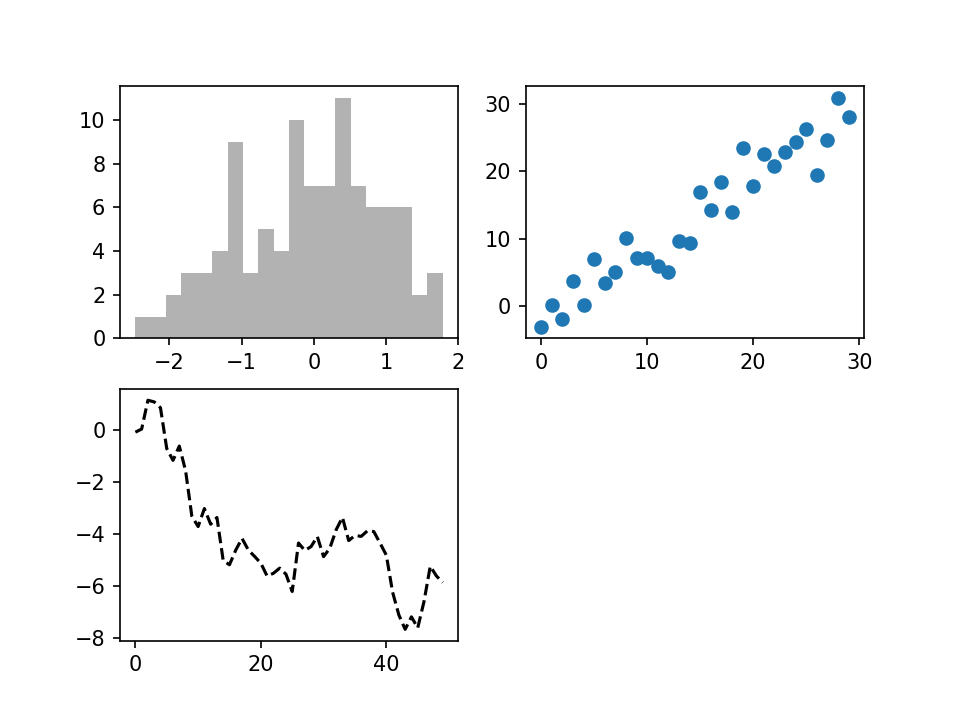

In [35]:
fig=plt.figure()
ax1=fig.add_subplot(2, 2, 1)
ax2=fig.add_subplot(2, 2, 2)
ax3=fig.add_subplot(2, 2, 3)

In [36]:
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
plt.plot(np.random.randn(50).cumsum(), 'k--')

方法二

<IPython.core.display.Javascript object>


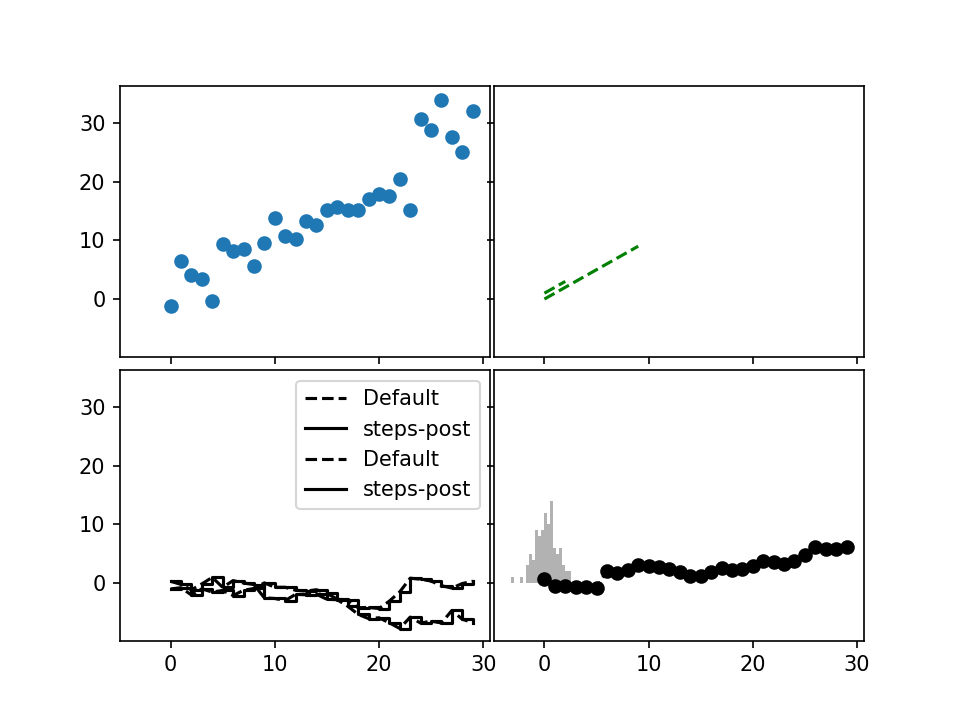

In [37]:
fig, axes=plt.subplots(2, 2, sharex=True, sharey=True)

In [38]:
axes[1, 1].hist(np.random.randn(100), bins=20, color='k', alpha=0.3);
axes[0, 0].scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30));

In [42]:
plt.subplots_adjust(wspace=0.01, hspace=0.05) #指定每个subplot之间的距离

In [44]:
axes[0,1].plot(np.arange(10), 'g--') #axes.plot(x, y, linestyle='--', color='g')

In [46]:
plt.plot(np.random.randn(30).cumsum(), 'ko--') #'koo--':color='k', linestyle='dashed', marker='o', color+marker type+line style

In [49]:
data = np.random.randn(30).cumsum()
axes[1,0].plot(data, 'k--', label='Default') #每加一条线就加上label='***'
axes[1,0].plot(data, 'k-', drawstyle='steps-post', label='steps-post')
axes[1,0].legend(loc='best') #最后再加上ax.legend(loc='best')加上图例

### Setting the title, axis labels, ticks, and ticklabels

<IPython.core.display.Javascript object>


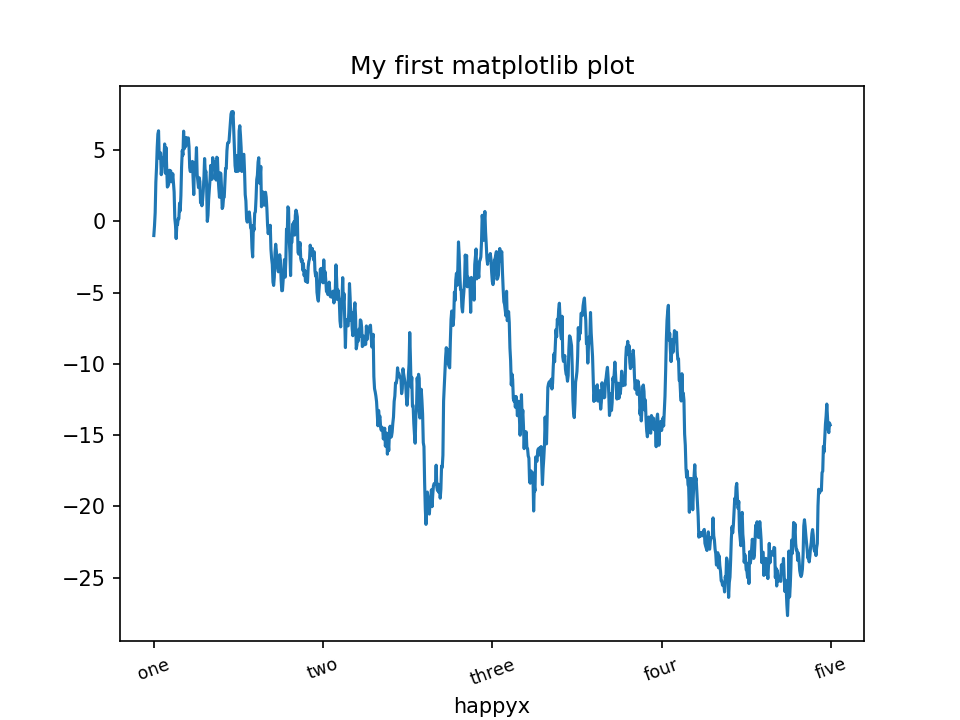

In [50]:
fig1, axes1=plt.subplots(1,1)
axes1.plot(np.random.randn(1000).cumsum())

In [55]:
axes1.set_xticks([0, 250, 500, 750, 1000]) #设置刻度
axes1.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=20, fontsize='small') #设置标签，旋转标签，标签大小
axes1.set_title('My first matplotlib plot')
axes1.set_xlabel('happyx')

Text(0.5, 17.31987606521343, 'happyx')

* props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'happyx'
}
* axes1.set(**props)

<IPython.core.display.Javascript object>


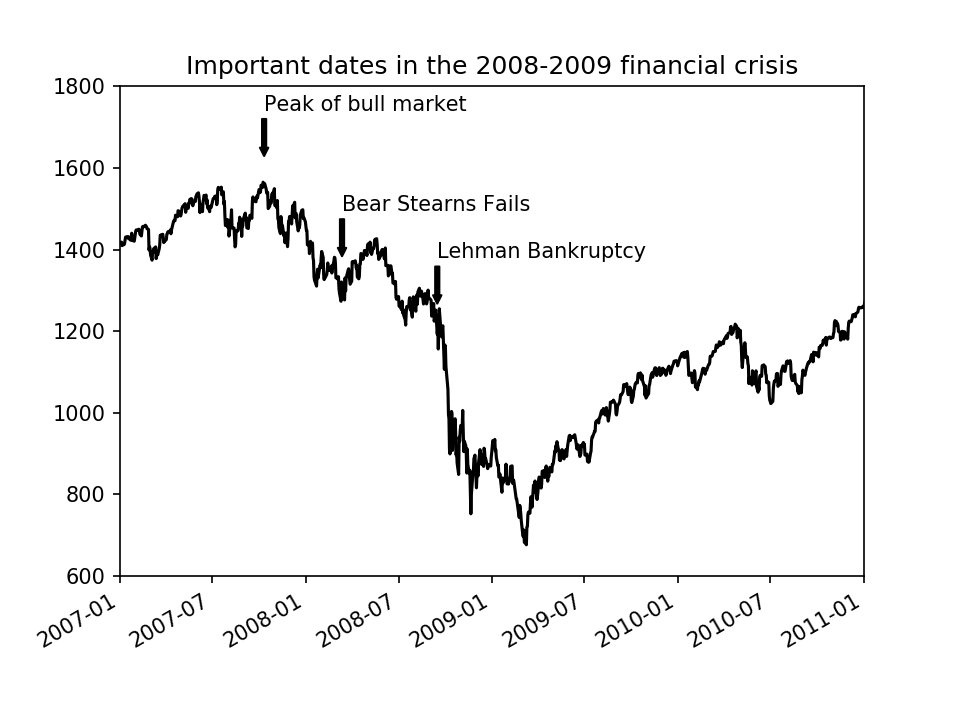

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

In [58]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
#ax.annotate method can draw labels at the indicated x and y coordinates. 
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

<IPython.core.display.Javascript object>


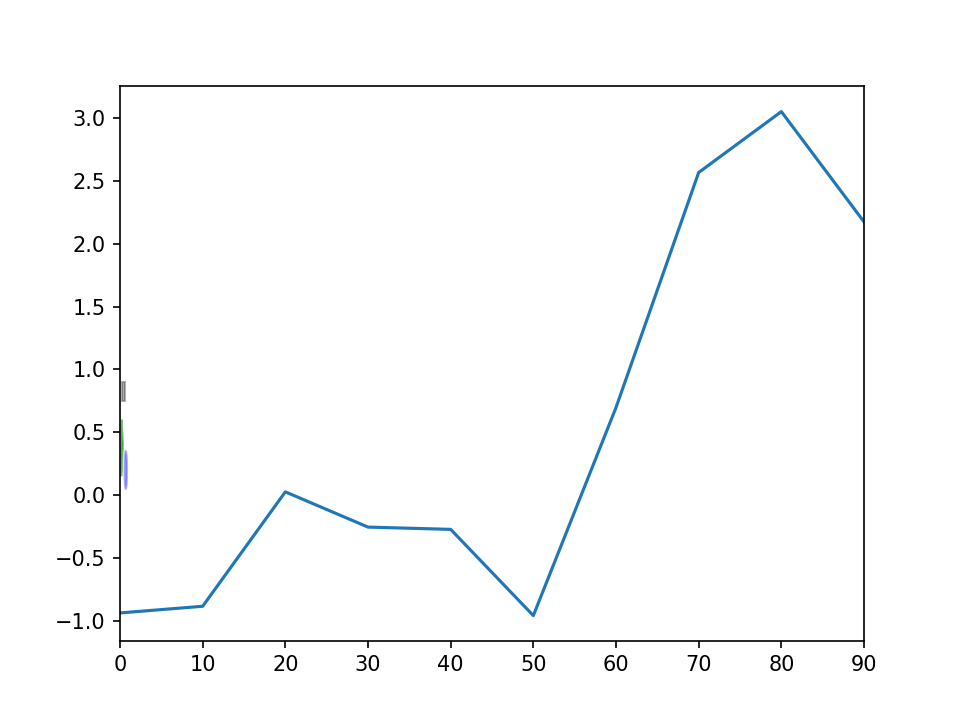

In [62]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

In [66]:
plt.savefig('1.pdf', dpi=400, bbox_inches='tight', facecolor='b')

### Plotting with pandas and seaborn

#### Line Plots

<IPython.core.display.Javascript object>


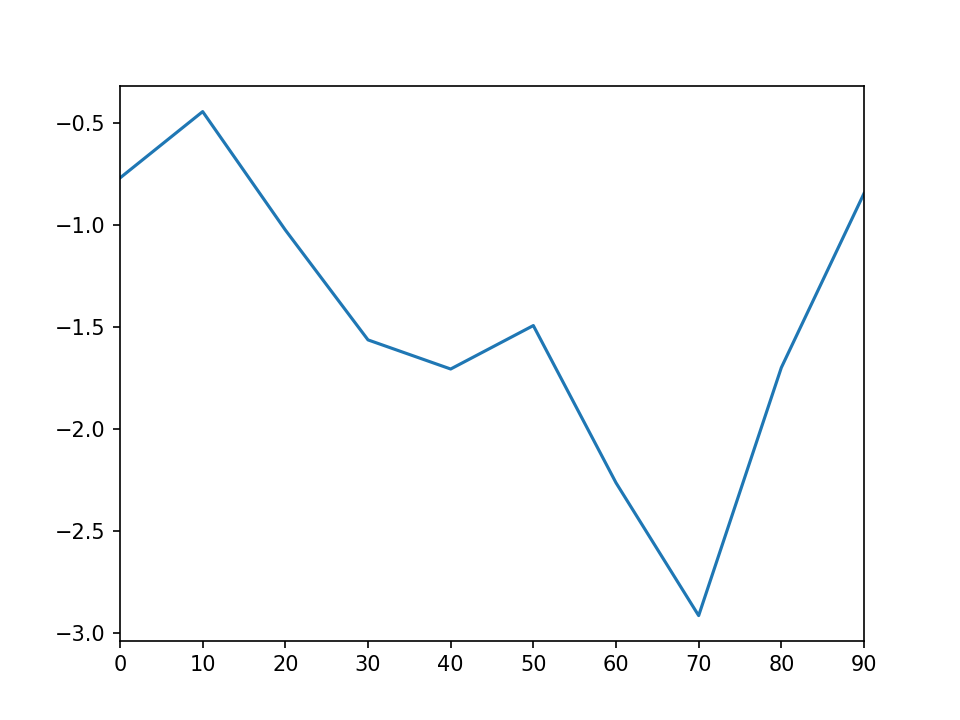

In [77]:
fig=plt.figure()
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

<IPython.core.display.Javascript object>


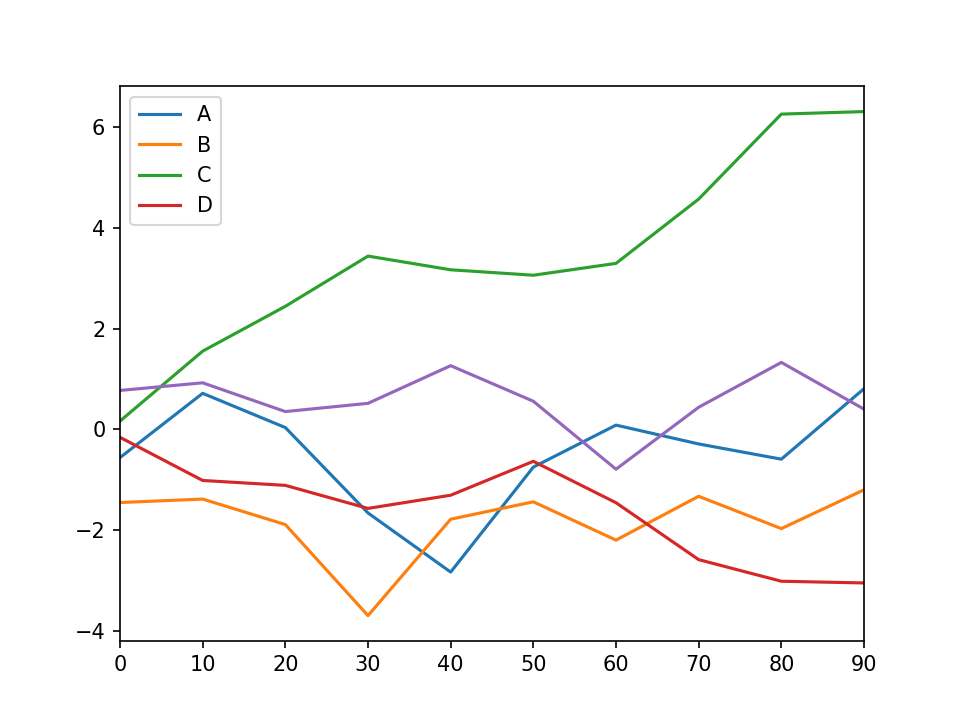

In [72]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

### Bar Plot

<IPython.core.display.Javascript object>


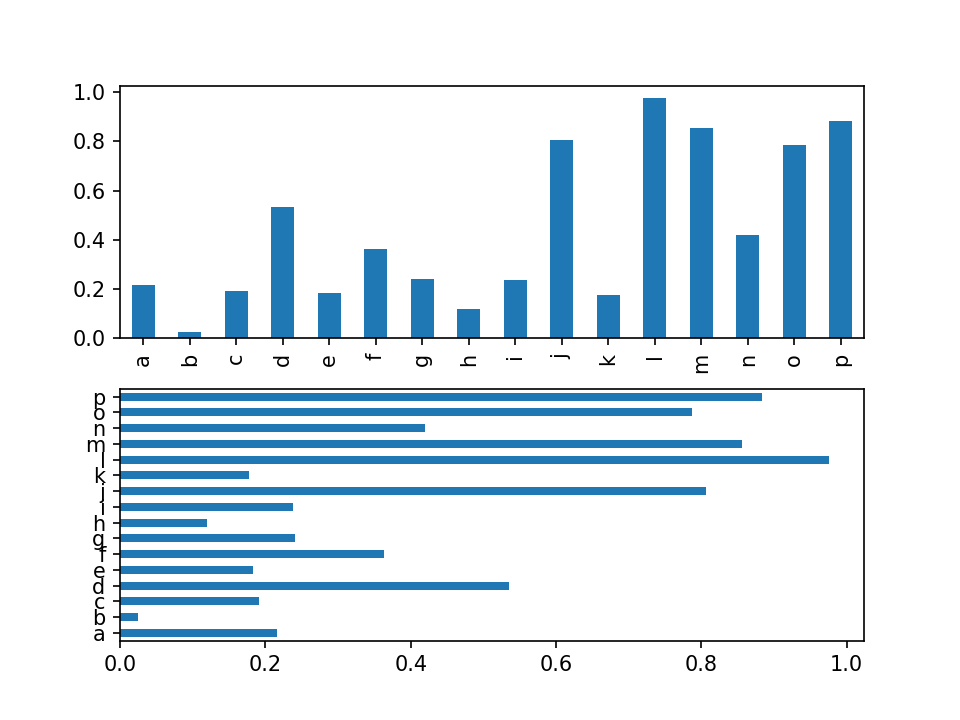

In [9]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop')) #Index显示在坐标上
data.plot.bar(ax=axes[0])
data.plot.barh(ax=axes[1]) #水平的条形图

<IPython.core.display.Javascript object>


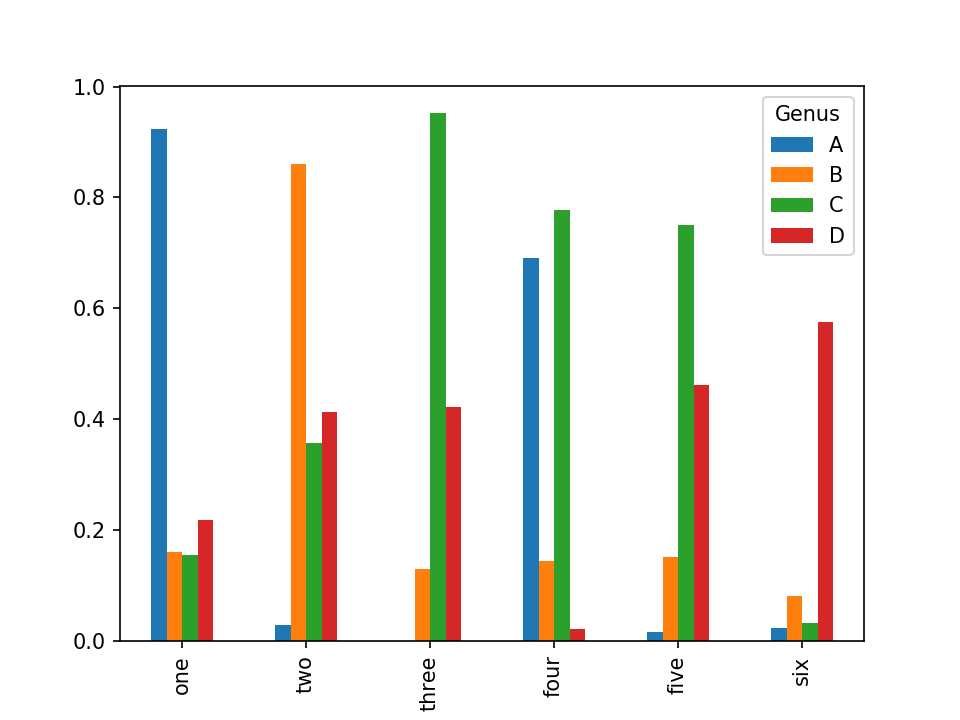

In [4]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus')) #name作为图例的标题
df.plot.bar()

<IPython.core.display.Javascript object>


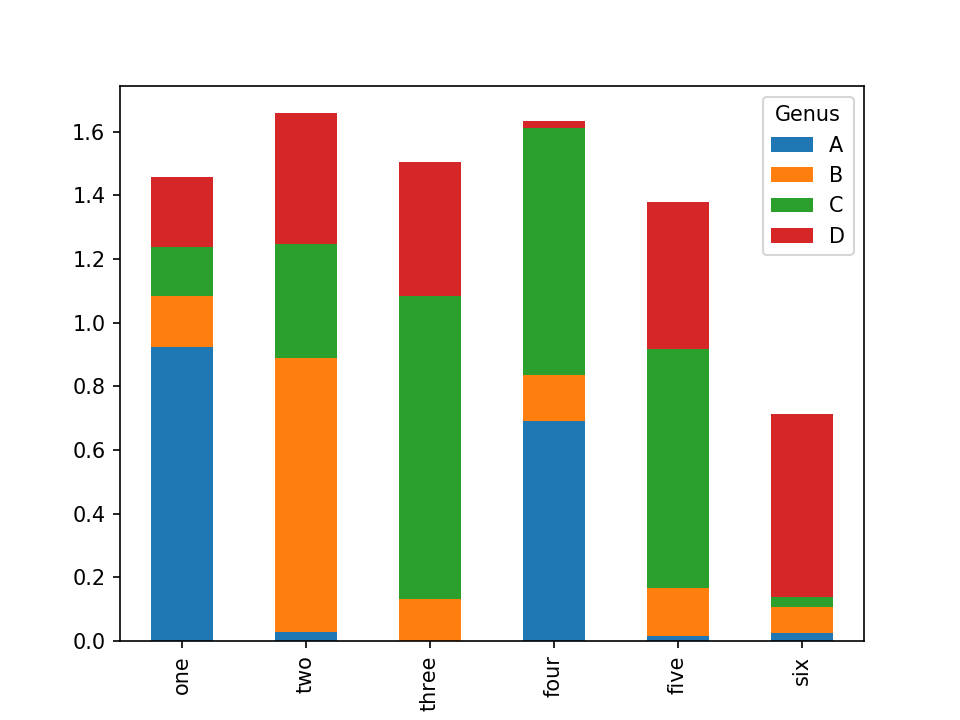

In [5]:
df.plot.bar(stacked=True)

In [20]:
tips = pd.read_csv('tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size']).loc[:, 2:5]
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<IPython.core.display.Javascript object>


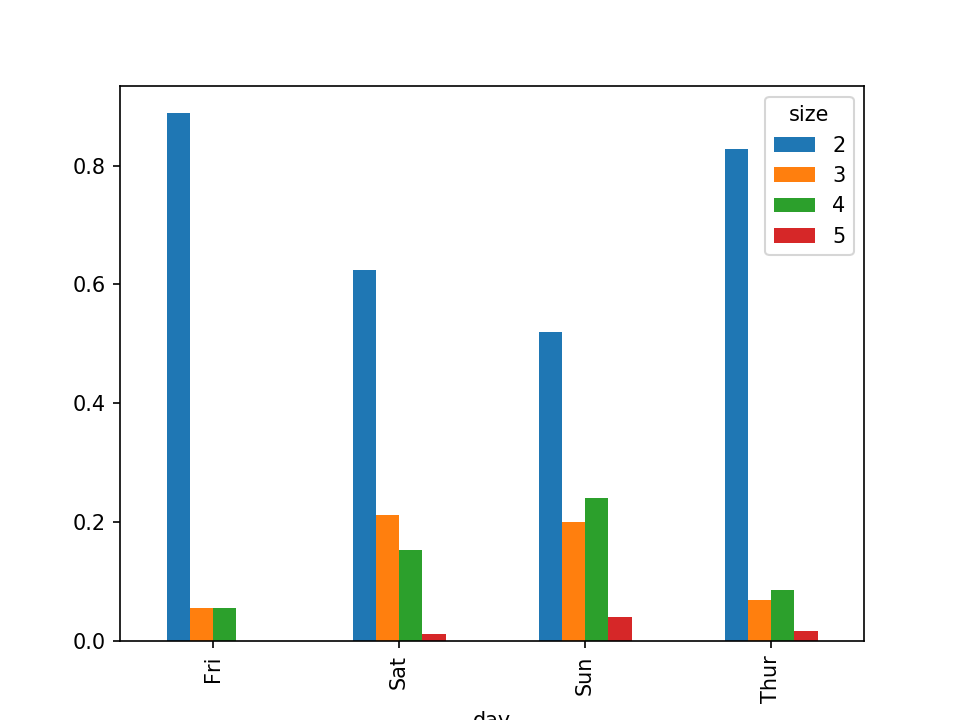

In [21]:
party_pcts.plot.bar()

In [23]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips[0:3]

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886


<IPython.core.display.Javascript object>


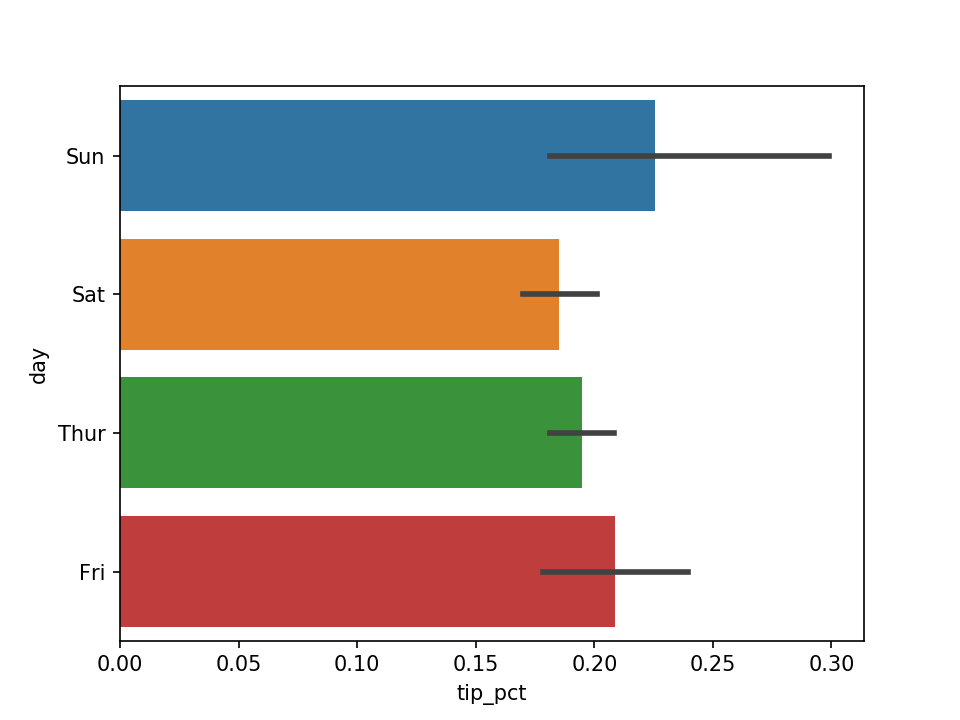

In [24]:
fig, axes=plt.subplots(1, 1)
sns.barplot(x='tip_pct', y='day', data=tips, orient='h') #一天有多个tip_pct，取均值，黑色线代表95%置信区间

<IPython.core.display.Javascript object>


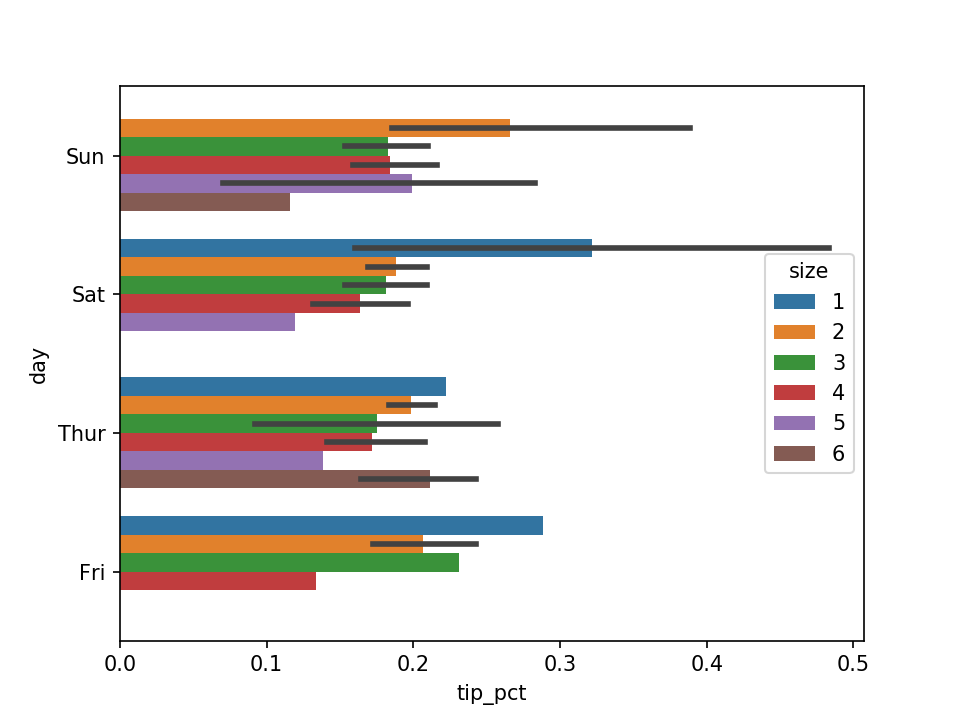

In [27]:
fig, axes=plt.subplots(1, 1)
sns.barplot(x='tip_pct', y='day', hue='size', data=tips, orient='h') #hew:split by another column

### Histograms and Density Plots

<IPython.core.display.Javascript object>


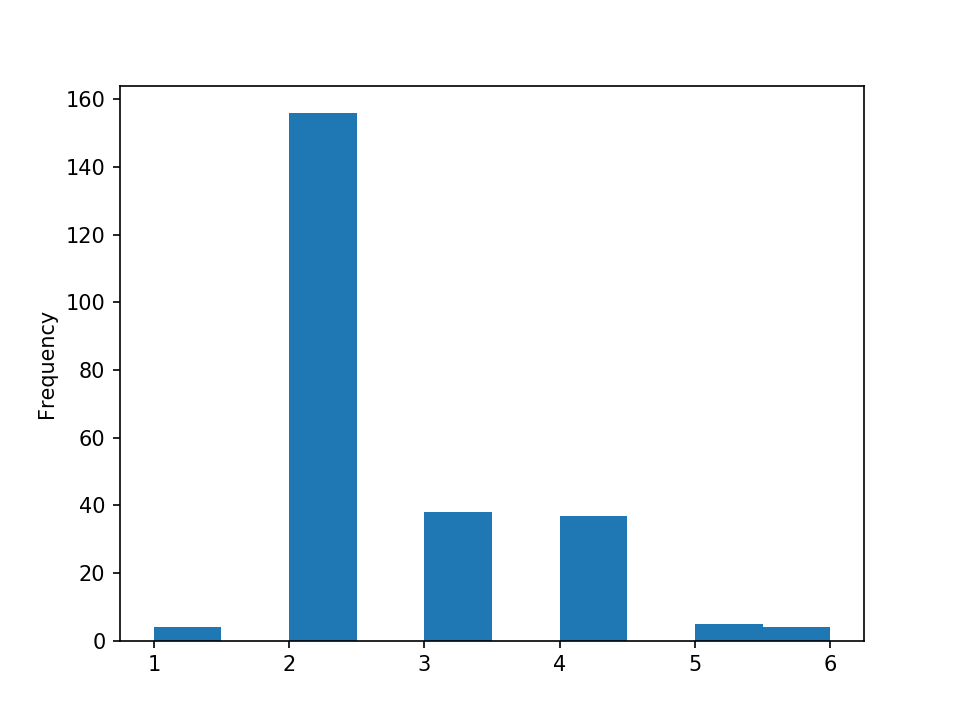

In [28]:
fig, axes=plt.subplots(1, 1)
tips['size'].plot.hist()

<IPython.core.display.Javascript object>


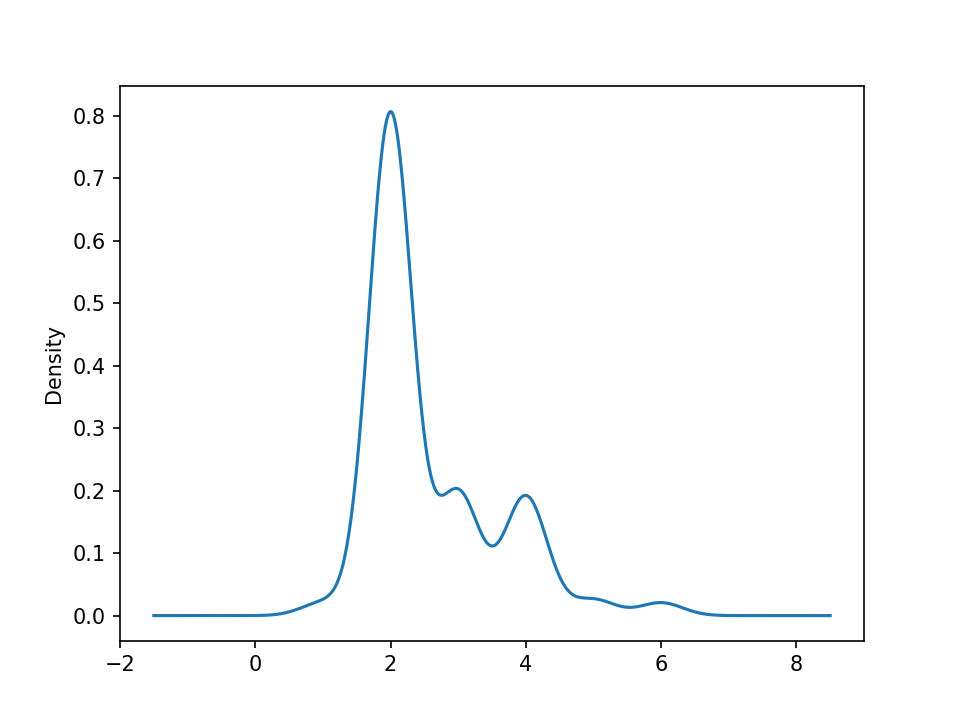

In [34]:
fig, axes=plt.subplots(1, 1)
tips['size'].plot.density()

<IPython.core.display.Javascript object>


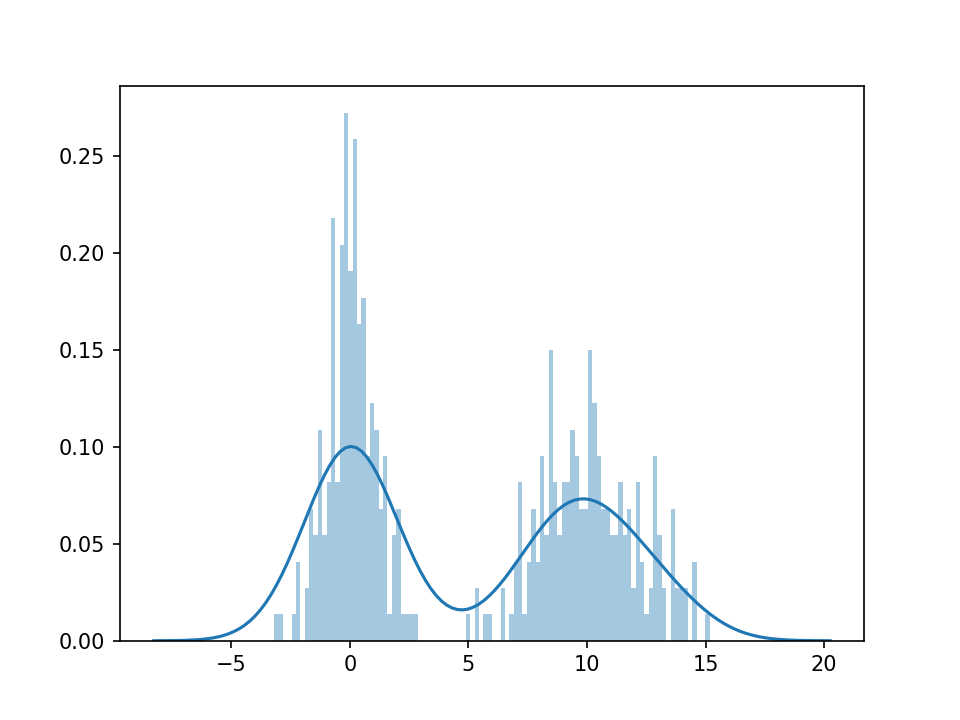

In [49]:
fig, axes=plt.subplots(1, 1)
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100) #plot both a histogram and a continuous density estimate simultaneously

### Scatter or Point Plots: examine the relationship between two one-dimensional data series

In [37]:
macro = pd.read_csv('macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[:3]

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060


<IPython.core.display.Javascript object>


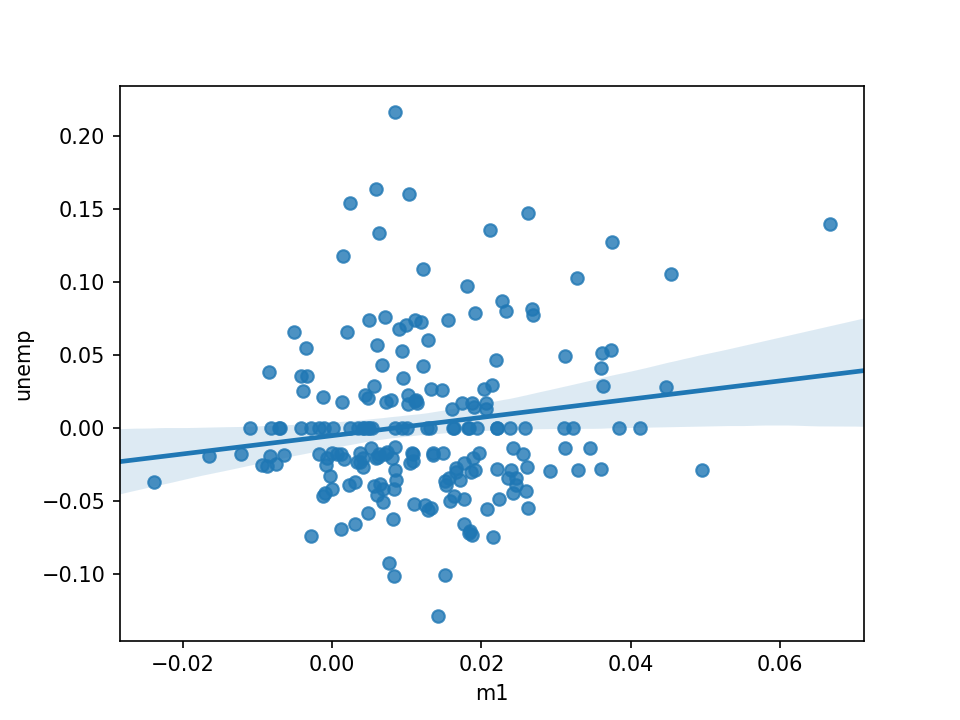

In [41]:
fig, axes=plt.subplots(1, 1)
sns.regplot('m1', 'unemp', data=trans_data)

<IPython.core.display.Javascript object>


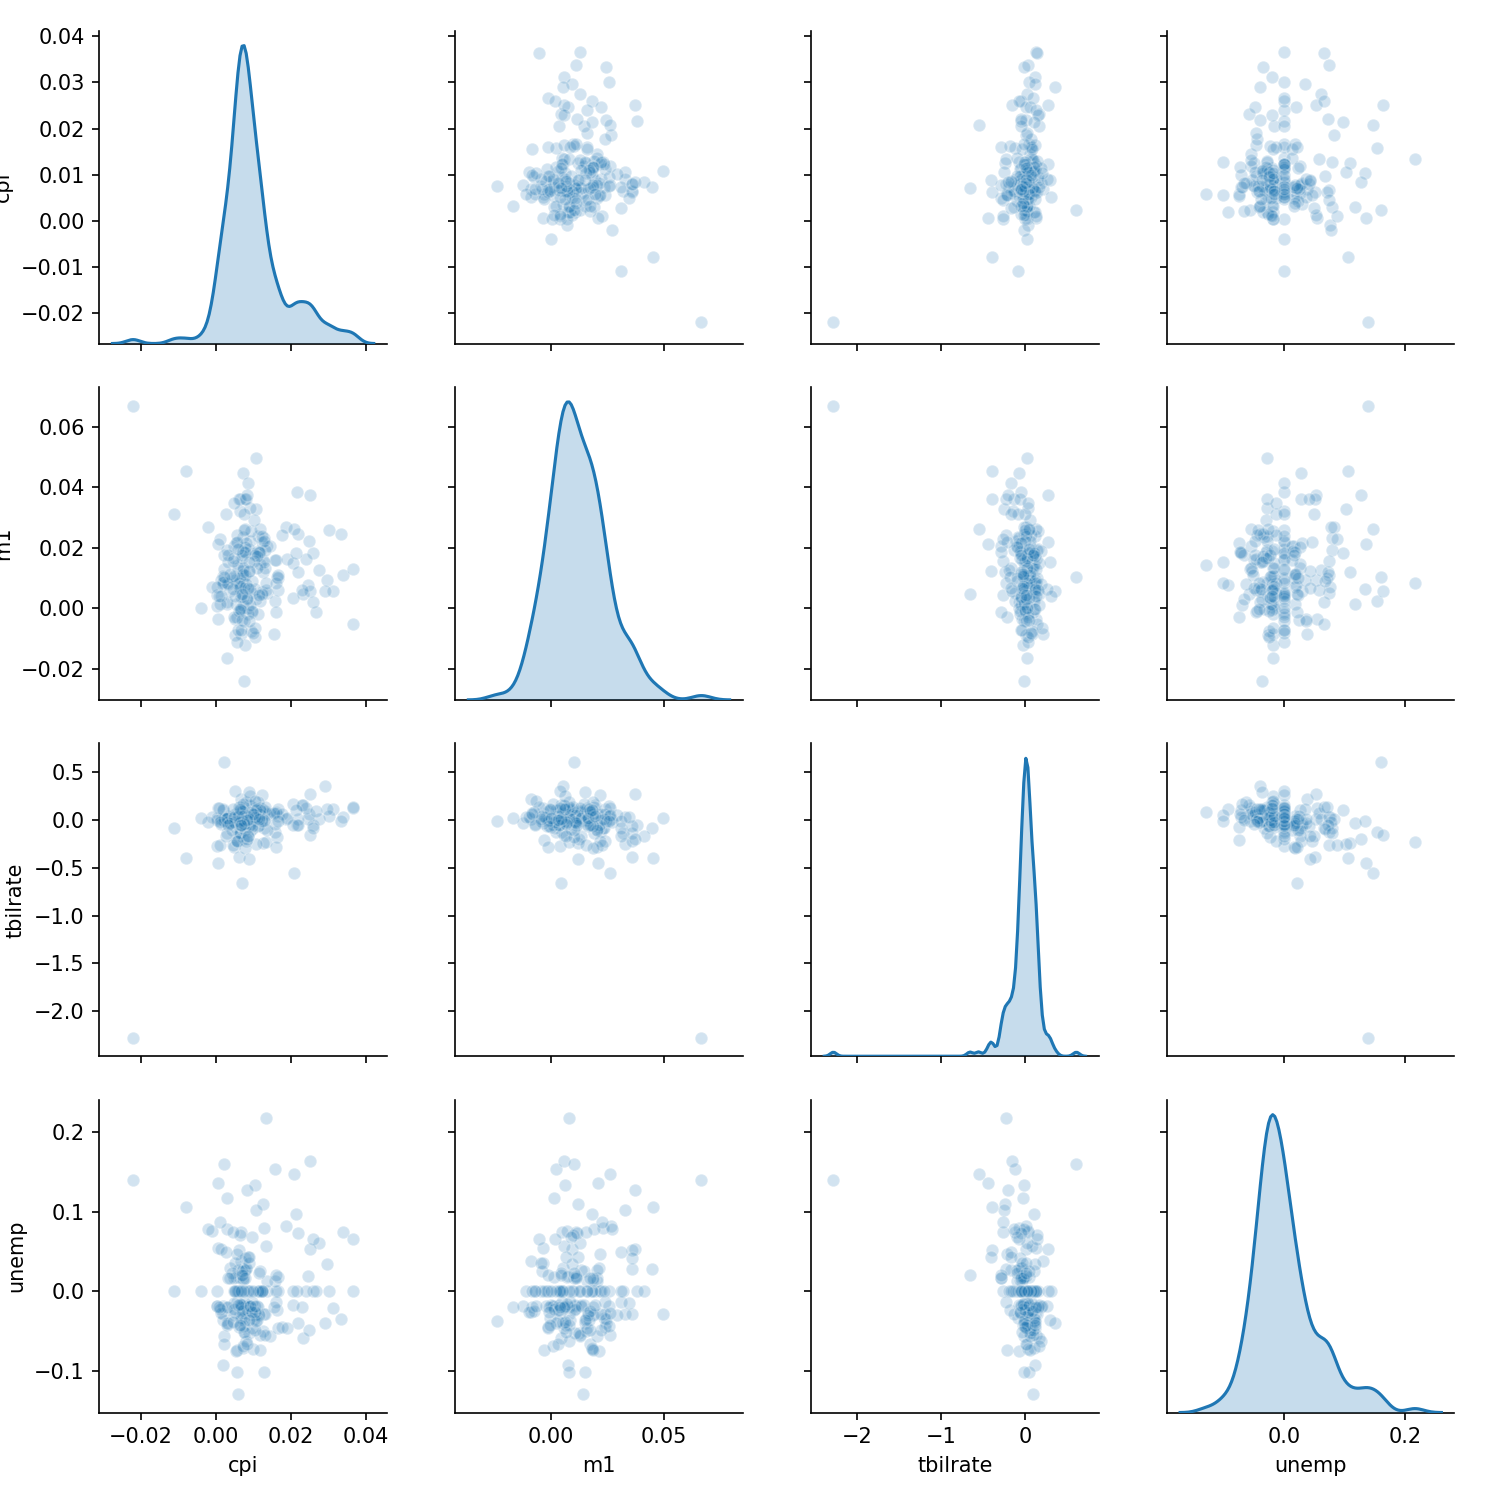

In [48]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})
#plot_kws argument: pass down configuration options to the individual plotting calls on the off-diagonal elements

### Facet Grids and Categorical Data

<IPython.core.display.Javascript object>


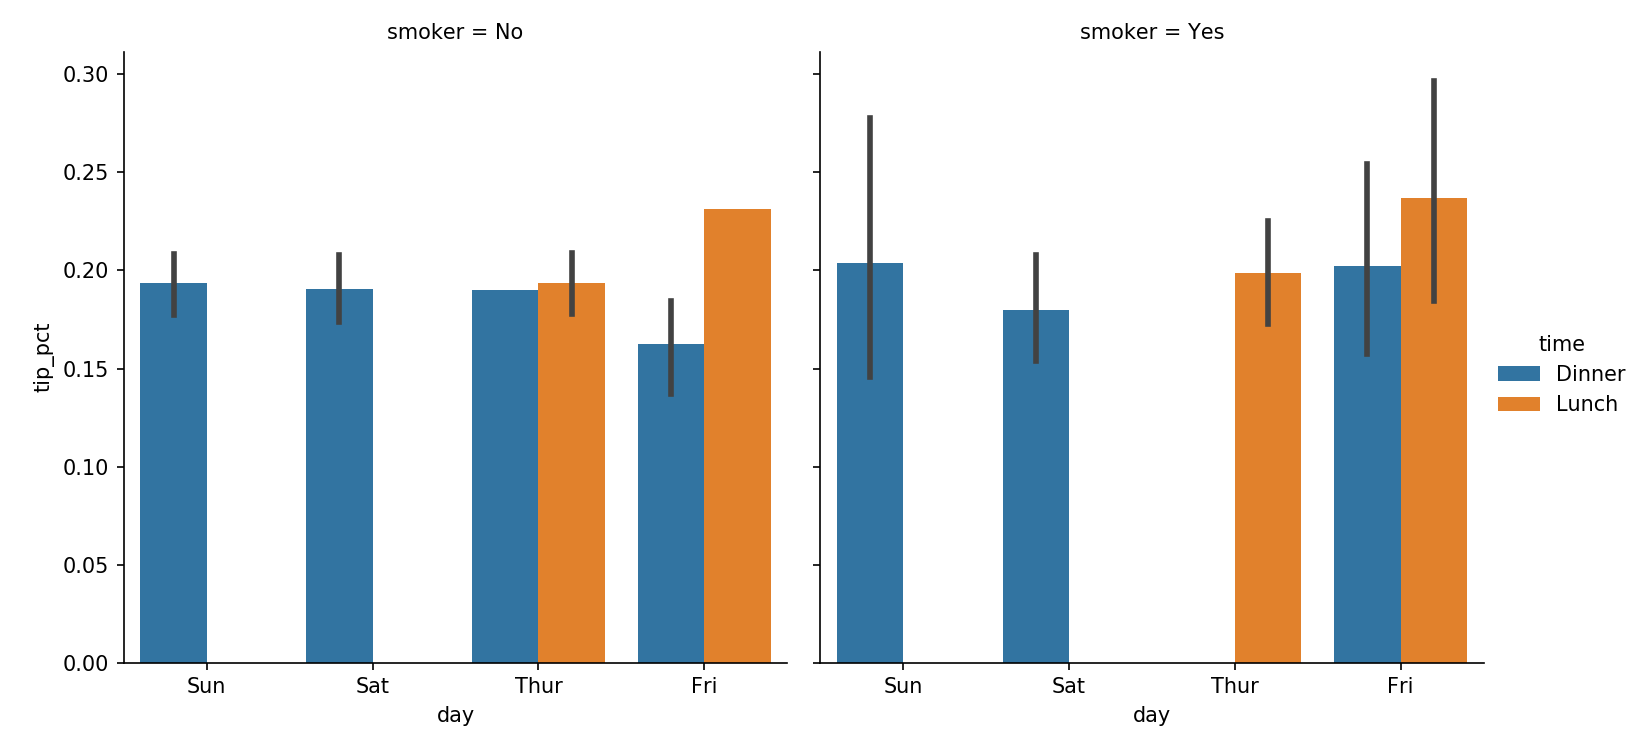

In [57]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1]) #col='smoker'，按照不同的smoker值分成列

<IPython.core.display.Javascript object>


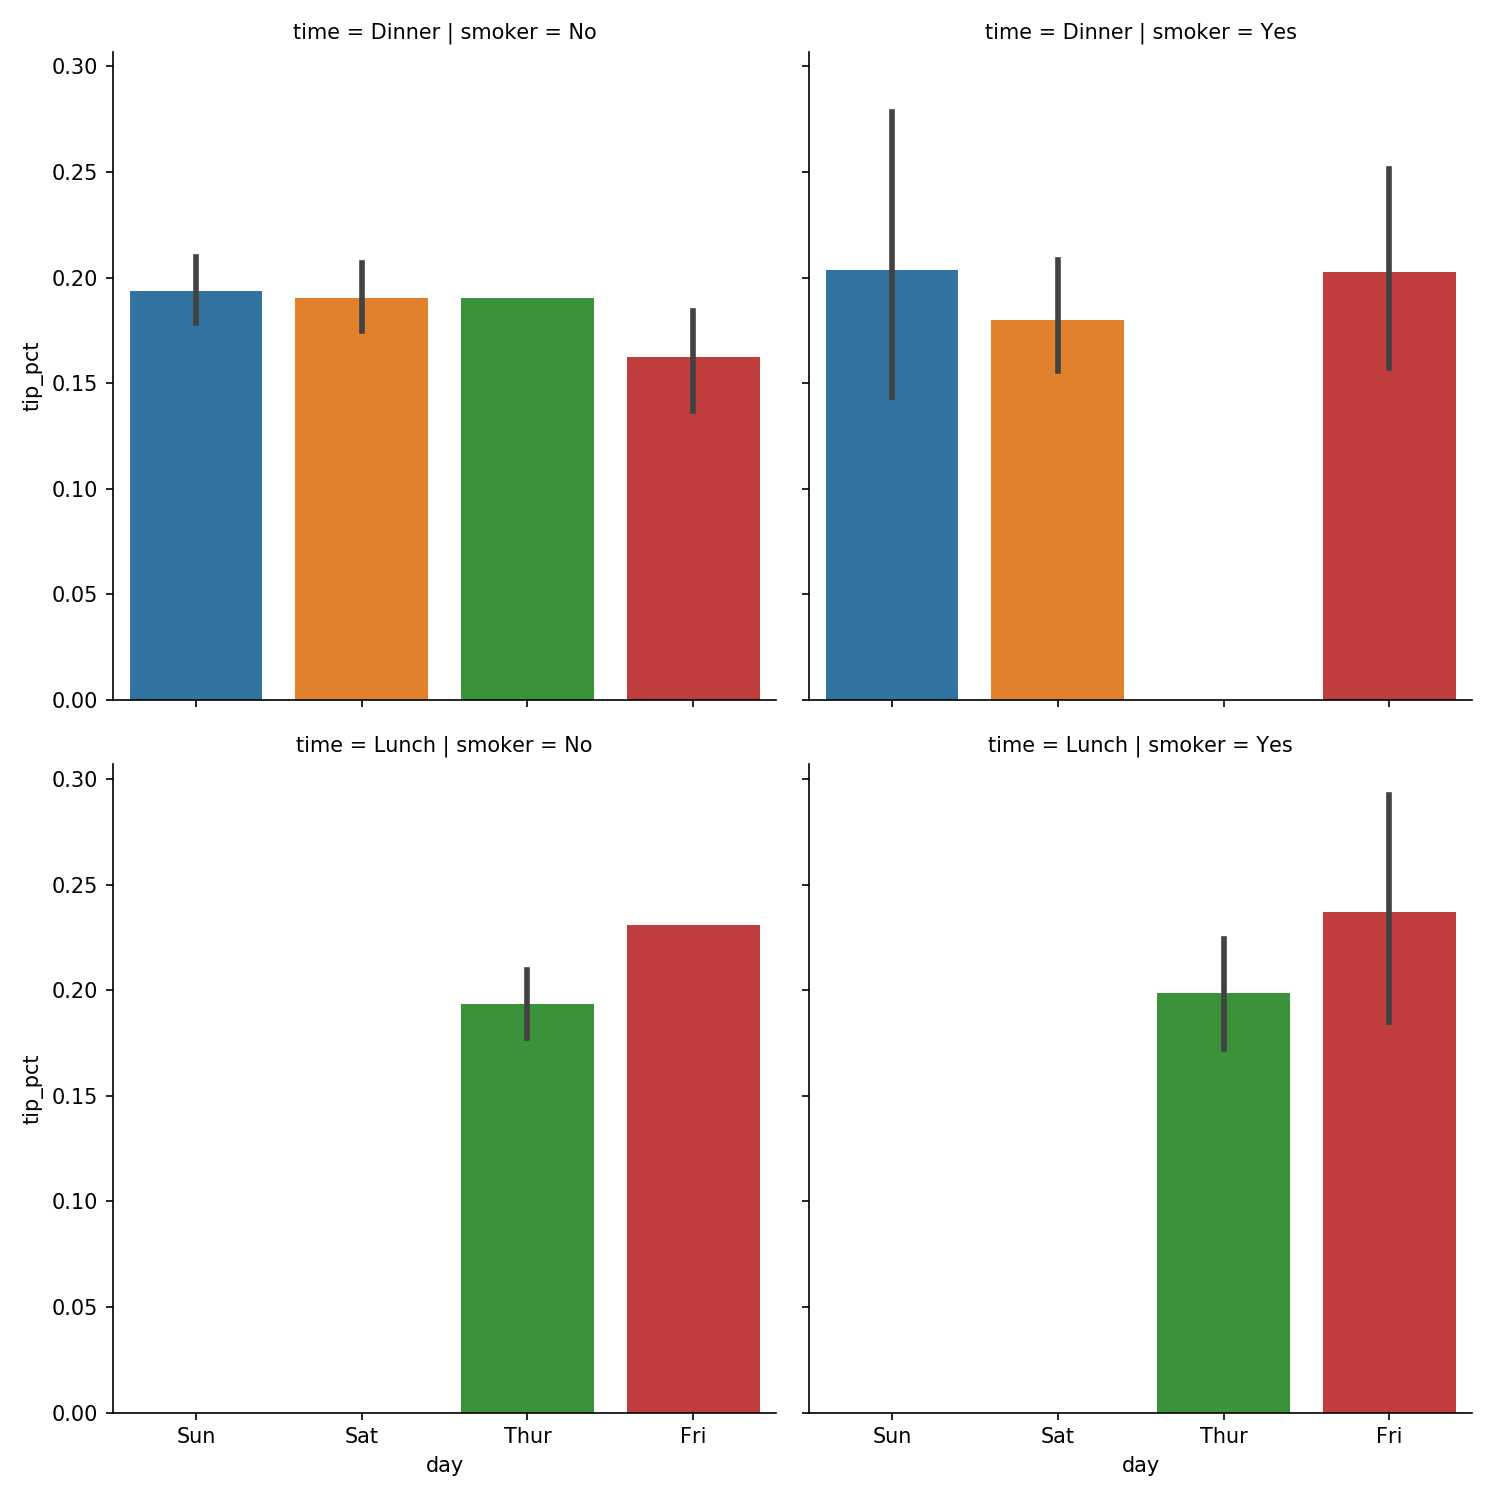

In [59]:
sns.catplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1]) #row='time'，按照不同的time值分成行

### Date and Time Data Types and Tools

In [2]:
from datetime import datetime
from datetime import timedelta
from dateutil.parser import parse
from pandas.tseries.offsets import Day, MonthEnd
import pytz

In [4]:
now=datetime.now()
print(now)
print(now.year, now.month, now.day)

2020-01-03 11:34:21.564756
2020 1 3


In [5]:
datetime(2020, 1, 7) - datetime(2019, 6, 24, 8, 15) #求两个时间之间的差值

datetime.timedelta(days=196, seconds=56700)

In [7]:
start = datetime(2020, 1, 7)
print(start + timedelta(12))
print(start + 2 * timedelta(12))

2020-01-19 00:00:00
2020-01-31 00:00:00


### Generate a DatetimeIndex 

In [62]:
pd.date_range('2012-04-01', '2012-04-03')

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03'], dtype='datetime64[ns]', freq='D')

In [63]:
pd.date_range(start='2012-04-01', periods=3) #如果只指定了开始或者结束日期，需要指定periods

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03'], dtype='datetime64[ns]', freq='D')

In [65]:
pd.date_range('2020-01-01', '2020-05-01', freq='BM') #每月最后一个工作日

DatetimeIndex(['2020-01-31', '2020-02-28', '2020-03-31', '2020-04-30'], dtype='datetime64[ns]', freq='BM')

In [45]:
pd.date_range('1/1/2000', periods=6, freq='W-WED')

DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09'],
              dtype='datetime64[ns]', freq='W-WED')

In [69]:
pd.date_range('2012-05-02 12:56:31', periods=3, normalize=True) #normalize=True，去掉具体的时间

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04'], dtype='datetime64[ns]', freq='D')

In [71]:
pd.date_range('2000-01-01', '2000-01-01 13:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [72]:
pd.date_range('2000-01-01', periods=3, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00'],
              dtype='datetime64[ns]', freq='90T')

In [78]:
list(pd.date_range('2020-01-01', '2020-03-31', freq='WOM-3FRI')) #每个月的第三个星期五, week of month WOM

[Timestamp('2020-01-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2020-02-21 00:00:00', freq='WOM-3FRI'),
 Timestamp('2020-03-20 00:00:00', freq='WOM-3FRI')]

##### datetime <------> string

In [27]:
stamp = datetime(2011, 1, 3)
print(str(stamp))
print(stamp.strftime('%Y-%m-%d-%S'))

2011-01-03 00:00:00
2011-01-03-00


In [24]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [25]:
parse('Jan 31, 1997 10:45 PM') #str转换成time, dayfirst=True可以表示str中日期在前

datetime.datetime(1997, 1, 31, 22, 45)

In [28]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

### Time Series Basics

In [3]:
dates = pd.DatetimeIndex(['1/2/2011', '1/2/2011', '2/7/2011', '1/8/2012'])
ts = pd.Series(np.random.randn(4), index=dates)
ts

2011-01-02    1.406583
2011-01-02   -2.590005
2011-02-07   -0.513987
2012-01-08    0.126910
dtype: float64

In [47]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-02', '2011-02-07', '2012-01-08'], dtype='datetime64[ns]', freq=None)

#### Selecting

In [48]:
print(ts[2])
print(ts['2/7/2011'])
print(ts['20110207'])

1.8317005333835858
1.8317005333835858
1.8317005333835858


In [49]:
ts['2011']

2011-01-02    1.333975
2011-01-02    0.615765
2011-02-07    1.831701
dtype: float64

In [50]:
ts['2011-01']

2011-01-02    1.333975
2011-01-02    0.615765
dtype: float64

In [51]:
ts[datetime(2011, 1, 7):]

2011-02-07    1.831701
2012-01-08   -0.876218
dtype: float64

In [52]:
ts['1/7/2011':]

2011-02-07    1.831701
2012-01-08   -0.876218
dtype: float64

In [53]:
ts.truncate(after='1/7/2011')

2011-01-02    1.333975
2011-01-02    0.615765
dtype: float64

In [59]:
ts.groupby(level=0).mean()

2011-01-02    0.974870
2011-02-07    1.831701
2012-01-08   -0.876218
dtype: float64

In [60]:
ts.resample('D')

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

### Shift data
* 仅挪动数据：ts.shift(2)
* 挪动index：ts.shift(2, freq='M')

In [3]:
ts2 = pd.Series(np.random.randn(4), index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts2

2000-01-31    0.687189
2000-02-29    0.715674
2000-03-31    0.018793
2000-04-30   -0.307797
Freq: M, dtype: float64

In [5]:
ts2.shift(2) #向后挪两个，shift(-2)向前挪两个

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.687189
2000-04-30    0.715674
Freq: M, dtype: float64

In [6]:
ts2 / ts2.shift(1) - 1 #计算百分比变化

2000-01-31          NaN
2000-02-29     0.041451
2000-03-31    -0.973741
2000-04-30   -17.378610
Freq: M, dtype: float64

In [8]:
ts2.shift(2, freq='M') #向后挪动两个月

2000-03-31    0.687189
2000-04-30    0.715674
2000-05-31    0.018793
2000-06-30   -0.307797
Freq: M, dtype: float64

In [10]:
now = datetime(2011, 11, 17)
print(now + 3*Day())
print(now + MonthEnd())
offset = MonthEnd()
print(offset.rollforward(now))
print(offset.rollback(now))

2011-11-20 00:00:00
2011-11-30 00:00:00
2011-11-30 00:00:00
2011-10-31 00:00:00


In [11]:
ts3 = pd.Series(np.random.randn(20), index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts3.groupby(offset.rollforward).mean()
#ts3.resample('M').mean()

2000-01-31   -0.222655
2000-02-29    0.393697
2000-03-31   -0.151753
dtype: float64

#### Time Zone

In [14]:
pytz.timezone('America/New_York')

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

#### Time Zone Localization and Conversion
* If two time series with different time zones are combined, the result will be UTC. Since the timestamps are stored under the hood in UTC, this is a straightforward operation and requires no conversion to happen.

In [21]:
pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [15]:
pd.date_range('3/9/2012 9:30', periods=3, freq='D', tz='UTC') #生成的时候指定时区 tz='***'

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [17]:
ts

2011-01-02   -0.568078
2011-01-02    2.407092
2011-02-07   -0.890594
2012-01-08   -1.320137
dtype: float64

In [18]:
tszone=ts.tz_localize('UTC') #对普通data加上时区
tszone

2011-01-02 00:00:00+00:00   -0.568078
2011-01-02 00:00:00+00:00    2.407092
2011-02-07 00:00:00+00:00   -0.890594
2012-01-08 00:00:00+00:00   -1.320137
dtype: float64

In [19]:
tszone.tz_convert('America/New_York') #改变时区

2011-01-01 19:00:00-05:00   -0.568078
2011-01-01 19:00:00-05:00    2.407092
2011-02-06 19:00:00-05:00   -0.890594
2012-01-07 19:00:00-05:00   -1.320137
dtype: float64

In [20]:
ts.index.tz_localize('Asia/Shanghai') #直接对Index进行操作

DatetimeIndex(['2011-01-02 00:00:00+08:00', '2011-01-02 00:00:00+08:00',
               '2011-02-07 00:00:00+08:00', '2012-01-08 00:00:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

### Periods and Period

In [22]:
p = pd.Period(2007, freq='A-DEC') #the full timespan from January 1, 2007, to December 31, 2007, inclusive
p

Period('2007', 'A-DEC')

In [23]:
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

In [24]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng #指定开始、结束、频率，生成PeriodIndex

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [25]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -1.815278
2000-02    1.985140
2000-03    0.241032
2000-04    0.443853
2000-05   -0.218368
2000-06   -1.603138
Freq: M, dtype: float64

In [29]:
values = ['2001Q3', '2002Q2', '2003Q1']
pd.PeriodIndex(values, freq='Q-DEC') #使用list生成PeriodIndex

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

In [33]:
p = pd.Period('2007', freq='A-JUN')
print(p)
p.asfreq('M', how='start')

2007


Period('2006-07', 'M')

In [34]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

#### Quarterly Period Frequencies
* freq='Q-JAN': 2012Q4 runs from 2011 November through 2012 January
* freq='Q-FEB': 2012Q4 runs from 2011 December through 2012 Feb
* freq='Q-SEP': 2012Q4 runs from 2012 July through 2012 Sep

In [35]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [37]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60 #the timestamp at 4 PM on the second-to-last business day of the quarter
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [38]:
pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')

PeriodIndex(['2011Q3', '2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4'], dtype='period[Q-JAN]', freq='Q-JAN')

#### Converting Timestamps to Periods (and Back)

In [41]:
rng = pd.date_range('2000-01-01', periods=3, freq='D')
ts4 = pd.Series(np.random.randn(3), index=rng)
ts4

2000-01-01    0.788470
2000-01-02    1.206637
2000-01-03    0.442818
Freq: D, dtype: float64

In [44]:
pts=ts4.to_period('M') #Since periods refer to non-overlapping timespans, a timestamp can only belong to a single period for a given frequency. 
#如果不指定'M'就会使用默认的频率
pts

2000-01    0.788470
2000-01    1.206637
2000-01    0.442818
Freq: M, dtype: float64

In [48]:
pts.to_timestamp(how='end')

2000-01-31 23:59:59.999999999    0.788470
2000-01-31 23:59:59.999999999    1.206637
2000-01-31 23:59:59.999999999    0.442818
dtype: float64

#### Creating a PeriodIndex from Arrays

In [55]:
data = pd.read_csv('macrodata.csv')
data[0:3]

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09


In [53]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index[0:5]

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

In [54]:
data.index = index
data[:3]

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09


### Resampling and Frequency Conversion
* resample method: call resample to group the data, then call an aggregation function

In [60]:
ts.resample('Y', kind='period').mean()

2011   -0.634489
2012   -0.535109
Freq: A-DEC, dtype: float64

In [48]:
times = pd.date_range('2017-05-20 00:00', freq='1min', periods=15)
df2 = pd.DataFrame({'time': times.repeat(3), 'key': np.tile(['a', 'b', 'c'], 15), 'value': np.arange(15 * 3.)})
df2[:7]

,time,key,value
0,2017-05-20 00:00:00,a,0.0
1,2017-05-20 00:00:00,b,1.0
2,2017-05-20 00:00:00,c,2.0
3,2017-05-20 00:01:00,a,3.0
4,2017-05-20 00:01:00,b,4.0
5,2017-05-20 00:01:00,c,5.0
6,2017-05-20 00:02:00,a,6.0


In [49]:
time_key = pd.Grouper(freq='5min')
resampled = (df2.set_index('time').groupby(['key', time_key]).sum())
resampled

value
key time                      
a   2017-05-20 00:00:00   30.0
    2017-05-20 00:05:00  105.0
    2017-05-20 00:10:00  180.0
b   2017-05-20 00:00:00   35.0
    2017-05-20 00:05:00  110.0
    2017-05-20 00:10:00  185.0
c   2017-05-20 00:00:00   40.0
    2017-05-20 00:05:00  115.0
    2017-05-20 00:10:00  190.0

### Downsampling
* The desired frequency defines bin edges that are used to slice the time series into pieces to aggregate. For example, to convert to monthly, 'M' or 'BM', you need to chop up the data into one-month intervals. 
* Each interval is said to be half-open; a data point can only belong to one interval, and the union of the intervals must make up the whole time frame.

In [4]:
rng = pd.date_range('2000-01-01', periods=5, freq='T')
min_ts = pd.Series(np.arange(5), index=rng)
min_ts

2000-01-01 00:00:00    0
2000-01-01 00:01:00    1
2000-01-01 00:02:00    2
2000-01-01 00:03:00    3
2000-01-01 00:04:00    4
Freq: T, dtype: int32

In [5]:
min_ts.resample('2min', closed='right').sum() #加上label='right'指定按interval的右边label

1999-12-31 23:58:00    0
2000-01-01 00:00:00    3
2000-01-01 00:02:00    7
Freq: 2T, dtype: int32

In [6]:
min_ts.resample('2min', closed='right', label='right', loffset='-1s').sum()

1999-12-31 23:59:59    0
2000-01-01 00:01:59    3
2000-01-01 00:03:59    7
Freq: 2T, dtype: int32

In [7]:
min_ts.resample('2min').ohlc() #compute four values for each bucket: the first (open), last (close), maximum (high), and minimal (low) values

,open,high,low,close
2000-01-01 00:00:00,0,1,0,1
2000-01-01 00:02:00,2,3,2,3
2000-01-01 00:04:00,4,4,4,4


### Upsampling and Interpolation

In [8]:
frame = pd.DataFrame(np.random.randn(2, 4), index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,1.164269,0.660393,-1.917503,0.326512
2000-01-12,1.784126,0.540011,-2.104091,0.908485


In [9]:
frame.resample('D').asfreq() #low to high

,Colorado,Texas,New York,Ohio
2000-01-05,1.164269,0.660393,-1.917503,0.326512
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.784126,0.540011,-2.104091,0.908485


In [11]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,1.164269,0.660393,-1.917503,0.326512
2000-01-06,1.164269,0.660393,-1.917503,0.326512
2000-01-07,1.164269,0.660393,-1.917503,0.326512
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.784126,0.540011,-2.104091,0.908485


In [12]:
frame.resample('W-FRI').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-07,1.164269,0.660393,-1.917503,0.326512
2000-01-14,1.784126,0.540011,-2.104091,0.908485


### Resampling with Periods: Periods refer to timespans
* In downsampling, the target frequency must be a subperiod of the source frequency.
* In upsampling, the target frequency must be a superperiod of the source frequency.
##### For example, the timespans defined by Q-MAR only line up with A-MAR, A-JUN, A-SEP, and A-DEC.

In [13]:
frame = pd.DataFrame(np.random.randn(24, 4), index=pd.period_range('1-2000', '12-2001', freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:3]

,Colorado,Texas,New York,Ohio
2000-01,1.795746,-0.917998,-0.036457,0.257674
2000-02,-0.675655,-0.428496,-1.169799,1.483333
2000-03,1.288017,-1.356949,-1.505770,-0.838905


In [16]:
annual_frame=frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.240214,0.155577,-0.496523,-0.363392
2001,-0.589145,0.387949,0.431978,-0.058826


In [20]:
annual_frame.resample('Q-DEC').ffill() #Q-DEC: Quarterly, year ending in December

,Colorado,Texas,New York,Ohio
2000Q1,0.240214,0.155577,-0.496523,-0.363392
2000Q2,0.240214,0.155577,-0.496523,-0.363392
2000Q3,0.240214,0.155577,-0.496523,-0.363392
2000Q4,0.240214,0.155577,-0.496523,-0.363392
2001Q1,-0.589145,0.387949,0.431978,-0.058826
2001Q2,-0.589145,0.387949,0.431978,-0.058826
2001Q3,-0.589145,0.387949,0.431978,-0.058826
2001Q4,-0.589145,0.387949,0.431978,-0.058826


In [23]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.240214,0.155577,-0.496523,-0.363392
2001Q1,0.240214,0.155577,-0.496523,-0.363392
2001Q2,0.240214,0.155577,-0.496523,-0.363392
2001Q3,0.240214,0.155577,-0.496523,-0.363392
2001Q4,-0.589145,0.387949,0.431978,-0.058826
2002Q1,-0.589145,0.387949,0.431978,-0.058826
2002Q2,-0.589145,0.387949,0.431978,-0.058826
2002Q3,-0.589145,0.387949,0.431978,-0.058826


### Moving Window Functions

In [25]:
close_px_all = pd.read_csv('stock_px_2.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
close_px.head()

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


In [30]:
close_px.rolling(250).mean().dropna().head()

,AAPL,MSFT,XOM
2003-12-17,9.22340,20.54224,30.06408
2003-12-18,9.23388,20.54468,30.08068
2003-12-19,9.24348,20.54688,30.09784
2003-12-22,9.25340,20.54700,30.11168
2003-12-23,9.26328,20.54536,30.13052


In [44]:
close_px.rolling('20D').mean().head()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000


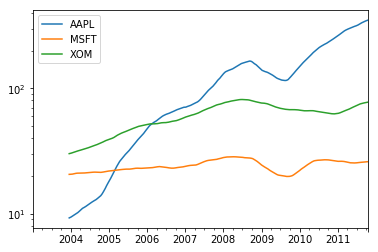

In [42]:
close_px.rolling(250).mean().plot(logy=True) #250-day moving window average of stock price

In [36]:
appl_mean250=close_px.AAPL.rolling(250, min_periods=10).mean()
appl_mean250[:10]

2003-01-02      NaN
2003-01-03      NaN
2003-01-06      NaN
2003-01-07      NaN
2003-01-08      NaN
2003-01-09      NaN
2003-01-10      NaN
2003-01-13      NaN
2003-01-14      NaN
2003-01-15    7.355
Freq: B, Name: AAPL, dtype: float64

In [38]:
close_px.AAPL.expanding().mean().head() 
#start the time window from the beginning of the time series and increases the size of the window until it encompasses the whole series

2003-01-02    7.400000
2003-01-03    7.425000
2003-01-06    7.433333
2003-01-07    7.432500
2003-01-08    7.402000
Freq: B, Name: AAPL, dtype: float64

#### Exponentially Weighted Functions: places more weight on more recent observations, it “adapts” faster to changes compared with the equal-weighted version.

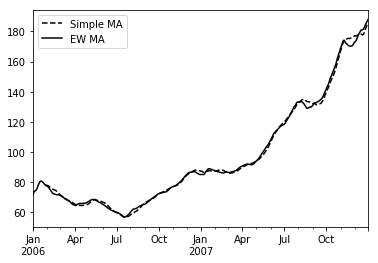

In [51]:
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend() #Simple moving average versus exponentially weighted

#### Binary Moving Window Functions

In [53]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

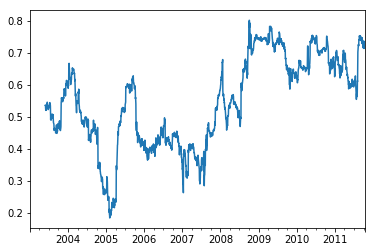

In [56]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

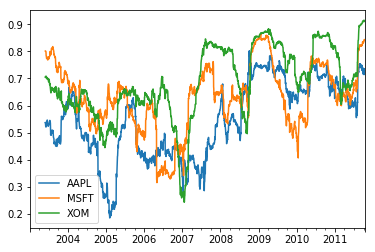

In [57]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot() #the correlation of the Series (spx_rets) with each column in the DataFrame

#### User-Defined Moving Window Functions

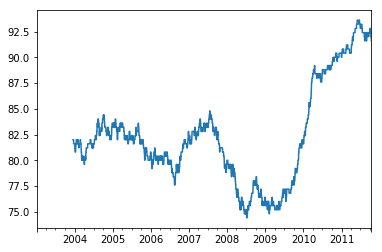

In [59]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent, raw=True)
result.plot() #Percentile rank of 2% AAPL return over one-year window

### Categorical Data
##### GroupBy operations can be significantly faster with categoricals

In [3]:
values = pd.Series([0, 1, 0, 0] * 2)
dim = pd.Series(['apple', 'orange'])
#This representation as integers is called the categorical representation. 
#The array of distinct values can be called the categories. 
#The integer values that reference the categories are called the category codes or simply codes.

In [4]:
fruit = ['apple', 'orange', 'apple', 'apple'] * 2
df = pd.DataFrame({'id': np.arange(8), 'fruit': fruit, 'count': np.random.randint(3, 9, size=8), 'weight': np.random.uniform(0, 4, size=8)})
df

,id,fruit,count,weight
0,0,apple,4,1.113347
1,1,orange,6,2.587211
2,2,apple,7,0.569926
3,3,apple,3,3.247653
4,4,apple,3,1.844008
5,5,orange,8,0.967161
6,6,apple,5,0.415730
7,7,apple,6,2.235672


In [5]:
fruit_cat = df['fruit'].astype('category')
fruit_cat #the values for fruit_cat are an instance of pandas.Categorical

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): [apple, orange]

In [22]:
fruit_cat.cat.categories

Index(['apple', 'orange'], dtype='object')

In [7]:
print(fruit_cat.values.categories)
print(fruit_cat.values.codes)

Index(['apple', 'orange'], dtype='object')
[0 1 0 0 0 1 0 0]


In [9]:
df['fruit'] = df['fruit'].astype('category')
df.fruit

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): [apple, orange]

In [10]:
pd.Categorical(['foo', 'bar', 'baz', 'foo', 'bar'])

[foo, bar, baz, foo, bar]
Categories (3, object): [bar, baz, foo]

In [11]:
categories = ['foo', 'bar', 'baz']
codes = [0, 1, 2, 0, 0, 1]
my_cats_2 = pd.Categorical.from_codes(codes, categories)
my_cats_2

[foo, bar, baz, foo, foo, bar]
Categories (3, object): [foo, bar, baz]

In [12]:
my_cats_ordered=pd.Categorical.from_codes(codes, categories, ordered=True)
my_cats_ordered

[foo, bar, baz, foo, foo, bar]
Categories (3, object): [foo < bar < baz]

In [13]:
my_cats_2.as_ordered()

[foo, bar, baz, foo, foo, bar]
Categories (3, object): [foo < bar < baz]

In [14]:
draws = np.random.randn(1000)
bins = pd.qcut(draws, 4)
bins

[(-0.058, 0.64], (-0.058, 0.64], (-0.714, -0.058], (-3.1069999999999998, -0.714], (0.64, 3.466], ..., (-0.714, -0.058], (-0.058, 0.64], (-3.1069999999999998, -0.714], (-0.714, -0.058], (0.64, 3.466]]
Length: 1000
Categories (4, interval[float64]): [(-3.1069999999999998, -0.714] < (-0.714, -0.058] < (-0.058, 0.64] < (0.64, 3.466]]

In [18]:
bins = pd.qcut(draws, 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
bins

[Q3, Q3, Q2, Q1, Q4, ..., Q2, Q3, Q1, Q2, Q4]
Length: 1000
Categories (4, object): [Q1 < Q2 < Q3 < Q4]

In [19]:
bins = pd.Series(bins, name='quartile')
results = (pd.Series(draws).groupby(bins).agg(['count', 'min', 'max']))
results

,count,min,max
quartile,,,
Q1,250,-3.105886,-0.713716
Q2,250,-0.713464,-0.062340
Q3,250,-0.053590,0.638957
Q4,250,0.642355,3.466247


In [20]:
results.index

CategoricalIndex(['Q1', 'Q2', 'Q3', 'Q4'], categories=['Q1', 'Q2', 'Q3', 'Q4'], ordered=True, name='quartile', dtype='category')

In [24]:
actual_categories = ['apple', 'orange', 'banana']
fruit_cat_s2 = fruit_cat.cat.set_categories(actual_categories) #扩充类别
fruit_cat_s2

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (3, object): [apple, orange, banana]

In [25]:
fruit_cat_s2.value_counts()

apple     6
orange    2
banana    0
Name: fruit, dtype: int64

In [27]:
fruit_cat_s2.cat.remove_unused_categories() #删除未使用的类别

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): [apple, orange]

#### 链式操作

In [ ]:
df = load_data()
df2 = df[df['col2'] < 0]
df2['col1_demeaned'] = df2['col1'] - df2['col1'].mean()
result = df2.groupby('key').col1_demeaned.std()

In [ ]:
# Usual non-functional way
df2 = df.copy()
df2['k'] = v

# Functional assign way
df2 = df.assign(k=v)

result = (df2.assign(col1_demeaned=df2.col1 - df2.col2.mean())
          .groupby('key')
          .col1_demeaned.std())

In [ ]:
result = (load_data()
          [lambda x: x.col2 < 0]
          .assign(col1_demeaned=lambda x: x.col1 - x.col1.mean())
          .groupby('key')
          .col1_demeaned.std())

In [ ]:
a = f(df, arg1=v1)
b = g(a, v2, arg3=v3)
c = h(b, arg4=v4)
When using functions that accept and return Series or DataFrame objects, you can rewrite this using calls to pipe:
result = (df.pipe(f, arg1=v1)
          .pipe(g, v2, arg3=v3)
          .pipe(h, arg4=v4))

In [ ]:
def group_demean(df, by, cols):
    result = df.copy()
    g = df.groupby(by)
    for c in cols:
        result[c] = df[c] - g[c].transform('mean')
    return result
result = (df[df.col1 < 0]
          .pipe(group_demean, ['key1', 'key2'], ['col1']))

## Modeling
#### The point of contact between pandas and other analysis libraries is usually NumPy arrays. 
#### To turn a DataFrame into a NumPy array, use the .values property. df.values(If you have heterogeneous data, the result will be an ndarray of Python objects)
#### To convert back to a DataFrame, you can pass a two-dimensional ndarray with optional column names. pd.DataFrame(data.values, columns=['one', 'two', 'three'])
#### Some libraries have native support for pandas and do some of this work for you automatically: converting to NumPy from DataFrame and attaching model parameter names to the columns of output tables or Series. In other cases, you will have to perform this “metadata management” manually.

### Creating Model Descriptions with Patsy

In [5]:
import patsy

In [10]:
data = pd.DataFrame({'x0': [1, 2, 3, 4, 5], 'x1': [0.01, -0.01, 0.25, -4.1, 0.], 'y': [-1.5, 0., 3.6, 1.3, -2.]})
data

,x0,x1,y
0,1,0.01,-1.5
1,2,-0.01,0.0
2,3,0.25,3.6
3,4,-4.10,1.3
4,5,0.00,-2.0


### 构建矩阵

##### 数值型数据

In [11]:
y, X=patsy.dmatrices('y~x0+x1', data) 

* patsy.dmatrices('y ~ x0 + x1 + 0', data)可以去掉Intercept项
* +不代表addition，如果希望将(x0+x1)的值作为一列，y, X = patsy.dmatrices('y ~ I(x0 + x1)', data)
* patsy.dmatrices takes a formula string along with a dataset(a DataFrame or a dict of arrays) and produces design matrices for a linear model

In [12]:
y

DesignMatrix with shape (5, 1)
     y
  -1.5
   0.0
   3.6
   1.3
  -2.0
  Terms:
    'y' (column 0)

In [13]:
X

DesignMatrix with shape (5, 3)
  Intercept  x0     x1
          1   1   0.01
          1   2  -0.01
          1   3   0.25
          1   4  -4.10
          1   5   0.00
  Terms:
    'Intercept' (column 0)
    'x0' (column 1)
    'x1' (column 2)

In [14]:
y, X = patsy.dmatrices('y ~ standardize(x0) + center(x1)', data) #对x0进行标准化，对x1进行中心化（减去均值）
X

DesignMatrix with shape (5, 3)
  Intercept  standardize(x0)  center(x1)
          1         -1.41421        0.78
          1         -0.70711        0.76
          1          0.00000        1.02
          1          0.70711       -3.33
          1          1.41421        0.77
  Terms:
    'Intercept' (column 0)
    'standardize(x0)' (column 1)
    'center(x1)' (column 2)

In [15]:
coef, resid, _, _ = np.linalg.lstsq(X, y, rcond=None) #an ordinary least squares regression
coef

array([[ 0.28      ],
       [-0.11187227],
       [-0.26546384]])

In [16]:
pd.Series(coef.squeeze(), index=X.design_info.column_names)

Intercept          0.280000
standardize(x0)   -0.111872
center(x1)        -0.265464
dtype: float64

In [17]:
X.design_info

DesignInfo(['Intercept', 'standardize(x0)', 'center(x1)'],
           factor_infos={EvalFactor('standardize(x0)'): FactorInfo(factor=EvalFactor('standardize(x0)'),
                                    type='numerical',
                                    state=<factor state>,
                                    num_columns=1),
                         EvalFactor('center(x1)'): FactorInfo(factor=EvalFactor('center(x1)'),
                                    type='numerical',
                                    state=<factor state>,
                                    num_columns=1)},
           term_codings=OrderedDict([(Term([]),
                                      [SubtermInfo(factors=(),
                                                   contrast_matrices={},
                                                   num_columns=1)]),
                                     (Term([EvalFactor('standardize(x0)')]),
                                      [SubtermInfo(factors=(EvalFactor('standardiz

#### 在模型建立之后，有时候需要将模型运用到新的数据集，如果对原始的数据集进行过正态化或者中心化处理，则需要对新的数据进行同样的处理，并且运用原始数据集的标准差和均值
#### These are called stateful transformations, because you must use statistics like the mean or standard deviation of the original dataset when transforming a new dataset.
* patsy.build_design_matrices function can apply transformations to new data using the saved information from the original in-sample dataset

In [18]:
new_data = pd.DataFrame({'x0': [6, 7, 8, 9], 'x1': [3.1, -0.5, 0, 2.3], 'y': [1, 2, 3, 4]})
new_X = patsy.build_design_matrices([X.design_info], new_data) #X是根据原始数据转换的矩阵

new_X

[DesignMatrix with shape (4, 3)
   Intercept  standardize(x0)  center(x1)
           1          2.12132        3.87
           1          2.82843        0.27
           1          3.53553        0.77
           1          4.24264        3.07
   Terms:
     'Intercept' (column 0)
     'standardize(x0)' (column 1)
     'center(x1)' (column 2)]

##### 分类型数据：non-numeric terms in a Patsy formula are converted to dummy variables by default. If there is an intercept, one of the levels will be left out to avoid collinearity.

In [23]:
data = pd.DataFrame({'key1': ['a', 'c', 'b', 'b', 'a', 'b', 'c', 'b'], 'key2': [0, 1, 0, 1, 0, 1, 0, 0],
                     'v1': [1, 2, 3, 4, 5, 6, 7, 8], 'v2': [-1, 0, 2.5, -0.5, 4.0, -1.2, 0.2, -1.7]})
data['key2'] = data['key2'].map({0: 'zero', 1: 'one'})
y, X=patsy.dmatrices('v1~key1', data)
X

DesignMatrix with shape (8, 3)
  Intercept  key1[T.b]  key1[T.c]
          1          0          0
          1          0          1
          1          1          0
          1          1          0
          1          0          0
          1          1          0
          1          0          1
          1          1          0
  Terms:
    'Intercept' (column 0)
    'key1' (columns 1:3)

In [21]:
y, X=patsy.dmatrices('v1~key1+0', data)
X

DesignMatrix with shape (8, 3)
  key1[a]  key1[b]  key1[c]
        1        0        0
        0        0        1
        0        1        0
        0        1        0
        1        0        0
        0        1        0
        0        0        1
        0        1        0
  Terms:
    'key1' (columns 0:3)

In [22]:
y, X = patsy.dmatrices('v2 ~ C(key2)', data) #将数值型的数据视为分类型数据C(key2)
X

DesignMatrix with shape (8, 2)
  Intercept  C(key2)[T.1]
          1             0
          1             1
          1             0
          1             1
          1             0
          1             1
          1             0
          1             0
  Terms:
    'Intercept' (column 0)
    'C(key2)' (column 1)

In [28]:
y, X = patsy.dmatrices('v2 ~ key1 + key2 + key1:key2', data) #key1:key2: interaction terms
X

DesignMatrix with shape (8, 6)
  Columns:
    ['Intercept',
     'key1[T.b]',
     'key1[T.c]',
     'key2[T.zero]',
     'key1[T.b]:key2[T.zero]',
     'key1[T.c]:key2[T.zero]']
  Terms:
    'Intercept' (column 0)
    'key1' (columns 1:3)
    'key2' (column 3)
    'key1:key2' (columns 4:6)
  (to view full data, use np.asarray(this_obj))

### Statsmodels
* Linear models, generalized linear models, and robust linear models
* Linear mixed effects models
* Analysis of variance (ANOVA) methods
* Time series processes and state space models
* Generalized method of moments

### Linear Model

In [29]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [31]:
#产生一些用来举例的数据
def dnorm(mean, variance, size=100):
    if isinstance(size, int):
        size = size,
    return mean + np.sqrt(variance) * np.random.randn(*size) #产生正态分布的数据
# For reproducibility
np.random.seed(12345)
X = np.c_[dnorm(0, 0.4),
          dnorm(0, 0.6),
          dnorm(0, 0.2)]
eps = dnorm(0, 0.1)
beta = [0.1, 0.3, 0.5]
y = np.dot(X, beta) + eps #the “true” model with known parameters beta

##### 方法一：sm.OLS(y, X).fit()

In [33]:
X[:3]

array([[-0.12946849, -1.21275292,  0.50422488],
       [ 0.30291036, -0.43574176, -0.25417986],
       [-0.32852189, -0.02530153,  0.13835097]])

In [34]:
X_model=sm.add_constant(X)
X_model[:3]

array([[ 1.        , -0.12946849, -1.21275292,  0.50422488],
       [ 1.        ,  0.30291036, -0.43574176, -0.25417986],
       [ 1.        , -0.32852189, -0.02530153,  0.13835097]])

In [41]:
model = sm.OLS(y, X)
results = model.fit() #'results' contains estimated model parameters and other diagnostics.
results.params

array([0.17826108, 0.22303962, 0.50095093])

In [36]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     24.42
Date:                Mon, 06 Jan 2020   Prob (F-statistic):           7.44e-12
Time:                        18:50:03   Log-Likelihood:                -34.305
No. Observations:                 100   AIC:                             74.61
Df Residuals:                      97   BIC:                             82.42
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1783      0.053      3.364      0.0

#### 方法二：all of the model parameters are in a DataFrame
##### smf.ols('y ~ col0 + col1 + col2', data=data).fit()

In [47]:
data = pd.DataFrame(X, columns=['col0', 'col1', 'col2'])
data['y'] = y
data[:3]

,col0,col1,col2,y
0,-0.129468,-1.212753,0.504225,0.427863
1,0.302910,-0.435742,-0.254180,-0.673480
2,-0.328522,-0.025302,0.138351,-0.090878


In [49]:
results = smf.ols('y ~ col0 + col1 + col2', data=data).fit()
results.params

Intercept    0.033559
col0         0.176149
col1         0.224826
col2         0.514808
dtype: float64

In [39]:
results.pvalues

Intercept    3.433928e-01
col0         1.274519e-03
col1         4.745425e-06
col2         8.817014e-09
dtype: float64

In [44]:
results.predict(data[:5]) #使用模型估计新数据

0   -0.002327
1   -0.141904
2    0.041226
3   -0.323070
4   -0.100535
dtype: float64

### Estimating Time Series Processes

In [45]:
init_x = 4
import random
values = [init_x, init_x]
N = 1000
b0 = 0.8
b1 = -0.4
noise = dnorm(0, 0.1, N)
for i in range(N):
    new_x = values[-1] * b0 + values[-2] * b1 + noise[i]
    values.append(new_x)
#This data has an AR(2) structure (two lags) with parameters 0.8 and –0.4. 
#When you fit an AR model, you may not know the number of lagged terms to include, so you can fit the model with some larger number of lags.

In [46]:
MAXLAGS = 5
model = sm.tsa.AR(values)
results = model.fit(MAXLAGS)
results.params #the intercept first and the estimates for the first two lags next

array([-0.00616093,  0.78446347, -0.40847891, -0.01364148,  0.01496872,
        0.01429462])

### Scikit-learn

In [50]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [51]:
train.isnull().sum() #查找train的各个列中是否有missing data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [52]:
impute_value = train['Age'].median() #填充缺失值
train['Age'] = train['Age'].fillna(impute_value)
test['Age'] = test['Age'].fillna(impute_value)
train['IsFemale'] = (train['Sex'] == 'female').astype(int) #添加一列
test['IsFemale'] = (test['Sex'] == 'female').astype(int)

In [58]:
predictors = ['Pclass', 'IsFemale', 'Age']
#创建NumPy arrays
X_train = train[predictors].values
X_test = test[predictors].values
y_train = train['Survived'].values
X_train[0:3]

array([[ 3.,  0., 22.],
       [ 1.,  1., 38.],
       [ 3.,  1., 26.]])

In [59]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [60]:
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [61]:
y_predict = model.predict(X_test)
y_predict[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [ ]:
#计算模型在测试集数据中的准确率 (y_true == y_predict).mean()

In [62]:
from sklearn.linear_model import LogisticRegressionCV
model_cv = LogisticRegressionCV(10)
model_cv.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [63]:
from sklearn.model_selection import cross_val_score #do cross validation by hand
model = LogisticRegression(C=10)
scores = cross_val_score(model, X_train, y_train, cv=4)
scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.77232143, 0.80269058, 0.77027027, 0.78828829])

### Example1

In [7]:
import json
path = 'example.txt' #json格式
records = [json.loads(line) for line in open(path)] #json转换成list of dict
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

#### 统计不同时区出现的次数

In [13]:
time_zone=[x['tz'] for x in records if 'tz' in x]
time_zone[:3]

['America/New_York', 'America/Denver', 'America/New_York']

In [31]:
#方法一：自定义函数
from collections import defaultdict
def get_count(sequence):
    counts=defaultdict(int)
    for i in sequence:
        counts[i]+=1
    return counts
counts_timezone=get_count(time_zone)
counts_timezone['America/Denver']

191

In [26]:
def top_count(count_dict, n=10):
    key_value=[(count, key) for key, count in count_dict.items()]
    key_value.sort()
    return key_value[-n:]
top_count(counts_timezone)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [30]:
#方法二：调用包
from collections import Counter
timezone_count=Counter(time_zone)
print(timezone_count['America/Denver'])
print(timezone_count.most_common(10))

191
[('America/New_York', 1251), ('', 521), ('America/Chicago', 400), ('America/Los_Angeles', 382), ('America/Denver', 191), ('Europe/London', 74), ('Asia/Tokyo', 37), ('Pacific/Honolulu', 36), ('Europe/Madrid', 35), ('America/Sao_Paulo', 33)]


In [52]:
#方法三：pandas
record_pd=pd.DataFrame(records)
record_pd[:3]

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...


In [53]:
timezone=record_pd['tz'].value_counts()
timezone[:5]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: tz, dtype: int64

In [50]:
clean_tz=record_pd['tz'].fillna('Missing data')
clean_tz[clean_tz=='']='Unknown'
clean_tz[5:15]

5        America/New_York
6           Europe/Warsaw
7                 Unknown
8                 Unknown
9                 Unknown
10    America/Los_Angeles
11       America/New_York
12       America/New_York
13           Missing data
14       America/New_York
Name: tz, dtype: object

In [54]:
clean_count=clean_tz.value_counts()
clean_count[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing data            120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

<IPython.core.display.Javascript object>


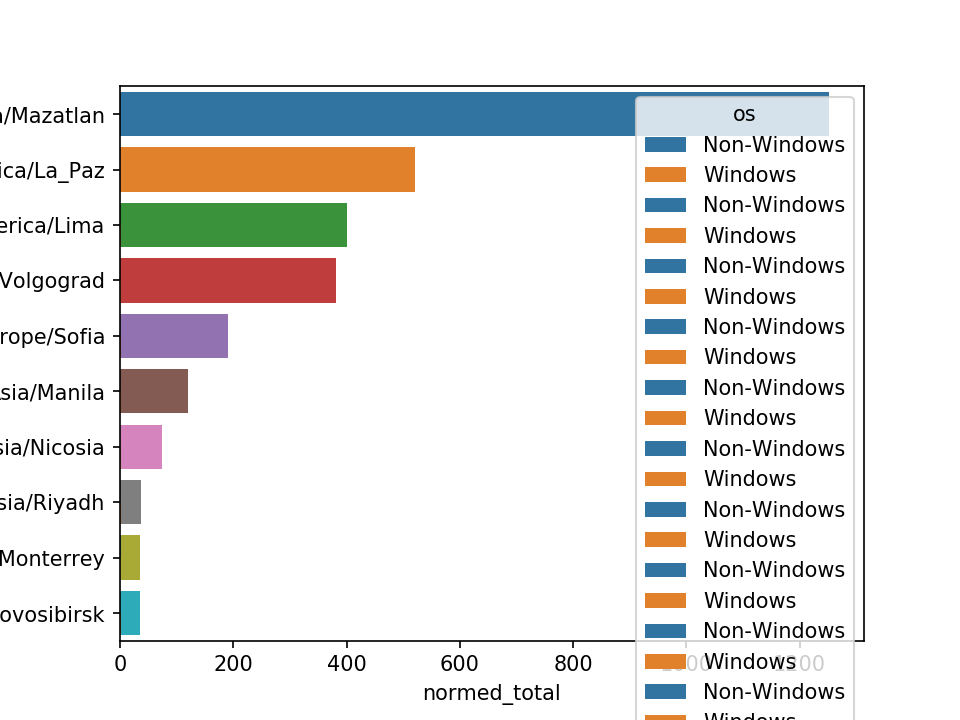

In [78]:
import seaborn as sns
subset=clean_count[:10]
sns.barplot(y=subset.index, x=subset.values)

In [56]:
record_pd['a'][20] #截取第一个空格前的内容组成一个新的列

'Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; WOW64; Trident/5.0)'

In [58]:
result=pd.Series([x.split()[0] for x in record_pd.a.dropna()])
result[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [69]:
c_pd=record_pd[record_pd.a.notnull()]
c_pd['os']=np.where(c_pd['a'].str.contains('Windows'), 'Windows', 'Non-Windows')
c_pd[:3]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u,os
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991,Windows
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php,Non-Windows
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...,Windows


In [70]:
grouby_tzos=c_pd.groupby(['tz', 'os'])
agg_count=grouby_tzos.size().unstack().fillna(0)
agg_count[:10]

os,Non-Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [73]:
indexer = agg_count.sum(1).argsort()
indexer[:5]

tz
                       24
Africa/Cairo           20
Africa/Casablanca      21
Africa/Ceuta           92
Africa/Johannesburg    87
dtype: int64

In [111]:
count_subset = agg_count.take(indexer[-10:])
count_subset

os,Non-Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [112]:
agg_count.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

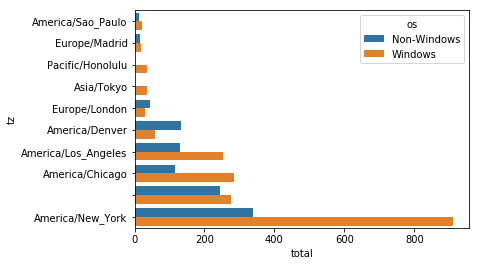

In [113]:
count_subset = count_subset.stack()
count_subset.name = 'total'
count_subset = count_subset.reset_index()
plt.figure()
sns.barplot(x='total', y='tz', hue='os',  data=count_subset) #Top time zones by Windows and non-Windows users
plt.show()

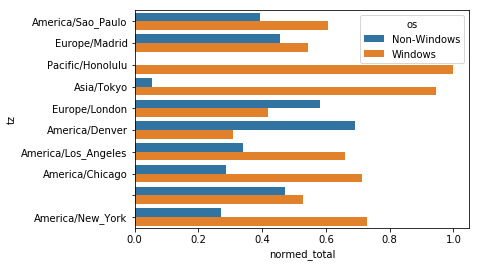

In [114]:
def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group
results = count_subset.groupby('tz').apply(norm_total)
plt.figure()
sns.barplot(x='normed_total', y='tz', hue='os',  data=results)
#plt.show()
#%matplotlib inline

### Example2

In [7]:
pd.options.display.max_rows = 10

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_csv('users.dat', sep='::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('ratings.dat', sep='::', header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_csv('movies.dat', sep='::', header=None, names=mnames, engine='python')

In [11]:
data=pd.merge(pd.merge(users, ratings), movies)
data.head()

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [21]:
mean_ratings=data.pivot_table('rating', index='title', columns='gender')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [20]:
ratings_by_title=data.groupby('title').size()
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles #pandas.core.indexes.base.Index

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [18]:
ratings_by_title

title
$1,000,000 Duck (1971)                       37
'Night Mother (1986)                         70
'Til There Was You (1997)                    52
'burbs, The (1989)                          303
...And Justice for All (1979)               199
                                           ... 
Zed & Two Noughts, A (1985)                  29
Zero Effect (1998)                          301
Zero Kelvin (Kj鎟lighetens kj鴗ere) (1995)      2
Zeus and Roxanne (1997)                      23
eXistenZ (1999)                             410
Length: 3706, dtype: int64

In [25]:
mean_ratings=mean_ratings.loc[active_titles]
mean_ratings[:6]

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000


In [26]:
mean_ratings.sort_values(by='F', ascending=False)[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [29]:
mean_ratings['diff']=mean_ratings['F']-mean_ratings['M']
sort_by_diff=mean_ratings.sort_values(by='diff')
sort_by_diff[:10] #prefered by man

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,-0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,-0.676359
Dumb & Dumber (1994),2.697987,3.336595,-0.638608
"Longest Day, The (1962)",3.411765,4.031447,-0.619682
"Cable Guy, The (1996)",2.250000,2.863787,-0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,-0.611985
"Hidden, The (1987)",3.137931,3.745098,-0.607167
Rocky III (1982),2.361702,2.943503,-0.581801
Caddyshack (1980),3.396135,3.969737,-0.573602


In [30]:
sort_by_diff[::-1][:10] #prefered by woman

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,0.676359
Grease (1978),3.975265,3.367041,0.608224
Little Women (1994),3.870588,3.321739,0.548849
Steel Magnolias (1989),3.901734,3.365957,0.535777
Anastasia (1997),3.800000,3.281609,0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,0.512885
"Color Purple, The (1985)",4.158192,3.659341,0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,0.487561


In [33]:
rating_std_by_title=data.groupby('title')['rating'].std()
rating_std_by_title=rating_std_by_title.loc[active_titles]
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

### Example 3

In [3]:
names1880=pd.read_csv('yob1880.txt', names=['names', 'sex', 'births'])
names1880.head()

,names,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [4]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [5]:
years = range(1923, 2011)
pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year
    pieces.append(frame) #存储到一个List中

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True) #ignore_index=True: not preserving the original row numbers returned from read_csv
names.head()

,name,sex,births,year
0,Mary,F,71636,1923
1,Dorothy,F,39023,1923
2,Helen,F,31493,1923
3,Margaret,F,26131,1923
4,Betty,F,25992,1923


In [6]:
total_births=names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
total_births.head()

sex,F,M
year,,
1923,1206239,1096227
1924,1248821,1132671
1925,1217217,1115798
1926,1185078,1110440
1927,1192207,1126259


<IPython.core.display.Javascript object>


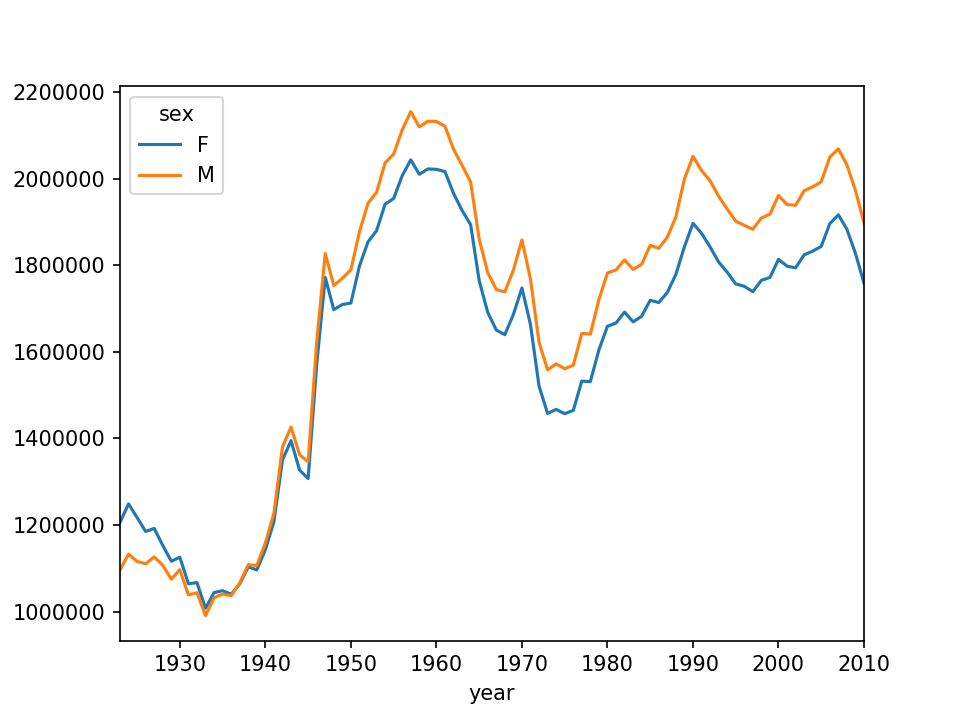

In [7]:
total_births.plot()

In [8]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)
names.head()

,name,sex,births,year,prop
0,Mary,F,71636,1923,0.059388
1,Dorothy,F,39023,1923,0.032351
2,Helen,F,31493,1923,0.026108
3,Margaret,F,26131,1923,0.021663
4,Betty,F,25992,1923,0.021548


In [9]:
#total=names.groupby(['sex', 'year']).births.sum().reset_index()
#totalbirths=pd.merge(names, total, how='left', left_on=['sex', 'year'], right_on=['sex', 'year'])
#totalbirths['pro']=totalbirths['births_x']/totalbirths['births_y']

##### 选出每年男女中出现次数最多的名字
##### 每组中的前几个

In [10]:
def top(group):
    return group.sort_values(by='births', ascending=False)[:10]
top10=names.groupby(['sex', 'year']).apply(top)
top10.reset_index(inplace=True, drop=True)

In [11]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)

In [12]:
boys=top1000[top1000.sex=='M']
girls=top1000[top1000.sex=='F']
total_births=top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)
total_births.head()

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Abagail,Abbey,Abbie,Abbigail,Abby,...,Zion,Zita,Zoe,Zoey,Zoie,Zola,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1923,NaN,NaN,NaN,616.0,NaN,NaN,NaN,129.0,NaN,NaN,...,NaN,61.0,61.0,NaN,NaN,145.0,74.0,130.0,102.0,NaN
1924,NaN,NaN,NaN,683.0,NaN,NaN,NaN,96.0,NaN,NaN,...,NaN,NaN,74.0,NaN,NaN,184.0,104.0,121.0,95.0,NaN
1925,NaN,NaN,NaN,644.0,NaN,NaN,NaN,128.0,NaN,NaN,...,NaN,NaN,73.0,NaN,NaN,154.0,78.0,114.0,97.0,NaN
1926,NaN,NaN,NaN,593.0,NaN,NaN,NaN,105.0,NaN,NaN,...,NaN,NaN,58.0,NaN,NaN,124.0,93.0,93.0,84.0,NaN
1927,NaN,NaN,NaN,546.0,NaN,NaN,NaN,103.0,NaN,NaN,...,NaN,59.0,NaN,NaN,NaN,116.0,70.0,92.0,66.0,NaN


<IPython.core.display.Javascript object>


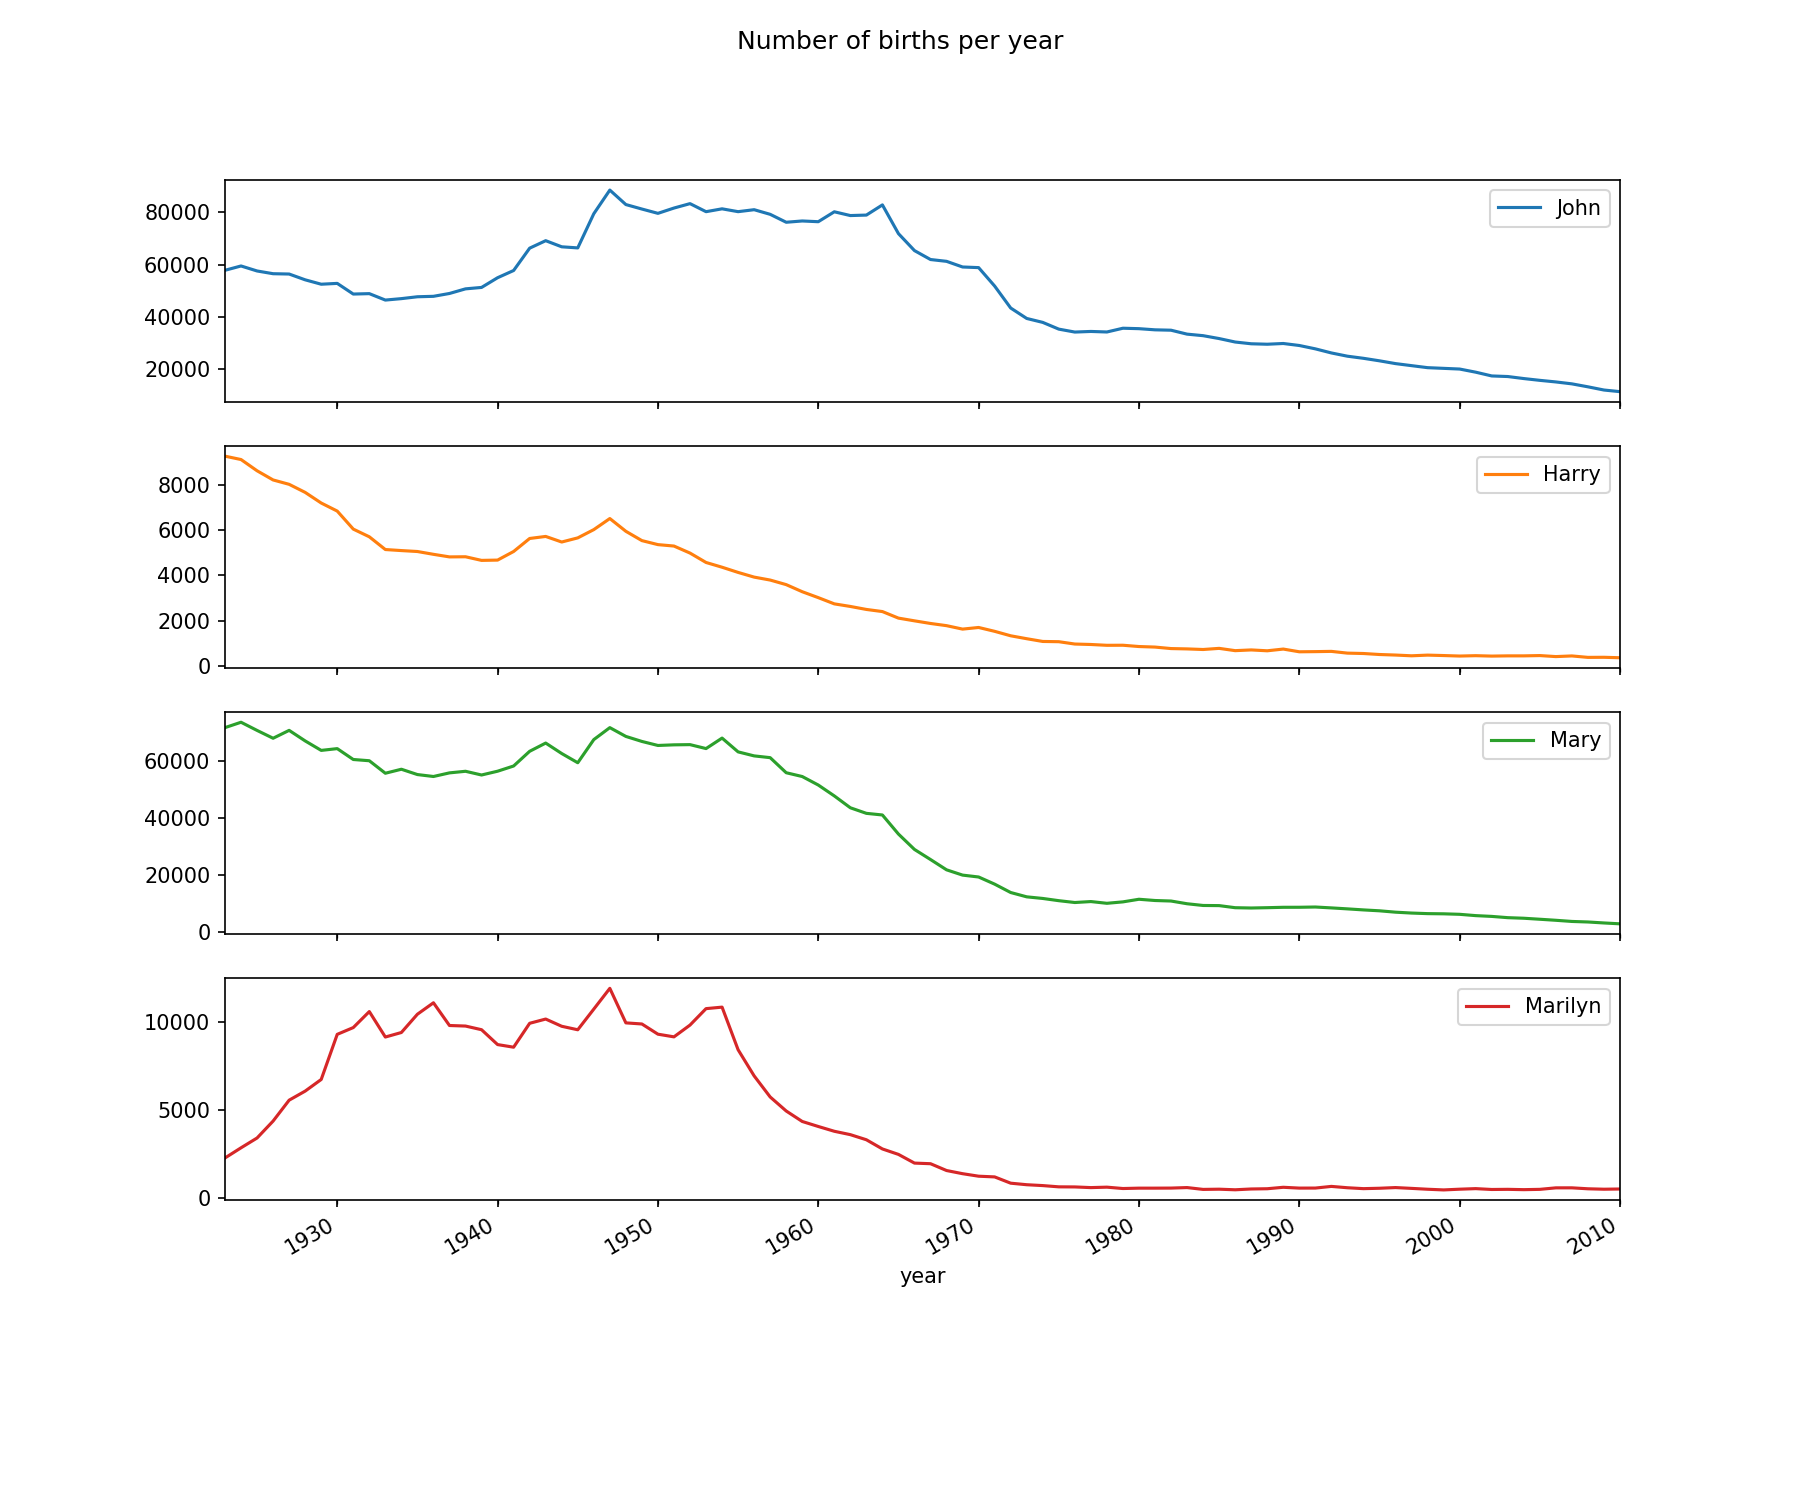

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002360029EF60>,
      dtype=object)

In [13]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), grid=False, title="Number of births per year")

<IPython.core.display.Javascript object>


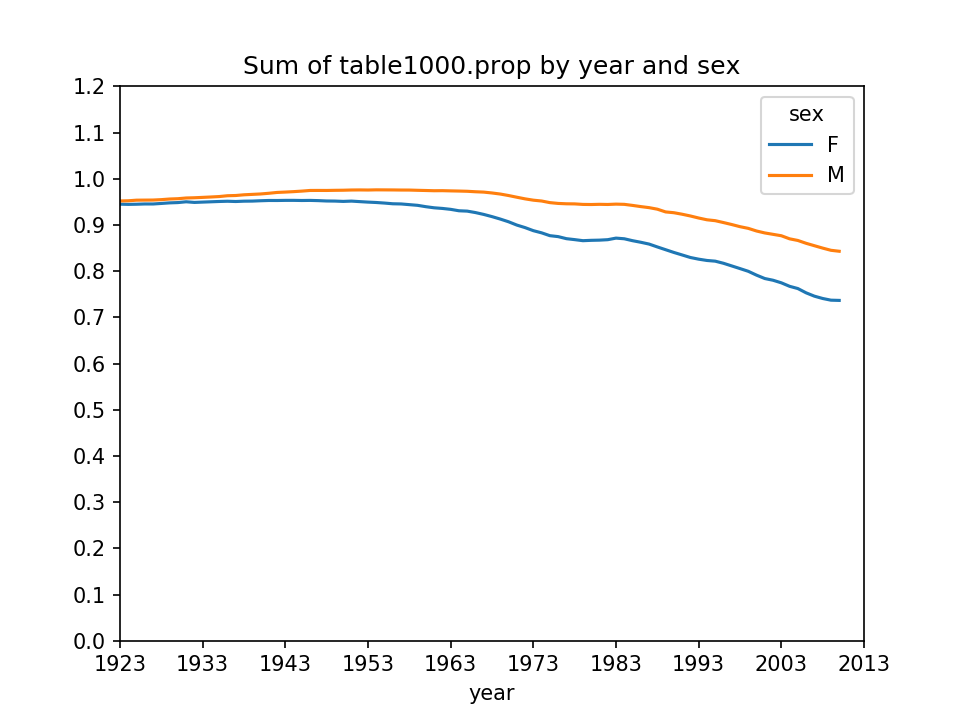

In [14]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex', yticks=np.linspace(0, 1.2, 13), xticks=range(1923, 2020, 10))

##### 寻找中位值

In [15]:
df=boys[boys.year==2010]
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum.values.searchsorted(0.5) #how many of the most popular names it takes to reach 50%

116

In [16]:
df = boys[boys.year == 1923]
in1923 = df.sort_values(by='prop', ascending=False).prop.cumsum()
in1923.values.searchsorted(0.5) + 1

29

In [17]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity.head()

sex,F,M
year,,
1923,51,29
1924,51,29
1925,52,28
1926,52,28
1927,52,28


<IPython.core.display.Javascript object>


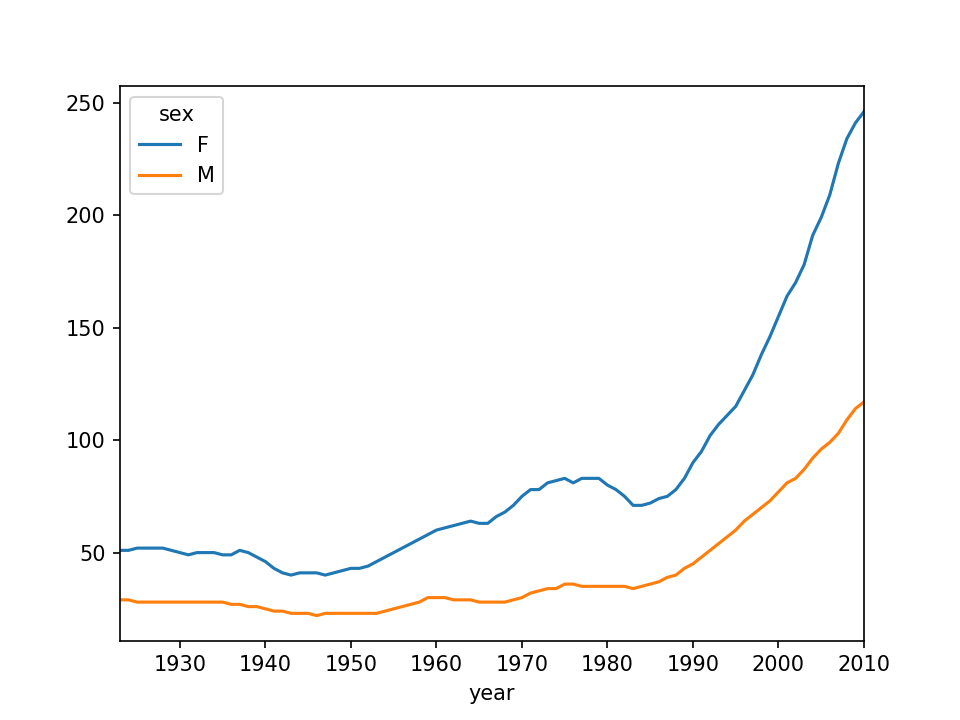

In [18]:
diversity.plot()

In [25]:
#比较名字最后一个字母随时间的变化
get_last_letter=lambda x:x[-1]
last_letters=names.name.map(get_last_letter)
last_letters.name='last_letters' #last_letters: 每个名字的最后一个字母
tables=names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc=sum)
tables.head()

sex                  F                                                    \
year              1923      1924      1925      1926      1927      1928   
last_letters                                                               
a             302884.0  315612.0  309535.0  301188.0  304129.0  295654.0   
b                 11.0      12.0       6.0       9.0      14.0      11.0   
c                 18.0      12.0      13.0      17.0       7.0      10.0   
d              19623.0   19338.0   17954.0   17085.0   16522.0   14958.0   
e             358140.0  365030.0  355336.0  342013.0  338373.0  321941.0   

sex                                                   ...         M            \
year              1929      1930      1931      1932  ...      2001      2002   
last_letters                                          ...                       
a             284469.0  288291.0  274399.0  278899.0  ...   39124.0   38815.0   
b                 11.0      20.0      10.0      21.0  ...   50950.0   49284.0   
c                  NaN      14.0       5.0       NaN  ...   27113.0   27238.0   
d              13361.0   12124.0   10670.0    9916.0  ...   60838.0   55829.0   
e             307686.0  305386.0  288003.0  286406.0  ...  145395.0  144651.0   

sex                                                                       \
year              2003      2004      2005      2006      2007      2008   
last_letters                                                               
a              37825.0   38650.0   36838.0   36156.0   34654.0   32901.0   
b              48065.0   45914.0   43144.0   42600.0   42123.0   39945.0   
c              27697.0   26778.0   26078.0   26635.0   26864.0   25318.0   
d              53391.0   51754.0   50670.0   51410.0   50595.0   47910.0   
e             144769.0  142098.0  141123.0  142999.0  143698.0  140966.0   

sex                               
year              2009      2010  
last_letters                      
a              31430.0   28438.0  
b              38862.0   38859.0  
c              24048.0   23125.0  
d              46172.0   44398.0  
e             135496.0  129012.0  

[5 rows x 176 columns]

##### pivot table选取值

In [30]:
subtable = tables.reindex(columns=[1923, 1960, 2010], level='year')
subtable.head()

sex                  F                             M                    
year              1923      1960      2010      1923      1960      2010
last_letters                                                            
a             302884.0  691247.0  670605.0    3718.0    5204.0   28438.0
b                 11.0     694.0     450.0    2038.0    3912.0   38859.0
c                 18.0      49.0     946.0    2173.0   15476.0   23125.0
d              19623.0    3729.0    2607.0  157925.0  262112.0   44398.0
e             358140.0  435013.0  313833.0  132558.0  178823.0  129012.0

In [33]:
subtable.sum()

sex  year
F    1923    1206239.0
     1960    2022062.0
     2010    1759010.0
M    1923    1096227.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [35]:
letter_prop=subtable/subtable.sum()
letter_prop.head()

sex                  F                             M                    
year              1923      1960      2010      1923      1960      2010
last_letters                                                            
a             0.251098  0.341853  0.381240  0.003392  0.002440  0.014980
b             0.000009  0.000343  0.000256  0.001859  0.001834  0.020470
c             0.000015  0.000024  0.000538  0.001982  0.007257  0.012181
d             0.016268  0.001844  0.001482  0.144062  0.122908  0.023387
e             0.296906  0.215133  0.178415  0.120922  0.083853  0.067959

<IPython.core.display.Javascript object>


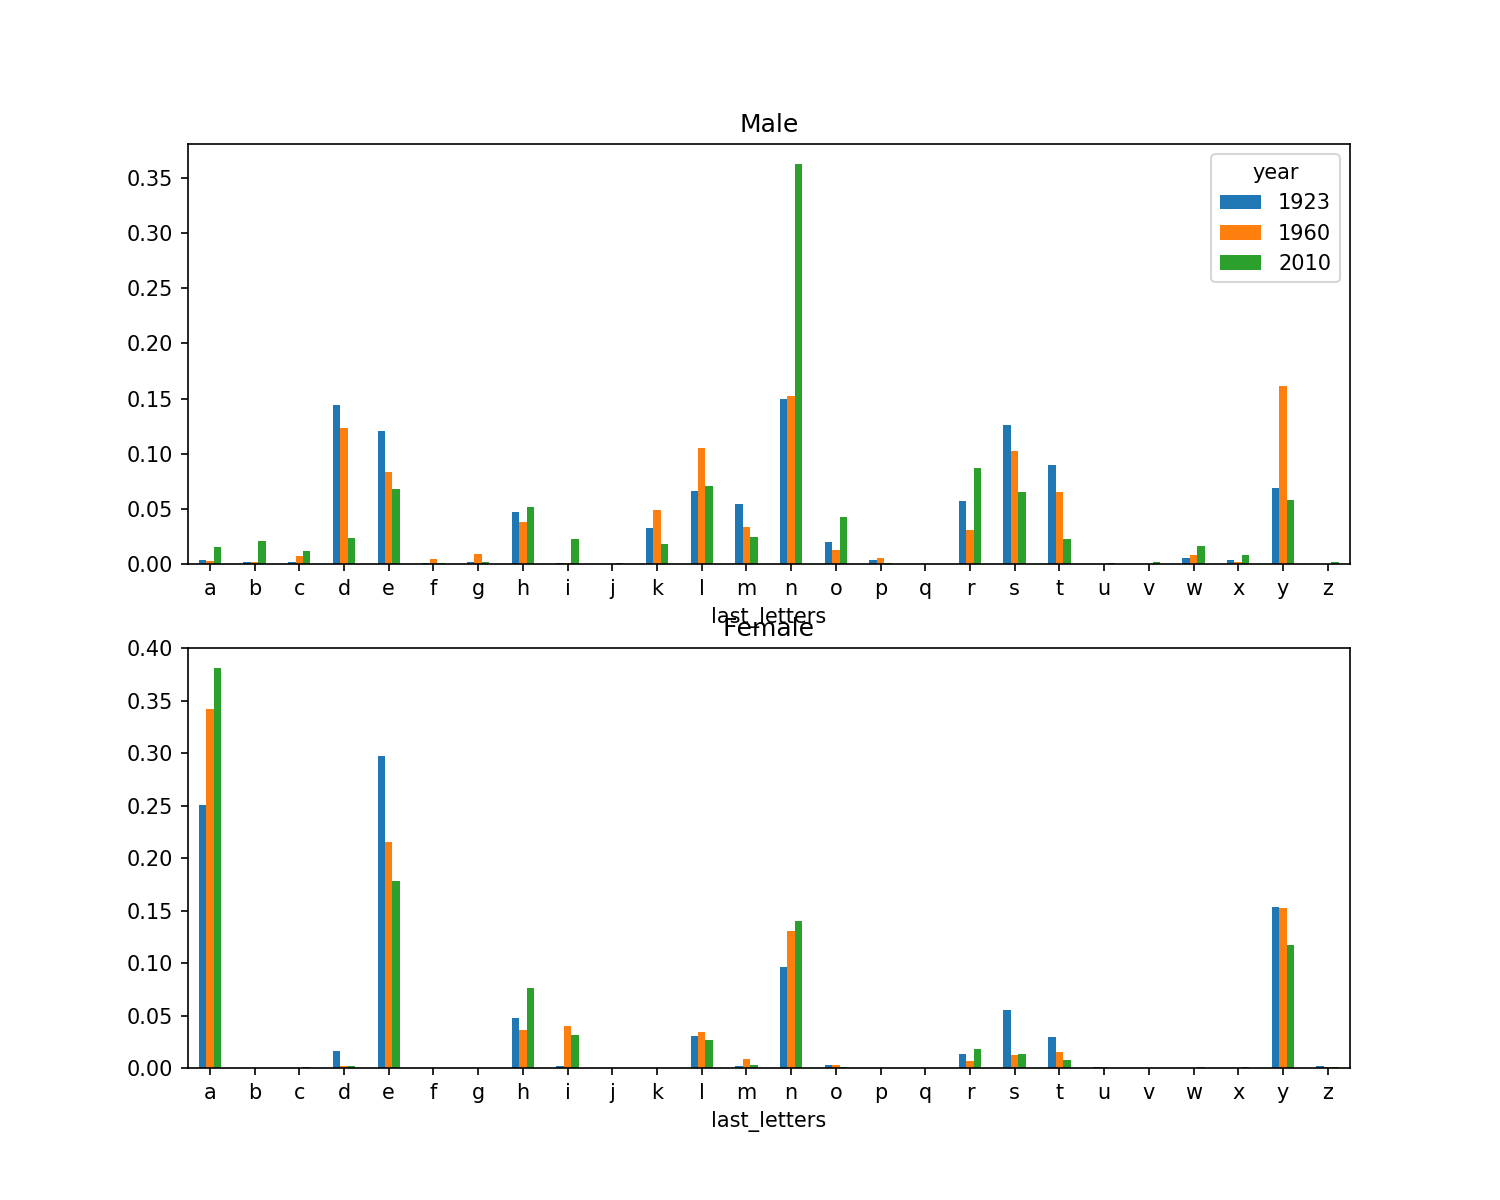

In [36]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
                      legend=False)

In [38]:
letter_prop = tables / tables.sum()
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts.head()

last_letters,d,n,y
year,,,
1923,0.144062,0.149297,0.069292
1924,0.145787,0.150079,0.069637
1925,0.149044,0.147714,0.070171
1926,0.152780,0.145476,0.072080
1927,0.155346,0.143624,0.073650


<IPython.core.display.Javascript object>


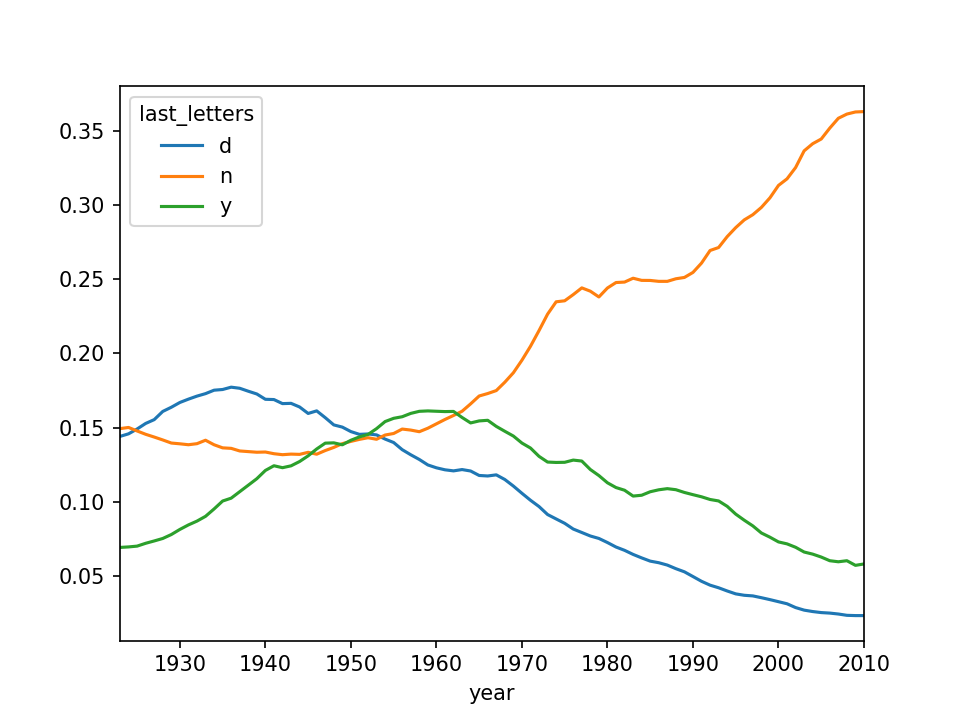

In [39]:
dny_ts.plot() #Proportion of boys born with names ending in d/n/y over time

##### 找出一个Series中包含某个字符串的值

In [43]:
#namethat change sex over time
all_names=pd.Series(top1000.name.unique())
lesley_like=all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

587     Leslie
2020    Lesley
2675    Leslee
3217     Lesli
4677     Lesly
dtype: object

##### 找出一个DataFrame中某一列属于某个Series的行

In [45]:
filtered=top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     34822
Lesli        929
Leslie    347300
Lesly      10067
Name: births, dtype: int64

In [86]:
table=filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0) #div: 除法，算每一行中每个数占百分之多少
table.head()

sex,F,M
year,,
1923,0.088252,0.911748
1924,0.078246,0.921754
1925,0.081382,0.918618
1926,0.086497,0.913503
1927,0.078541,0.921459


<IPython.core.display.Javascript object>


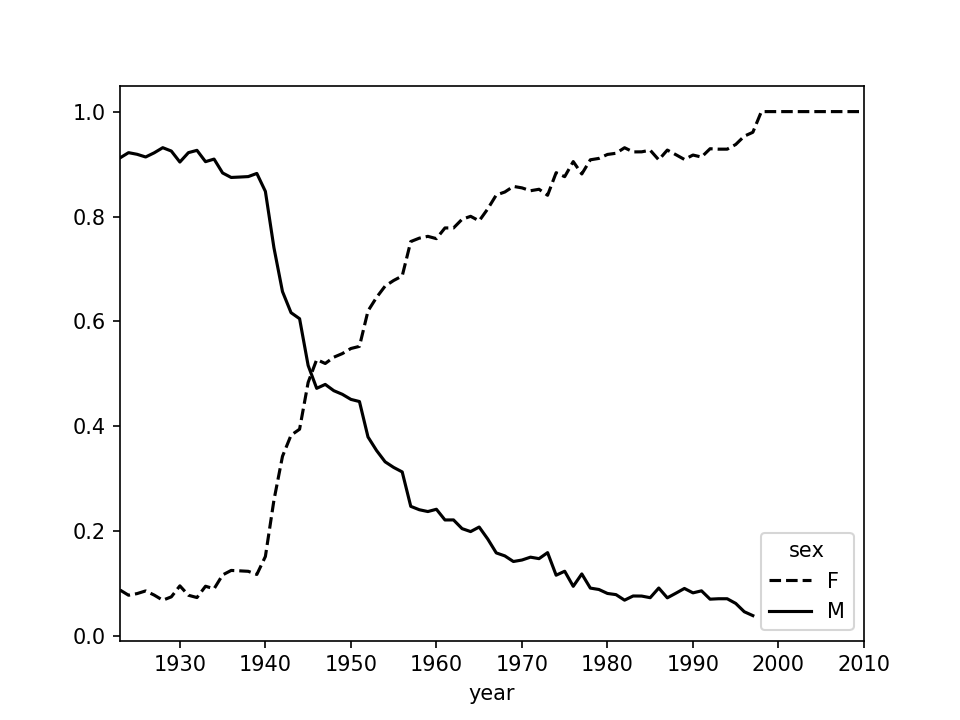

In [52]:
table.plot(style={'M': 'k-', 'F': 'k--'}) #Proportion of male/female Lesley-like names over time

### Example4

In [3]:
import json
db=json.load(open('database.json'))
db[0] #db: a list of dict

{'id': 1008,
 'description': 'Cheese, caraway',
 'tags': [],
 'manufacturer': '',
 'group': 'Dairy and Egg Products',
 'portions': [{'amount': 1, 'unit': 'oz', 'grams': 28.35}],
 'nutrients': [{'value': 25.18,
   'units': 'g',
   'description': 'Protein',
   'group': 'Composition'},
  {'value': 29.2,
   'units': 'g',
   'description': 'Total lipid (fat)',
   'group': 'Composition'},
  {'value': 3.06,
   'units': 'g',
   'description': 'Carbohydrate, by difference',
   'group': 'Composition'},
  {'value': 3.28, 'units': 'g', 'description': 'Ash', 'group': 'Other'},
  {'value': 376.0,
   'units': 'kcal',
   'description': 'Energy',
   'group': 'Energy'},
  {'value': 39.28,
   'units': 'g',
   'description': 'Water',
   'group': 'Composition'},
  {'value': 1573.0, 'units': 'kJ', 'description': 'Energy', 'group': 'Energy'},
  {'value': 0.0,
   'units': 'g',
   'description': 'Fiber, total dietary',
   'group': 'Composition'},
  {'value': 673.0,
   'units': 'mg',
   'description': 'Calcium,

##### When converting a list of dicts to a DataFrame, we can specify a list of fields to extract. We’ll take the food names, group, ID, and manufacturer.

In [4]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(db, columns=info_keys)
info.head()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [5]:
info.group.value_counts()[:5]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Name: group, dtype: int64

In [6]:
piece=[]
for i in db:
    a=pd.DataFrame(i['nutrients'])
    a['id']=i['id']
    piece.append(a)
nutrients=pd.concat(piece, ignore_index=True)

In [7]:
nutrients = nutrients.drop_duplicates()
nutrients.head()

,description,group,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008


In [8]:
info = info.rename(columns={'description': 'food', 'group': 'fgroup'}, copy=False)
nutrients = nutrients.rename(columns={'description' : 'nutrient', 'group' : 'nutgroup'}, copy=False)
#'group' and 'description' are in both DataFrame objects, we can rename for clarity

In [9]:
info[:3]

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,


In [10]:
nutrients[:3]

,nutrient,nutgroup,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008


In [14]:
ndata = pd.merge(nutrients, info, on='id', how='outer')
ndata[:3]

,nutrient,nutgroup,units,value,id,food,fgroup,manufacturer
0,Protein,Composition,g,25.18,1008,"Cheese, caraway",Dairy and Egg Products,
1,Total lipid (fat),Composition,g,29.20,1008,"Cheese, caraway",Dairy and Egg Products,
2,"Carbohydrate, by difference",Composition,g,3.06,1008,"Cheese, caraway",Dairy and Egg Products,


<IPython.core.display.Javascript object>


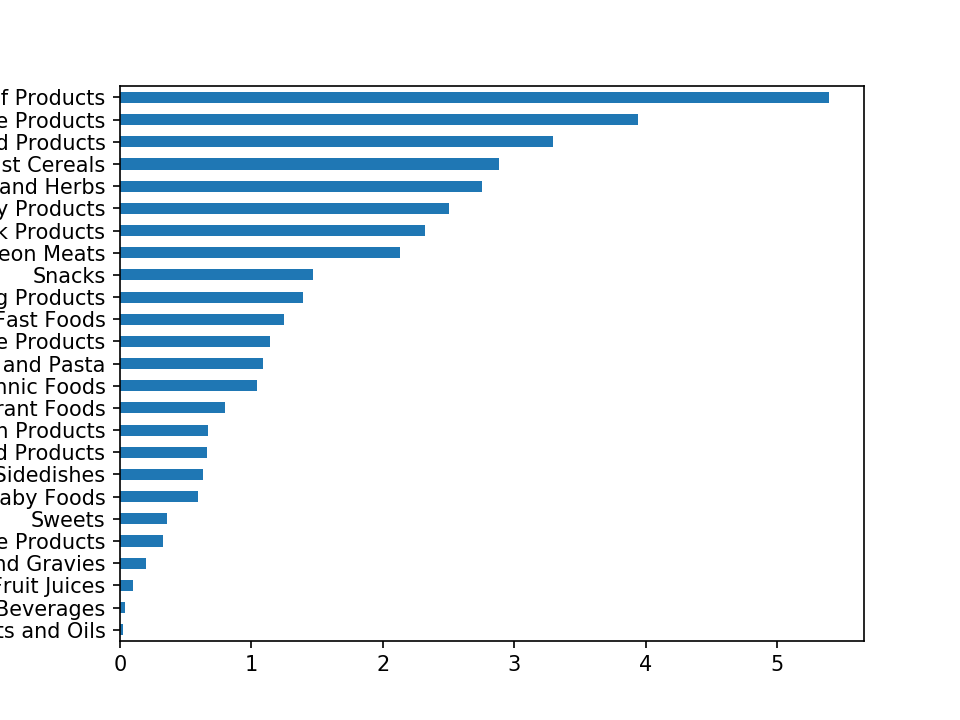

In [13]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
result['Zinc, Zn'].sort_values().plot(kind='barh')

In [15]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

get_maximum = lambda x: x.loc[x.value.idxmax()]
get_minimum = lambda x: x.loc[x.value.idxmin()]

max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]

# make the food a little smaller
max_foods.food = max_foods.food.str[:50] #which food is most dense in each nutrient

In [16]:
max_foods.loc['Amino Acids']['food']

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 

##### Example 5

In [4]:
fec=pd.read_csv('P00000001-ALL.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
fec.iloc[0]

cmte_id                       C00410118
cand_id                       P20002978
cand_nm              Bachmann, Michelle
contbr_nm               HARVEY, WILLIAM
contbr_city                      MOBILE
contbr_st                            AL
contbr_zip                   3.6601e+08
contbr_employer                 RETIRED
contbr_occupation               RETIRED
contb_receipt_amt                   250
contb_receipt_dt              20-JUN-11
receipt_desc                        NaN
memo_cd                             NaN
memo_text                           NaN
form_tp                           SA17A
file_num                         736166
Name: 0, dtype: object

In [6]:
unique_cands = fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [7]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [8]:
fec['party']=fec.cand_nm.map(parties)
fec.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [9]:
fec = fec[fec.contb_receipt_amt > 0] #restrict the dataset to positive contributions

In [10]:
fec_mrbo=fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])] #Barack Obama and Mitt Romney

##### Donation Statistics by Occupation and Employer

In [11]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [12]:
occ_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
   'C.E.O.': 'CEO'
}
f = lambda x: occ_mapping.get(x, x) #dict.get(x, y)能找到x就返回x对应的value, 找不到x就返回y
fec.loc[:, 'contbr_occupation'] = fec.loc[:, 'contbr_occupation'].map(f)

In [13]:
emp_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

# If no mapping provided, return x
f = lambda x: emp_mapping.get(x, x)
fec.loc[:, 'contbr_employer'] = fec.loc[:, 'contbr_employer'].map(f)

In [14]:
by_occupation = fec.pivot_table('contb_receipt_amt', index='contbr_occupation', columns='party', aggfunc='sum')
by_occupation.head()

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [15]:
over_2mm = by_occupation[by_occupation.sum(1) > 2000000] #按行求和，筛选总donate超过2000000的occupation
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
HOMEMAKER,4248875.80,1.363428e+07
INVESTOR,884133.00,2.431769e+06
LAWYER,3160478.87,3.912243e+05
MANAGER,762883.22,1.444532e+06


<IPython.core.display.Javascript object>


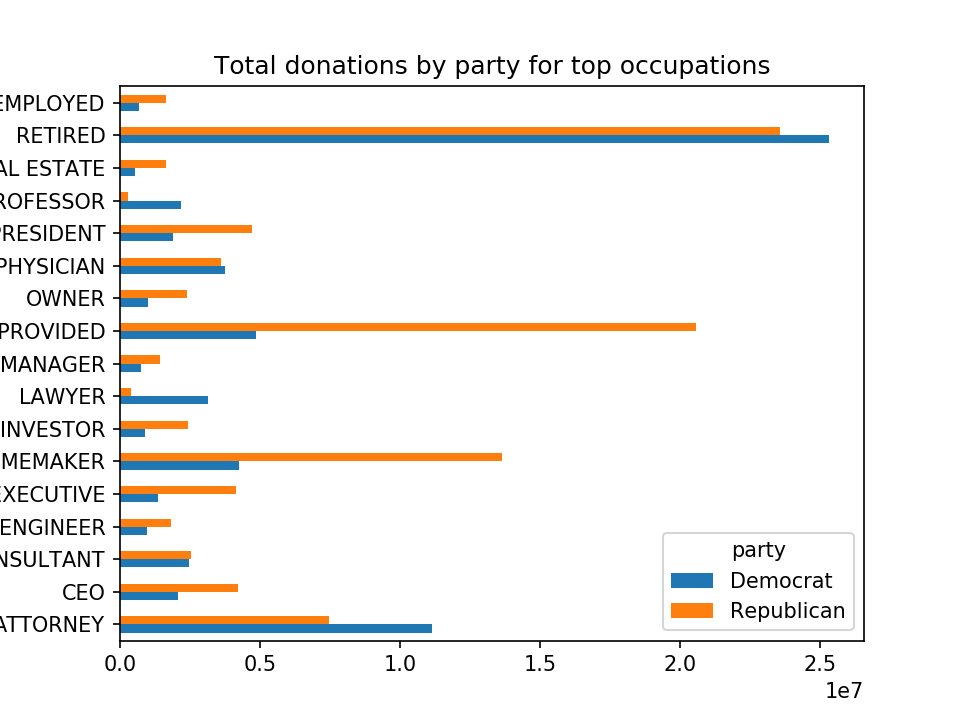

In [16]:
over_2mm.plot(kind='barh', title='Total donations by party for top occupations')

In [18]:
def get_top_amounts(group, key, n=5):
    totals=group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)
grouped = fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts, 'contbr_occupation', n=7) #the top donor occupations or top companies that donated to Obama and Romney

cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25305116.38
               ATTORNEY                                  11141982.97
               INFORMATION REQUESTED                      4866973.96
               HOMEMAKER                                  4248875.80
               PHYSICIAN                                  3735124.94
               LAWYER                                     3160478.87
               CONSULTANT                                 2459912.71
Romney, Mitt   RETIRED                                   11508473.59
               INFORMATION REQUESTED PER BEST EFFORTS    11396894.84
               HOMEMAKER                                  8147446.22
               ATTORNEY                                   5364718.82
               PRESIDENT                                  2491244.89
               EXECUTIVE                                  2300947.03
               C.E.O.                            

In [19]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

cand_nm        contbr_employer                       
Obama, Barack  RETIRED                                   22694358.85
               SELF-EMPLOYED                             17080985.96
               NOT EMPLOYED                               8586308.70
               INFORMATION REQUESTED                      5053480.37
               HOMEMAKER                                  2605408.54
               SELF                                       1076531.20
               SELF EMPLOYED                               469290.00
               STUDENT                                     318831.45
               VOLUNTEER                                   257104.00
               MICROSOFT                                   215585.36
Romney, Mitt   INFORMATION REQUESTED PER BEST EFFORTS    12059527.24
               RETIRED                                   11506225.71
               HOMEMAKER                                  8147196.22
               SELF-EMPLOYED                     

In [27]:
bins = np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153991.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


In [21]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


In [23]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]
percent = totals.div(totals.sum(1), axis=0)
percent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224
